In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel('data.xlsx')
data

HU Count  Length  Width  Height  Weight  Density  Cubic Feet
0              1    17.0  17.00   24.00      97    24.17        4.01
1              1    33.0  14.00   15.00      92    22.94        4.01
2              1    13.0  13.00   41.00      57    14.22        4.01
3              1    31.0  16.00   14.00     158    39.32        4.02
4              1    25.2  21.26   12.99      29     7.20        4.03
...          ...     ...    ...     ...     ...      ...         ...
105625        16    40.0  48.00   95.00   10053     5.95     1688.89
105626         1   348.0  96.00   96.00   14503     7.81     1856.00
105627        20    40.0  48.00   93.00   11651     5.64     2066.67
105628        24    40.0  48.00   83.00   11164     5.04     2213.33
105629        26    48.0  40.00   80.00   38000    16.44     2311.11

[105630 rows x 7 columns]

In [3]:
data.describe()

HU Count        Length          Width         Height  \
count  105630.000000  105630.00000  105630.000000  105630.000000   
mean        1.668077      48.02758      40.430599      44.419969   
std         1.710115      16.52796       9.172225      18.420119   
min         1.000000      10.00000      10.000000      10.000000   
25%         1.000000      40.00000      40.000000      30.000000   
50%         1.000000      48.00000      40.000000      43.000000   
75%         2.000000      48.00000      48.000000      55.000000   
max        45.000000     360.00000     168.000000     108.000000   

              Weight        Density     Cubic Feet  
count  105630.000000  105630.000000  105630.000000  
mean     1356.584379      15.859300      87.518680  
std      1946.837892      10.252838     102.619816  
min        21.000000       5.000000       4.010000  
25%       368.000000       8.000000      33.330000  
50%       688.000000      12.365000      55.560000  
75%      1440.000000      20.700000      95.160000  
max     38000.000000      50.000000    2311.110000

In [4]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print("Starting training; got log keys: {}".format(keys))

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))

    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print("Start epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_test_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start testing; got log keys: {}".format(keys))

    def on_test_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop testing; got log keys: {}".format(keys))

    def on_predict_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start predicting; got log keys: {}".format(keys))

    def on_predict_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop predicting; got log keys: {}".format(keys))

    def on_train_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: start of batch {}; got log keys: {}".format(batch, keys))

    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: end of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: start of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: end of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Predicting: start of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Predicting: end of batch {}; got log keys: {}".format(batch, keys))

In [5]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    # plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [6]:
X = data[['Cubic Feet', 'Weight']].to_numpy()
y = data[['HU Count','Width', 'Height']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))

model.compile(optimizer='adam', loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])
history = model.fit(X_train, y_train, 
                    epochs=30, batch_size=64, validation_split=0.15, callbacks=[CustomCallback()]);
print(model.summary())

Starting training; got log keys: []
Start epoch 0 of training; got log keys: []
Epoch 1/30
...Training: start of batch 0; got log keys: []
...Training: end of batch 0; got log keys: ['loss', 'mean_squared_error']
   1/1123 [..............................] - ETA: 0s - loss: 1347.0703 - mean_squared_error: 1347.0703...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 2; got log keys: []
...Training: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 3; got log keys: []
...Training: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 4; got log keys: []
...Training: end of batch 4; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 5; got log keys: []
...Training: end of batch 5; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 6; got log keys: []
...Training: end of batch 6

  80/1123 [=>............................] - ETA: 1s - loss: 1356.4985 - mean_squared_error: 1356.4985...Training: start of batch 80; got log keys: []
...Training: end of batch 80; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 81; got log keys: []
...Training: end of batch 81; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 82; got log keys: []
...Training: end of batch 82; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 83; got log keys: []
...Training: end of batch 83; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 84; got log keys: []
...Training: end of batch 84; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 85; got log keys: []
...Training: end of batch 85; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 86; got log keys: []
...Training: end of batch 86; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 87

...Training: end of batch 146; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 147; got log keys: []
...Training: end of batch 147; got log keys: ['loss', 'mean_squared_error']
 148/1123 [==>...........................] - ETA: 1s - loss: 1329.8804 - mean_squared_error: 1329.8804...Training: start of batch 148; got log keys: []
...Training: end of batch 148; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 149; got log keys: []
...Training: end of batch 149; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 150; got log keys: []
...Training: end of batch 150; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 151; got log keys: []
...Training: end of batch 151; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 152; got log keys: []
...Training: end of batch 152; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 153; got log keys: []
...Training: end

...Training: end of batch 218; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 219; got log keys: []
...Training: end of batch 219; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 220; got log keys: []
...Training: end of batch 220; got log keys: ['loss', 'mean_squared_error']
 221/1123 [====>.........................] - ETA: 1s - loss: 1283.9275 - mean_squared_error: 1283.9275...Training: start of batch 221; got log keys: []
...Training: end of batch 221; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 222; got log keys: []
...Training: end of batch 222; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 223; got log keys: []
...Training: end of batch 223; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 224; got log keys: []
...Training: end of batch 224; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 225; got log keys: []
...Training: end

...Training: end of batch 288; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 289; got log keys: []
...Training: end of batch 289; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 290; got log keys: []
...Training: end of batch 290; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 291; got log keys: []
...Training: end of batch 291; got log keys: ['loss', 'mean_squared_error']
 292/1123 [======>.......................] - ETA: 1s - loss: 1219.1644 - mean_squared_error: 1219.1644...Training: start of batch 292; got log keys: []
...Training: end of batch 292; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 293; got log keys: []
...Training: end of batch 293; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 294; got log keys: []
...Training: end of batch 294; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 295; got log keys: []
...Training: end

 352/1123 [========>.....................] - ETA: 1s - loss: 1156.5774 - mean_squared_error: 1156.5774...Training: start of batch 352; got log keys: []
...Training: end of batch 352; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 353; got log keys: []
...Training: end of batch 353; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 354; got log keys: []
...Training: end of batch 354; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 355; got log keys: []
...Training: end of batch 355; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 356; got log keys: []
...Training: end of batch 356; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 357; got log keys: []
...Training: end of batch 357; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 358; got log keys: []
...Training: end of batch 358; got log keys: ['loss', 'mean_squared_error']
...Training: sta

...Training: start of batch 416; got log keys: []
...Training: end of batch 416; got log keys: ['loss', 'mean_squared_error']
 417/1123 [==========>...................] - ETA: 1s - loss: 1090.9907 - mean_squared_error: 1090.9907...Training: start of batch 417; got log keys: []
...Training: end of batch 417; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 418; got log keys: []
...Training: end of batch 418; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 419; got log keys: []
...Training: end of batch 419; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 420; got log keys: []
...Training: end of batch 420; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 421; got log keys: []
...Training: end of batch 421; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 422; got log keys: []
...Training: end of batch 422; got log keys: ['loss', 'mean_squared_error']
...Training: sta

...Training: end of batch 481; got log keys: ['loss', 'mean_squared_error']
 482/1123 [===========>..................] - ETA: 1s - loss: 1036.7006 - mean_squared_error: 1036.7006...Training: start of batch 482; got log keys: []
...Training: end of batch 482; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 483; got log keys: []
...Training: end of batch 483; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 484; got log keys: []
...Training: end of batch 484; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 485; got log keys: []
...Training: end of batch 485; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 486; got log keys: []
...Training: end of batch 486; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 487; got log keys: []
...Training: end of batch 487; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 488; got log keys: []
...Training: end

...Training: end of batch 548; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 549; got log keys: []
...Training: end of batch 549; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 550; got log keys: []
...Training: end of batch 550; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 551; got log keys: []
...Training: end of batch 551; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 552; got log keys: []
...Training: end of batch 552; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 553; got log keys: []
...Training: end of batch 553; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 554; got log keys: []
...Training: end of batch 554; got log keys: ['loss', 'mean_squared_error']
 555/1123 [=============>................] - ETA: 0s - loss: 988.8269 - mean_squared_error: 988.8269  ...Training: start of batch 555; got log keys: []
...Training: end

...Training: end of batch 615; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 616; got log keys: []
...Training: end of batch 616; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 617; got log keys: []
...Training: end of batch 617; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 618; got log keys: []
...Training: end of batch 618; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 619; got log keys: []
...Training: end of batch 619; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 620; got log keys: []
...Training: end of batch 620; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 621; got log keys: []
...Training: end of batch 621; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 622; got log keys: []
...Training: end of batch 622; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 623; got log k

 679/1123 [=================>............] - ETA: 0s - loss: 930.6166 - mean_squared_error: 930.6166...Training: start of batch 679; got log keys: []
...Training: end of batch 679; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 680; got log keys: []
...Training: end of batch 680; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 681; got log keys: []
...Training: end of batch 681; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 682; got log keys: []
...Training: end of batch 682; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 683; got log keys: []
...Training: end of batch 683; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 684; got log keys: []
...Training: end of batch 684; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 685; got log keys: []
...Training: end of batch 685; got log keys: ['loss', 'mean_squared_error']
...Training: start

 741/1123 [==================>...........] - ETA: 0s - loss: 908.7285 - mean_squared_error: 908.7285...Training: start of batch 741; got log keys: []
...Training: end of batch 741; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 742; got log keys: []
...Training: end of batch 742; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 743; got log keys: []
...Training: end of batch 743; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 744; got log keys: []
...Training: end of batch 744; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 745; got log keys: []
...Training: end of batch 745; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 746; got log keys: []
...Training: end of batch 746; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 747; got log keys: []
...Training: end of batch 747; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: end of batch 806; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 807; got log keys: []
...Training: end of batch 807; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 808; got log keys: []
...Training: end of batch 808; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 809; got log keys: []
...Training: end of batch 809; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 810; got log keys: []
...Training: end of batch 810; got log keys: ['loss', 'mean_squared_error']
 811/1123 [====================>.........] - ETA: 0s - loss: 888.0731 - mean_squared_error: 888.0731...Training: start of batch 811; got log keys: []
...Training: end of batch 811; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 812; got log keys: []
...Training: end of batch 812; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 813; got log keys: []
...Training: end o

...Training: end of batch 869; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 870; got log keys: []
...Training: end of batch 870; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 871; got log keys: []
...Training: end of batch 871; got log keys: ['loss', 'mean_squared_error']
 872/1123 [======================>.......] - ETA: 0s - loss: 873.2203 - mean_squared_error: 873.2203...Training: start of batch 872; got log keys: []
...Training: end of batch 872; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 873; got log keys: []
...Training: end of batch 873; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 874; got log keys: []
...Training: end of batch 874; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 875; got log keys: []
...Training: end of batch 875; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 876; got log keys: []
...Training: end o

 932/1123 [=======================>......] - ETA: 0s - loss: 860.1217 - mean_squared_error: 860.1217...Training: start of batch 932; got log keys: []
...Training: end of batch 932; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 933; got log keys: []
...Training: end of batch 933; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 934; got log keys: []
...Training: end of batch 934; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 935; got log keys: []
...Training: end of batch 935; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 936; got log keys: []
...Training: end of batch 936; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 937; got log keys: []
...Training: end of batch 937; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 938; got log keys: []
...Training: end of batch 938; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: end of batch 996; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 997; got log keys: []
...Training: end of batch 997; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 998; got log keys: []
...Training: end of batch 998; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 999; got log keys: []
...Training: end of batch 999; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1000; got log keys: []
...Training: end of batch 1000; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1001; got log keys: []
...Training: end of batch 1001; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1002; got log keys: []
...Training: end of batch 1002; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1003; got log keys: []
...Training: end of batch 1003; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1004; 

...Training: end of batch 1062; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1063; got log keys: []
...Training: end of batch 1063; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1064; got log keys: []
...Training: end of batch 1064; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1065; got log keys: []
...Training: end of batch 1065; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1066; got log keys: []
...Training: end of batch 1066; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1067; got log keys: []
...Training: end of batch 1067; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1068; got log keys: []
...Training: end of batch 1068; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1069; got log keys: []
...Training: end of batch 1069; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Evaluating: start of batch 37; got log keys: []
...Evaluating: end of batch 37; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 38; got log keys: []
...Evaluating: end of batch 38; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 39; got log keys: []
...Evaluating: end of batch 39; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 40; got log keys: []
...Evaluating: end of batch 40; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 41; got log keys: []
...Evaluating: end of batch 41; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 42; got log keys: []
...Evaluating: end of batch 42; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 43; got log keys: []
...Evaluating: end of batch 43; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 44; got log keys: []
...Evaluating: end of batch 44; got log keys: ['loss'

...Evaluating: start of batch 158; got log keys: []
...Evaluating: end of batch 158; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 159; got log keys: []
...Evaluating: end of batch 159; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 160; got log keys: []
...Evaluating: end of batch 160; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 161; got log keys: []
...Evaluating: end of batch 161; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 162; got log keys: []
...Evaluating: end of batch 162; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 163; got log keys: []
...Evaluating: end of batch 163; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 164; got log keys: []
...Evaluating: end of batch 164; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 165; got log keys: []
...Evaluating: end of batch 165; got l

  25/1123 [..............................] - ETA: 2s - loss: 656.5321 - mean_squared_error: 656.5321...Training: start of batch 25; got log keys: []
...Training: end of batch 25; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 26; got log keys: []
...Training: end of batch 26; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 27; got log keys: []
...Training: end of batch 27; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 28; got log keys: []
...Training: end of batch 28; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 29; got log keys: []
...Training: end of batch 29; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 30; got log keys: []
...Training: end of batch 30; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 31; got log keys: []
...Training: end of batch 31; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 32; 

...Training: start of batch 96; got log keys: []
...Training: end of batch 96; got log keys: ['loss', 'mean_squared_error']
  97/1123 [=>............................] - ETA: 2s - loss: 665.5710 - mean_squared_error: 665.5710...Training: start of batch 97; got log keys: []
...Training: end of batch 97; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 98; got log keys: []
...Training: end of batch 98; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 99; got log keys: []
...Training: end of batch 99; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 100; got log keys: []
...Training: end of batch 100; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 101; got log keys: []
...Training: end of batch 101; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 102; got log keys: []
...Training: end of batch 102; got log keys: ['loss', 'mean_squared_error']
...Training: start of batc

...Training: end of batch 161; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 162; got log keys: []
...Training: end of batch 162; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 163; got log keys: []
...Training: end of batch 163; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 164; got log keys: []
...Training: end of batch 164; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 165; got log keys: []
...Training: end of batch 165; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 166; got log keys: []
...Training: end of batch 166; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 167; got log keys: []
...Training: end of batch 167; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 168; got log keys: []
...Training: end of batch 168; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 169; got log k

...Training: end of batch 232; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 233; got log keys: []
...Training: end of batch 233; got log keys: ['loss', 'mean_squared_error']
 234/1123 [=====>........................] - ETA: 1s - loss: 668.2060 - mean_squared_error: 668.2060...Training: start of batch 234; got log keys: []
...Training: end of batch 234; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 235; got log keys: []
...Training: end of batch 235; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 236; got log keys: []
...Training: end of batch 236; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 237; got log keys: []
...Training: end of batch 237; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 238; got log keys: []
...Training: end of batch 238; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 239; got log keys: []
...Training: end o

 296/1123 [======>.......................] - ETA: 1s - loss: 669.3732 - mean_squared_error: 669.3732...Training: start of batch 296; got log keys: []
...Training: end of batch 296; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 297; got log keys: []
...Training: end of batch 297; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 298; got log keys: []
...Training: end of batch 298; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 299; got log keys: []
...Training: end of batch 299; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 300; got log keys: []
...Training: end of batch 300; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 301; got log keys: []
...Training: end of batch 301; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 302; got log keys: []
...Training: end of batch 302; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: start of batch 368; got log keys: []
...Training: end of batch 368; got log keys: ['loss', 'mean_squared_error']
 369/1123 [========>.....................] - ETA: 1s - loss: 669.3814 - mean_squared_error: 669.3814...Training: start of batch 369; got log keys: []
...Training: end of batch 369; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 370; got log keys: []
...Training: end of batch 370; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 371; got log keys: []
...Training: end of batch 371; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 372; got log keys: []
...Training: end of batch 372; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 373; got log keys: []
...Training: end of batch 373; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 374; got log keys: []
...Training: end of batch 374; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: end of batch 430; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 431; got log keys: []
...Training: end of batch 431; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 432; got log keys: []
...Training: end of batch 432; got log keys: ['loss', 'mean_squared_error']
 433/1123 [==========>...................] - ETA: 1s - loss: 669.5500 - mean_squared_error: 669.5500...Training: start of batch 433; got log keys: []
...Training: end of batch 433; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 434; got log keys: []
...Training: end of batch 434; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 435; got log keys: []
...Training: end of batch 435; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 436; got log keys: []
...Training: end of batch 436; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 437; got log keys: []
...Training: end o

...Training: end of batch 493; got log keys: ['loss', 'mean_squared_error']
 494/1123 [============>.................] - ETA: 1s - loss: 669.7742 - mean_squared_error: 669.7742...Training: start of batch 494; got log keys: []
...Training: end of batch 494; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 495; got log keys: []
...Training: end of batch 495; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 496; got log keys: []
...Training: end of batch 496; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 497; got log keys: []
...Training: end of batch 497; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 498; got log keys: []
...Training: end of batch 498; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 499; got log keys: []
...Training: end of batch 499; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 500; got log keys: []
...Training: end o

...Training: end of batch 562; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 563; got log keys: []
...Training: end of batch 563; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 564; got log keys: []
...Training: end of batch 564; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 565; got log keys: []
...Training: end of batch 565; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 566; got log keys: []
...Training: end of batch 566; got log keys: ['loss', 'mean_squared_error']
 567/1123 [==============>...............] - ETA: 1s - loss: 669.2707 - mean_squared_error: 669.2707...Training: start of batch 567; got log keys: []
...Training: end of batch 567; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 568; got log keys: []
...Training: end of batch 568; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 569; got log keys: []
...Training: end o

...Training: end of batch 624; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 625; got log keys: []
...Training: end of batch 625; got log keys: ['loss', 'mean_squared_error']
 626/1123 [===============>..............] - ETA: 1s - loss: 669.4941 - mean_squared_error: 669.4941...Training: start of batch 626; got log keys: []
...Training: end of batch 626; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 627; got log keys: []
...Training: end of batch 627; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 628; got log keys: []
...Training: end of batch 628; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 629; got log keys: []
...Training: end of batch 629; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 630; got log keys: []
...Training: end of batch 630; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 631; got log keys: []
...Training: end o

...Training: end of batch 689; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 690; got log keys: []
...Training: end of batch 690; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 691; got log keys: []
...Training: end of batch 691; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 692; got log keys: []
...Training: end of batch 692; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 693; got log keys: []
...Training: end of batch 693; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 694; got log keys: []
...Training: end of batch 694; got log keys: ['loss', 'mean_squared_error']
 695/1123 [=================>............] - ETA: 1s - loss: 669.4086 - mean_squared_error: 669.4086...Training: start of batch 695; got log keys: []
...Training: end of batch 695; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 696; got log keys: []
...Training: end o

...Training: end of batch 755; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 756; got log keys: []
...Training: end of batch 756; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 757; got log keys: []
...Training: end of batch 757; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 758; got log keys: []
...Training: end of batch 758; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 759; got log keys: []
...Training: end of batch 759; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 760; got log keys: []
...Training: end of batch 760; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 761; got log keys: []
...Training: end of batch 761; got log keys: ['loss', 'mean_squared_error']
 762/1123 [===================>..........] - ETA: 0s - loss: 668.8824 - mean_squared_error: 668.8824...Training: start of batch 762; got log keys: []
...Training: end o

...Training: start of batch 818; got log keys: []
...Training: end of batch 818; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 819; got log keys: []
...Training: end of batch 819; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 820; got log keys: []
...Training: end of batch 820; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 821; got log keys: []
...Training: end of batch 821; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 822; got log keys: []
...Training: end of batch 822; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 823; got log keys: []
...Training: end of batch 823; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 824; got log keys: []
...Training: end of batch 824; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 825; got log keys: []
...Training: end of batch 825; got log keys: ['loss', 'mean_squared_

...Training: start of batch 881; got log keys: []
...Training: end of batch 881; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 882; got log keys: []
...Training: end of batch 882; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 883; got log keys: []
...Training: end of batch 883; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 884; got log keys: []
...Training: end of batch 884; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 885; got log keys: []
...Training: end of batch 885; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 886; got log keys: []
...Training: end of batch 886; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 887; got log keys: []
...Training: end of batch 887; got log keys: ['loss', 'mean_squared_error']
 888/1123 [======================>.......] - ETA: 0s - loss: 668.2995 - mean_squared_error: 668.2995...Training: start

...Training: start of batch 947; got log keys: []
...Training: end of batch 947; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 948; got log keys: []
...Training: end of batch 948; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 949; got log keys: []
...Training: end of batch 949; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 950; got log keys: []
...Training: end of batch 950; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 951; got log keys: []
...Training: end of batch 951; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 952; got log keys: []
...Training: end of batch 952; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 953; got log keys: []
...Training: end of batch 953; got log keys: ['loss', 'mean_squared_error']
 954/1123 [========================>.....] - ETA: 0s - loss: 668.3075 - mean_squared_error: 668.3075...Training: start

...Training: end of batch 1010; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1011; got log keys: []
...Training: end of batch 1011; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1012; got log keys: []
...Training: end of batch 1012; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1013; got log keys: []
...Training: end of batch 1013; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1014; got log keys: []
...Training: end of batch 1014; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1015; got log keys: []
...Training: end of batch 1015; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1016; got log keys: []
...Training: end of batch 1016; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1017; got log keys: []
...Training: end of batch 1017; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Training: end of batch 1076; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1077; got log keys: []
...Training: end of batch 1077; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1078; got log keys: []
...Training: end of batch 1078; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1079; got log keys: []
...Training: end of batch 1079; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1080; got log keys: []
...Training: end of batch 1080; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1081; got log keys: []
...Training: end of batch 1081; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1082; got log keys: []
...Training: end of batch 1082; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1083; got log keys: []
...Training: end of batch 1083; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Evaluating: end of batch 19; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 20; got log keys: []
...Evaluating: end of batch 20; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 21; got log keys: []
...Evaluating: end of batch 21; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 22; got log keys: []
...Evaluating: end of batch 22; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 23; got log keys: []
...Evaluating: end of batch 23; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 24; got log keys: []
...Evaluating: end of batch 24; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 25; got log keys: []
...Evaluating: end of batch 25; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 26; got log keys: []
...Evaluating: end of batch 26; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 84; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 85; got log keys: []
...Evaluating: end of batch 85; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 86; got log keys: []
...Evaluating: end of batch 86; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 87; got log keys: []
...Evaluating: end of batch 87; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 88; got log keys: []
...Evaluating: end of batch 88; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 89; got log keys: []
...Evaluating: end of batch 89; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 90; got log keys: []
...Evaluating: end of batch 90; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 91; got log keys: []
...Evaluating: end of batch 91; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: start of batch 153; got log keys: []
...Evaluating: end of batch 153; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 154; got log keys: []
...Evaluating: end of batch 154; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 155; got log keys: []
...Evaluating: end of batch 155; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 156; got log keys: []
...Evaluating: end of batch 156; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 157; got log keys: []
...Evaluating: end of batch 157; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 158; got log keys: []
...Evaluating: end of batch 158; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 159; got log keys: []
...Evaluating: end of batch 159; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 160; got log keys: []
...Evaluating: end of batch 160; got l

...Training: end of batch 16; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 17; got log keys: []
...Training: end of batch 17; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 18; got log keys: []
...Training: end of batch 18; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 19; got log keys: []
...Training: end of batch 19; got log keys: ['loss', 'mean_squared_error']
  20/1123 [..............................] - ETA: 2s - loss: 651.8676 - mean_squared_error: 651.8676...Training: start of batch 20; got log keys: []
...Training: end of batch 20; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 21; got log keys: []
...Training: end of batch 21; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 22; got log keys: []
...Training: end of batch 22; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 23; got log keys: []
...Training: end of batch 23; go

...Training: end of batch 80; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 81; got log keys: []
...Training: end of batch 81; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 82; got log keys: []
...Training: end of batch 82; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 83; got log keys: []
...Training: end of batch 83; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 84; got log keys: []
...Training: end of batch 84; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 85; got log keys: []
...Training: end of batch 85; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 86; got log keys: []
...Training: end of batch 86; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 87; got log keys: []
...Training: end of batch 87; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 88; got log keys: []
...Train

...Training: end of batch 146; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 147; got log keys: []
...Training: end of batch 147; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 148; got log keys: []
...Training: end of batch 148; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 149; got log keys: []
...Training: end of batch 149; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 150; got log keys: []
...Training: end of batch 150; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 151; got log keys: []
...Training: end of batch 151; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 152; got log keys: []
...Training: end of batch 152; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 153; got log keys: []
...Training: end of batch 153; got log keys: ['loss', 'mean_squared_error']
 154/1123 [===>..........................]

...Training: end of batch 214; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 215; got log keys: []
...Training: end of batch 215; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 216; got log keys: []
...Training: end of batch 216; got log keys: ['loss', 'mean_squared_error']
 217/1123 [====>.........................] - ETA: 2s - loss: 665.2790 - mean_squared_error: 665.2790...Training: start of batch 217; got log keys: []
...Training: end of batch 217; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 218; got log keys: []
...Training: end of batch 218; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 219; got log keys: []
...Training: end of batch 219; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 220; got log keys: []
...Training: end of batch 220; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 221; got log keys: []
...Training: end o

 277/1123 [======>.......................] - ETA: 2s - loss: 663.9703 - mean_squared_error: 663.9703...Training: start of batch 277; got log keys: []
...Training: end of batch 277; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 278; got log keys: []
...Training: end of batch 278; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 279; got log keys: []
...Training: end of batch 279; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 280; got log keys: []
...Training: end of batch 280; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 281; got log keys: []
...Training: end of batch 281; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 282; got log keys: []
...Training: end of batch 282; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 283; got log keys: []
...Training: end of batch 283; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: end of batch 339; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 340; got log keys: []
...Training: end of batch 340; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 341; got log keys: []
...Training: end of batch 341; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 342; got log keys: []
...Training: end of batch 342; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 343; got log keys: []
...Training: end of batch 343; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 344; got log keys: []
...Training: end of batch 344; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 345; got log keys: []
...Training: end of batch 345; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 346; got log keys: []
...Training: end of batch 346; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 347; got log k

...Training: end of batch 408; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 409; got log keys: []
...Training: end of batch 409; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 410; got log keys: []
...Training: end of batch 410; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 411; got log keys: []
...Training: end of batch 411; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 412; got log keys: []
...Training: end of batch 412; got log keys: ['loss', 'mean_squared_error']
 413/1123 [==========>...................] - ETA: 1s - loss: 663.5660 - mean_squared_error: 663.5660...Training: start of batch 413; got log keys: []
...Training: end of batch 413; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 414; got log keys: []
...Training: end of batch 414; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 415; got log keys: []
...Training: end o

...Training: end of batch 479; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 480; got log keys: []
...Training: end of batch 480; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 481; got log keys: []
...Training: end of batch 481; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 482; got log keys: []
...Training: end of batch 482; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 483; got log keys: []
...Training: end of batch 483; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 484; got log keys: []
...Training: end of batch 484; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 485; got log keys: []
...Training: end of batch 485; got log keys: ['loss', 'mean_squared_error']
 486/1123 [===========>..................] - ETA: 1s - loss: 664.0625 - mean_squared_error: 664.0625...Training: start of batch 486; got log keys: []
...Training: end o

...Training: end of batch 543; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 544; got log keys: []
...Training: end of batch 544; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 545; got log keys: []
...Training: end of batch 545; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 546; got log keys: []
...Training: end of batch 546; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 547; got log keys: []
...Training: end of batch 547; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 548; got log keys: []
...Training: end of batch 548; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 549; got log keys: []
...Training: end of batch 549; got log keys: ['loss', 'mean_squared_error']
 550/1123 [=============>................] - ETA: 1s - loss: 663.8204 - mean_squared_error: 663.8204...Training: start of batch 550; got log keys: []
...Training: end o

...Training: end of batch 605; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 606; got log keys: []
...Training: end of batch 606; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 607; got log keys: []
...Training: end of batch 607; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 608; got log keys: []
...Training: end of batch 608; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 609; got log keys: []
...Training: end of batch 609; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 610; got log keys: []
...Training: end of batch 610; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 611; got log keys: []
...Training: end of batch 611; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 612; got log keys: []
...Training: end of batch 612; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 613; got log k

...Training: end of batch 673; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 674; got log keys: []
...Training: end of batch 674; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 675; got log keys: []
...Training: end of batch 675; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 676; got log keys: []
...Training: end of batch 676; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 677; got log keys: []
...Training: end of batch 677; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 678; got log keys: []
...Training: end of batch 678; got log keys: ['loss', 'mean_squared_error']
 679/1123 [=================>............] - ETA: 1s - loss: 663.7460 - mean_squared_error: 663.7460...Training: start of batch 679; got log keys: []
...Training: end of batch 679; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 680; got log keys: []
...Training: end o

...Training: end of batch 735; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 736; got log keys: []
...Training: end of batch 736; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 737; got log keys: []
...Training: end of batch 737; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 738; got log keys: []
...Training: end of batch 738; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 739; got log keys: []
...Training: end of batch 739; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 740; got log keys: []
...Training: end of batch 740; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 741; got log keys: []
...Training: end of batch 741; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 742; got log keys: []
...Training: end of batch 742; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 743; got log k

...Training: end of batch 799; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 800; got log keys: []
...Training: end of batch 800; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 801; got log keys: []
...Training: end of batch 801; got log keys: ['loss', 'mean_squared_error']
 802/1123 [====================>.........] - ETA: 0s - loss: 663.1627 - mean_squared_error: 663.1627...Training: start of batch 802; got log keys: []
...Training: end of batch 802; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 803; got log keys: []
...Training: end of batch 803; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 804; got log keys: []
...Training: end of batch 804; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 805; got log keys: []
...Training: end of batch 805; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 806; got log keys: []
...Training: end o

...Training: end of batch 873; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 874; got log keys: []
...Training: end of batch 874; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 875; got log keys: []
...Training: end of batch 875; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 876; got log keys: []
...Training: end of batch 876; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 877; got log keys: []
...Training: end of batch 877; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 878; got log keys: []
...Training: end of batch 878; got log keys: ['loss', 'mean_squared_error']
 879/1123 [======================>.......] - ETA: 0s - loss: 662.7701 - mean_squared_error: 662.7701...Training: start of batch 879; got log keys: []
...Training: end of batch 879; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 880; got log keys: []
...Training: end o

...Training: end of batch 936; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 937; got log keys: []
...Training: end of batch 937; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 938; got log keys: []
...Training: end of batch 938; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 939; got log keys: []
...Training: end of batch 939; got log keys: ['loss', 'mean_squared_error']
 940/1123 [========================>.....] - ETA: 0s - loss: 662.8098 - mean_squared_error: 662.8098...Training: start of batch 940; got log keys: []
...Training: end of batch 940; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 941; got log keys: []
...Training: end of batch 941; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 942; got log keys: []
...Training: end of batch 942; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 943; got log keys: []
...Training: end o

...Training: end of batch 1001; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1002; got log keys: []
...Training: end of batch 1002; got log keys: ['loss', 'mean_squared_error']
1003/1123 [=========================>....] - ETA: 0s - loss: 662.6485 - mean_squared_error: 662.6485...Training: start of batch 1003; got log keys: []
...Training: end of batch 1003; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1004; got log keys: []
...Training: end of batch 1004; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1005; got log keys: []
...Training: end of batch 1005; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1006; got log keys: []
...Training: end of batch 1006; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1007; got log keys: []
...Training: end of batch 1007; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1008; got log keys: []
...T

...Training: end of batch 1064; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1065; got log keys: []
...Training: end of batch 1065; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1066; got log keys: []
...Training: end of batch 1066; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1067; got log keys: []
...Training: end of batch 1067; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1068; got log keys: []
...Training: end of batch 1068; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1069; got log keys: []
...Training: end of batch 1069; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1070; got log keys: []
...Training: end of batch 1070; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1071; got log keys: []
...Training: end of batch 1071; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Evaluating: start of batch 10; got log keys: []
...Evaluating: end of batch 10; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 11; got log keys: []
...Evaluating: end of batch 11; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 12; got log keys: []
...Evaluating: end of batch 12; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 13; got log keys: []
...Evaluating: end of batch 13; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 14; got log keys: []
...Evaluating: end of batch 14; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 15; got log keys: []
...Evaluating: end of batch 15; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 16; got log keys: []
...Evaluating: end of batch 16; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 17; got log keys: []
...Evaluating: end of batch 17; got log keys: ['loss'

...Evaluating: end of batch 75; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 76; got log keys: []
...Evaluating: end of batch 76; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 77; got log keys: []
...Evaluating: end of batch 77; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 78; got log keys: []
...Evaluating: end of batch 78; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 79; got log keys: []
...Evaluating: end of batch 79; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 80; got log keys: []
...Evaluating: end of batch 80; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 81; got log keys: []
...Evaluating: end of batch 81; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 82; got log keys: []
...Evaluating: end of batch 82; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 139; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 140; got log keys: []
...Evaluating: end of batch 140; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 141; got log keys: []
...Evaluating: end of batch 141; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 142; got log keys: []
...Evaluating: end of batch 142; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 143; got log keys: []
...Evaluating: end of batch 143; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 144; got log keys: []
...Evaluating: end of batch 144; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 145; got log keys: []
...Evaluating: end of batch 145; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 146; got log keys: []
...Evaluating: end of batch 146; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

   1/1123 [..............................] - ETA: 0s - loss: 740.7233 - mean_squared_error: 740.7233...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 2; got log keys: []
...Training: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 3; got log keys: []
...Training: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 4; got log keys: []
...Training: end of batch 4; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 5; got log keys: []
...Training: end of batch 5; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 6; got log keys: []
...Training: end of batch 6; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 7; got log keys: []
...Training: end of batch 7; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 8; got log keys: [

...Training: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 66; got log keys: []
...Training: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 67; got log keys: []
...Training: end of batch 67; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 68; got log keys: []
...Training: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 69; got log keys: []
...Training: end of batch 69; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 70; got log keys: []
...Training: end of batch 70; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 71; got log keys: []
...Training: end of batch 71; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 72; got log keys: []
...Training: end of batch 72; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 73; got log keys: []
...Train

...Training: end of batch 129; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 130; got log keys: []
...Training: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 131; got log keys: []
...Training: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 132; got log keys: []
...Training: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 133; got log keys: []
...Training: end of batch 133; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 134; got log keys: []
...Training: end of batch 134; got log keys: ['loss', 'mean_squared_error']
 135/1123 [==>...........................] - ETA: 3s - loss: 658.0422 - mean_squared_error: 658.0422...Training: start of batch 135; got log keys: []
...Training: end of batch 135; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 136; got log keys: []
...Training: end o

...Training: start of batch 196; got log keys: []
...Training: end of batch 196; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 197; got log keys: []
...Training: end of batch 197; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 198; got log keys: []
...Training: end of batch 198; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 199; got log keys: []
...Training: end of batch 199; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 200; got log keys: []
...Training: end of batch 200; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 201; got log keys: []
...Training: end of batch 201; got log keys: ['loss', 'mean_squared_error']
 202/1123 [====>.........................] - ETA: 2s - loss: 660.3033 - mean_squared_error: 660.3033...Training: start of batch 202; got log keys: []
...Training: end of batch 202; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: end of batch 262; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 263; got log keys: []
...Training: end of batch 263; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 264; got log keys: []
...Training: end of batch 264; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 265; got log keys: []
...Training: end of batch 265; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 266; got log keys: []
...Training: end of batch 266; got log keys: ['loss', 'mean_squared_error']
 267/1123 [======>.......................] - ETA: 2s - loss: 660.1068 - mean_squared_error: 660.1068...Training: start of batch 267; got log keys: []
...Training: end of batch 267; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 268; got log keys: []
...Training: end of batch 268; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 269; got log keys: []
...Training: end o

...Training: end of batch 325; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 326; got log keys: []
...Training: end of batch 326; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 327; got log keys: []
...Training: end of batch 327; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 328; got log keys: []
...Training: end of batch 328; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 329; got log keys: []
...Training: end of batch 329; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 330; got log keys: []
...Training: end of batch 330; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 331; got log keys: []
...Training: end of batch 331; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 332; got log keys: []
...Training: end of batch 332; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 333; got log k

...Training: end of batch 397; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 398; got log keys: []
...Training: end of batch 398; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 399; got log keys: []
...Training: end of batch 399; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 400; got log keys: []
...Training: end of batch 400; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 401; got log keys: []
...Training: end of batch 401; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 402; got log keys: []
...Training: end of batch 402; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 403; got log keys: []
...Training: end of batch 403; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 404; got log keys: []
...Training: end of batch 404; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 405; got log k

...Training: end of batch 461; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 462; got log keys: []
...Training: end of batch 462; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 463; got log keys: []
...Training: end of batch 463; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 464; got log keys: []
...Training: end of batch 464; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 465; got log keys: []
...Training: end of batch 465; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 466; got log keys: []
...Training: end of batch 466; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 467; got log keys: []
...Training: end of batch 467; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 468; got log keys: []
...Training: end of batch 468; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 469; got log k

...Training: start of batch 528; got log keys: []
...Training: end of batch 528; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 529; got log keys: []
...Training: end of batch 529; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 530; got log keys: []
...Training: end of batch 530; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 531; got log keys: []
...Training: end of batch 531; got log keys: ['loss', 'mean_squared_error']
 532/1123 [=============>................] - ETA: 1s - loss: 657.8868 - mean_squared_error: 657.8868...Training: start of batch 532; got log keys: []
...Training: end of batch 532; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 533; got log keys: []
...Training: end of batch 533; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 534; got log keys: []
...Training: end of batch 534; got log keys: ['loss', 'mean_squared_error']
...Training: start

 591/1123 [==============>...............] - ETA: 1s - loss: 657.5101 - mean_squared_error: 657.5101...Training: start of batch 591; got log keys: []
...Training: end of batch 591; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 592; got log keys: []
...Training: end of batch 592; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 593; got log keys: []
...Training: end of batch 593; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 594; got log keys: []
...Training: end of batch 594; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 595; got log keys: []
...Training: end of batch 595; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 596; got log keys: []
...Training: end of batch 596; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 597; got log keys: []
...Training: end of batch 597; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: end of batch 657; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 658; got log keys: []
...Training: end of batch 658; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 659; got log keys: []
...Training: end of batch 659; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 660; got log keys: []
...Training: end of batch 660; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 661; got log keys: []
...Training: end of batch 661; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 662; got log keys: []
...Training: end of batch 662; got log keys: ['loss', 'mean_squared_error']
 663/1123 [================>.............] - ETA: 1s - loss: 657.6762 - mean_squared_error: 657.6762...Training: start of batch 663; got log keys: []
...Training: end of batch 663; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 664; got log keys: []
...Training: end o

...Training: end of batch 725; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 726; got log keys: []
...Training: end of batch 726; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 727; got log keys: []
...Training: end of batch 727; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 728; got log keys: []
...Training: end of batch 728; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 729; got log keys: []
...Training: end of batch 729; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 730; got log keys: []
...Training: end of batch 730; got log keys: ['loss', 'mean_squared_error']
 731/1123 [==================>...........] - ETA: 0s - loss: 658.0903 - mean_squared_error: 658.0903...Training: start of batch 731; got log keys: []
...Training: end of batch 731; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 732; got log keys: []
...Training: end o

...Training: end of batch 794; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 795; got log keys: []
...Training: end of batch 795; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 796; got log keys: []
...Training: end of batch 796; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 797; got log keys: []
...Training: end of batch 797; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 798; got log keys: []
...Training: end of batch 798; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 799; got log keys: []
...Training: end of batch 799; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 800; got log keys: []
...Training: end of batch 800; got log keys: ['loss', 'mean_squared_error']
 801/1123 [====================>.........] - ETA: 0s - loss: 658.0356 - mean_squared_error: 658.0356...Training: start of batch 801; got log keys: []
...Training: end o

...Training: end of batch 859; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 860; got log keys: []
...Training: end of batch 860; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 861; got log keys: []
...Training: end of batch 861; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 862; got log keys: []
...Training: end of batch 862; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 863; got log keys: []
...Training: end of batch 863; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 864; got log keys: []
...Training: end of batch 864; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 865; got log keys: []
...Training: end of batch 865; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 866; got log keys: []
...Training: end of batch 866; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 867; got log k

...Training: start of batch 924; got log keys: []
...Training: end of batch 924; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 925; got log keys: []
...Training: end of batch 925; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 926; got log keys: []
...Training: end of batch 926; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 927; got log keys: []
...Training: end of batch 927; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 928; got log keys: []
...Training: end of batch 928; got log keys: ['loss', 'mean_squared_error']
 929/1123 [=======================>......] - ETA: 0s - loss: 657.6442 - mean_squared_error: 657.6442...Training: start of batch 929; got log keys: []
...Training: end of batch 929; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 930; got log keys: []
...Training: end of batch 930; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: end of batch 987; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 988; got log keys: []
...Training: end of batch 988; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 989; got log keys: []
...Training: end of batch 989; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 990; got log keys: []
...Training: end of batch 990; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 991; got log keys: []
...Training: end of batch 991; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 992; got log keys: []
...Training: end of batch 992; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 993; got log keys: []
...Training: end of batch 993; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 994; got log keys: []
...Training: end of batch 994; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 995; got log k

...Training: start of batch 1057; got log keys: []
...Training: end of batch 1057; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1058; got log keys: []
...Training: end of batch 1058; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1059; got log keys: []
...Training: end of batch 1059; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1060; got log keys: []
...Training: end of batch 1060; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1061; got log keys: []
...Training: end of batch 1061; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1062; got log keys: []
...Training: end of batch 1062; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1063; got log keys: []
...Training: end of batch 1063; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1064; got log keys: []
...Training: end of batch 1064; got log keys: ['loss'

...Training: start of batch 1120; got log keys: []
...Training: end of batch 1120; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1121; got log keys: []
...Training: end of batch 1121; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1122; got log keys: []
...Training: end of batch 1122; got log keys: ['loss', 'mean_squared_error']
Start testing; got log keys: []
...Evaluating: start of batch 0; got log keys: []
...Evaluating: end of batch 0; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 1; got log keys: []
...Evaluating: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 2; got log keys: []
...Evaluating: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 3; got log keys: []
...Evaluating: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 4; got log keys: []
...Evaluating: end of batch 4;

...Evaluating: start of batch 62; got log keys: []
...Evaluating: end of batch 62; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 63; got log keys: []
...Evaluating: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 64; got log keys: []
...Evaluating: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 65; got log keys: []
...Evaluating: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 66; got log keys: []
...Evaluating: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 67; got log keys: []
...Evaluating: end of batch 67; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 68; got log keys: []
...Evaluating: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 69; got log keys: []
...Evaluating: end of batch 69; got log keys: ['loss'

...Evaluating: end of batch 126; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 127; got log keys: []
...Evaluating: end of batch 127; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 128; got log keys: []
...Evaluating: end of batch 128; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 129; got log keys: []
...Evaluating: end of batch 129; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 130; got log keys: []
...Evaluating: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 131; got log keys: []
...Evaluating: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 132; got log keys: []
...Evaluating: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 133; got log keys: []
...Evaluating: end of batch 133; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

...Evaluating: end of batch 195; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 196; got log keys: []
...Evaluating: end of batch 196; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 197; got log keys: []
...Evaluating: end of batch 197; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 198; got log keys: []
...Evaluating: end of batch 198; got log keys: ['loss', 'mean_squared_error']
Stop testing; got log keys: []
End epoch 3 of training; got log keys: ['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error']
1123/1123 [==============================] - 3s 3ms/step - loss: 657.3807 - mean_squared_error: 657.3807 - val_loss: 653.5453 - val_mean_squared_error: 653.5453
Start epoch 4 of training; got log keys: []
Epoch 5/30
...Training: start of batch 0; got log keys: []
...Training: end of batch 0; got log keys: ['loss', 'mean_squared_error']
   1/1123 [..............................] - ETA: 0s - 

  57/1123 [>.............................] - ETA: 2s - loss: 652.8300 - mean_squared_error: 652.8300...Training: start of batch 57; got log keys: []
...Training: end of batch 57; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 58; got log keys: []
...Training: end of batch 58; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 59; got log keys: []
...Training: end of batch 59; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 60; got log keys: []
...Training: end of batch 60; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 61; got log keys: []
...Training: end of batch 61; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 62; got log keys: []
...Training: end of batch 62; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 63; got log keys: []
...Training: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 64; 

 120/1123 [==>...........................] - ETA: 2s - loss: 653.4636 - mean_squared_error: 653.4636...Training: start of batch 120; got log keys: []
...Training: end of batch 120; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 121; got log keys: []
...Training: end of batch 121; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 122; got log keys: []
...Training: end of batch 122; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 123; got log keys: []
...Training: end of batch 123; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 124; got log keys: []
...Training: end of batch 124; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 125; got log keys: []
...Training: end of batch 125; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 126; got log keys: []
...Training: end of batch 126; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: start of batch 183; got log keys: []
...Training: end of batch 183; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 184; got log keys: []
...Training: end of batch 184; got log keys: ['loss', 'mean_squared_error']
 185/1123 [===>..........................] - ETA: 2s - loss: 653.8073 - mean_squared_error: 653.8073...Training: start of batch 185; got log keys: []
...Training: end of batch 185; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 186; got log keys: []
...Training: end of batch 186; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 187; got log keys: []
...Training: end of batch 187; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 188; got log keys: []
...Training: end of batch 188; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 189; got log keys: []
...Training: end of batch 189; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: end of batch 246; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 247; got log keys: []
...Training: end of batch 247; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 248; got log keys: []
...Training: end of batch 248; got log keys: ['loss', 'mean_squared_error']
 249/1123 [=====>........................] - ETA: 2s - loss: 653.6956 - mean_squared_error: 653.6956...Training: start of batch 249; got log keys: []
...Training: end of batch 249; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 250; got log keys: []
...Training: end of batch 250; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 251; got log keys: []
...Training: end of batch 251; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 252; got log keys: []
...Training: end of batch 252; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 253; got log keys: []
...Training: end o

...Training: end of batch 310; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 311; got log keys: []
...Training: end of batch 311; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 312; got log keys: []
...Training: end of batch 312; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 313; got log keys: []
...Training: end of batch 313; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 314; got log keys: []
...Training: end of batch 314; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 315; got log keys: []
...Training: end of batch 315; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 316; got log keys: []
...Training: end of batch 316; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 317; got log keys: []
...Training: end of batch 317; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 318; got log k

...Training: end of batch 372; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 373; got log keys: []
...Training: end of batch 373; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 374; got log keys: []
...Training: end of batch 374; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 375; got log keys: []
...Training: end of batch 375; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 376; got log keys: []
...Training: end of batch 376; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 377; got log keys: []
...Training: end of batch 377; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 378; got log keys: []
...Training: end of batch 378; got log keys: ['loss', 'mean_squared_error']
 379/1123 [=========>....................] - ETA: 2s - loss: 654.3236 - mean_squared_error: 654.3236...Training: start of batch 379; got log keys: []
...Training: end o

...Training: end of batch 434; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 435; got log keys: []
...Training: end of batch 435; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 436; got log keys: []
...Training: end of batch 436; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 437; got log keys: []
...Training: end of batch 437; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 438; got log keys: []
...Training: end of batch 438; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 439; got log keys: []
...Training: end of batch 439; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 440; got log keys: []
...Training: end of batch 440; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 441; got log keys: []
...Training: end of batch 441; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 442; got log k

...Training: end of batch 500; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 501; got log keys: []
...Training: end of batch 501; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 502; got log keys: []
...Training: end of batch 502; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 503; got log keys: []
...Training: end of batch 503; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 504; got log keys: []
...Training: end of batch 504; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 505; got log keys: []
...Training: end of batch 505; got log keys: ['loss', 'mean_squared_error']
 506/1123 [============>.................] - ETA: 1s - loss: 653.6492 - mean_squared_error: 653.6492...Training: start of batch 506; got log keys: []
...Training: end of batch 506; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 507; got log keys: []
...Training: end o

...Training: end of batch 564; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 565; got log keys: []
...Training: end of batch 565; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 566; got log keys: []
...Training: end of batch 566; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 567; got log keys: []
...Training: end of batch 567; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 568; got log keys: []
...Training: end of batch 568; got log keys: ['loss', 'mean_squared_error']
 569/1123 [==============>...............] - ETA: 1s - loss: 653.2025 - mean_squared_error: 653.2025...Training: start of batch 569; got log keys: []
...Training: end of batch 569; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 570; got log keys: []
...Training: end of batch 570; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 571; got log keys: []
...Training: end o

...Training: end of batch 628; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 629; got log keys: []
...Training: end of batch 629; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 630; got log keys: []
...Training: end of batch 630; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 631; got log keys: []
...Training: end of batch 631; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 632; got log keys: []
...Training: end of batch 632; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 633; got log keys: []
...Training: end of batch 633; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 634; got log keys: []
...Training: end of batch 634; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 635; got log keys: []
...Training: end of batch 635; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 636; got log k

...Training: end of batch 694; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 695; got log keys: []
...Training: end of batch 695; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 696; got log keys: []
...Training: end of batch 696; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 697; got log keys: []
...Training: end of batch 697; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 698; got log keys: []
...Training: end of batch 698; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 699; got log keys: []
...Training: end of batch 699; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 700; got log keys: []
...Training: end of batch 700; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 701; got log keys: []
...Training: end of batch 701; got log keys: ['loss', 'mean_squared_error']
 702/1123 [=================>............]

...Training: end of batch 758; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 759; got log keys: []
...Training: end of batch 759; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 760; got log keys: []
...Training: end of batch 760; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 761; got log keys: []
...Training: end of batch 761; got log keys: ['loss', 'mean_squared_error']
 762/1123 [===================>..........] - ETA: 0s - loss: 652.2311 - mean_squared_error: 652.2311...Training: start of batch 762; got log keys: []
...Training: end of batch 762; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 763; got log keys: []
...Training: end of batch 763; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 764; got log keys: []
...Training: end of batch 764; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 765; got log keys: []
...Training: end o

 821/1123 [====================>.........] - ETA: 0s - loss: 652.2700 - mean_squared_error: 652.2700...Training: start of batch 821; got log keys: []
...Training: end of batch 821; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 822; got log keys: []
...Training: end of batch 822; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 823; got log keys: []
...Training: end of batch 823; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 824; got log keys: []
...Training: end of batch 824; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 825; got log keys: []
...Training: end of batch 825; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 826; got log keys: []
...Training: end of batch 826; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 827; got log keys: []
...Training: end of batch 827; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: end of batch 884; got log keys: ['loss', 'mean_squared_error']
 885/1123 [======================>.......] - ETA: 0s - loss: 652.2016 - mean_squared_error: 652.2016...Training: start of batch 885; got log keys: []
...Training: end of batch 885; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 886; got log keys: []
...Training: end of batch 886; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 887; got log keys: []
...Training: end of batch 887; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 888; got log keys: []
...Training: end of batch 888; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 889; got log keys: []
...Training: end of batch 889; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 890; got log keys: []
...Training: end of batch 890; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 891; got log keys: []
...Training: end o

...Training: end of batch 946; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 947; got log keys: []
...Training: end of batch 947; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 948; got log keys: []
...Training: end of batch 948; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 949; got log keys: []
...Training: end of batch 949; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 950; got log keys: []
...Training: end of batch 950; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 951; got log keys: []
...Training: end of batch 951; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 952; got log keys: []
...Training: end of batch 952; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 953; got log keys: []
...Training: end of batch 953; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 954; got log k

1013/1123 [==========================>...] - ETA: 0s - loss: 651.1528 - mean_squared_error: 651.1528...Training: start of batch 1013; got log keys: []
...Training: end of batch 1013; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1014; got log keys: []
...Training: end of batch 1014; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1015; got log keys: []
...Training: end of batch 1015; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1016; got log keys: []
...Training: end of batch 1016; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1017; got log keys: []
...Training: end of batch 1017; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1018; got log keys: []
...Training: end of batch 1018; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1019; got log keys: []
...Training: end of batch 1019; got log keys: ['loss', 'mean_squared_error']
...T

...Training: end of batch 1075; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1076; got log keys: []
...Training: end of batch 1076; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1077; got log keys: []
...Training: end of batch 1077; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1078; got log keys: []
...Training: end of batch 1078; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1079; got log keys: []
...Training: end of batch 1079; got log keys: ['loss', 'mean_squared_error']
1080/1123 [===========================>..] - ETA: 0s - loss: 651.0095 - mean_squared_error: 651.0095...Training: start of batch 1080; got log keys: []
...Training: end of batch 1080; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1081; got log keys: []
...Training: end of batch 1081; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1082; got log keys: []
...T

...Evaluating: end of batch 18; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 19; got log keys: []
...Evaluating: end of batch 19; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 20; got log keys: []
...Evaluating: end of batch 20; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 21; got log keys: []
...Evaluating: end of batch 21; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 22; got log keys: []
...Evaluating: end of batch 22; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 23; got log keys: []
...Evaluating: end of batch 23; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 24; got log keys: []
...Evaluating: end of batch 24; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 25; got log keys: []
...Evaluating: end of batch 25; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 96; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 97; got log keys: []
...Evaluating: end of batch 97; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 98; got log keys: []
...Evaluating: end of batch 98; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 99; got log keys: []
...Evaluating: end of batch 99; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 100; got log keys: []
...Evaluating: end of batch 100; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 101; got log keys: []
...Evaluating: end of batch 101; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 102; got log keys: []
...Evaluating: end of batch 102; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 103; got log keys: []
...Evaluating: end of batch 103; got log keys: ['loss', 'mean_squared_error']
...Evaluating: star

...Evaluating: start of batch 162; got log keys: []
...Evaluating: end of batch 162; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 163; got log keys: []
...Evaluating: end of batch 163; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 164; got log keys: []
...Evaluating: end of batch 164; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 165; got log keys: []
...Evaluating: end of batch 165; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 166; got log keys: []
...Evaluating: end of batch 166; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 167; got log keys: []
...Evaluating: end of batch 167; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 168; got log keys: []
...Evaluating: end of batch 168; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 169; got log keys: []
...Evaluating: end of batch 169; got l

...Training: start of batch 24; got log keys: []
...Training: end of batch 24; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 25; got log keys: []
...Training: end of batch 25; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 26; got log keys: []
...Training: end of batch 26; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 27; got log keys: []
...Training: end of batch 27; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 28; got log keys: []
...Training: end of batch 28; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 29; got log keys: []
...Training: end of batch 29; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 30; got log keys: []
...Training: end of batch 30; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 31; got log keys: []
...Training: end of batch 31; got log keys: ['loss', 'mean_squared_error']
...Train

...Training: start of batch 89; got log keys: []
...Training: end of batch 89; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 90; got log keys: []
...Training: end of batch 90; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 91; got log keys: []
...Training: end of batch 91; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 92; got log keys: []
...Training: end of batch 92; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 93; got log keys: []
...Training: end of batch 93; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 94; got log keys: []
...Training: end of batch 94; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 95; got log keys: []
...Training: end of batch 95; got log keys: ['loss', 'mean_squared_error']
  96/1123 [=>............................] - ETA: 2s - loss: 645.3408 - mean_squared_error: 645.3408...Training: start of batch 96; 

...Training: start of batch 159; got log keys: []
...Training: end of batch 159; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 160; got log keys: []
...Training: end of batch 160; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 161; got log keys: []
...Training: end of batch 161; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 162; got log keys: []
...Training: end of batch 162; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 163; got log keys: []
...Training: end of batch 163; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 164; got log keys: []
...Training: end of batch 164; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 165; got log keys: []
...Training: end of batch 165; got log keys: ['loss', 'mean_squared_error']
 166/1123 [===>..........................] - ETA: 2s - loss: 646.6504 - mean_squared_error: 646.6504...Training: start

...Training: end of batch 222; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 223; got log keys: []
...Training: end of batch 223; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 224; got log keys: []
...Training: end of batch 224; got log keys: ['loss', 'mean_squared_error']
 225/1123 [=====>........................] - ETA: 2s - loss: 646.4042 - mean_squared_error: 646.4042...Training: start of batch 225; got log keys: []
...Training: end of batch 225; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 226; got log keys: []
...Training: end of batch 226; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 227; got log keys: []
...Training: end of batch 227; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 228; got log keys: []
...Training: end of batch 228; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 229; got log keys: []
...Training: end o

...Training: end of batch 287; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 288; got log keys: []
...Training: end of batch 288; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 289; got log keys: []
...Training: end of batch 289; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 290; got log keys: []
...Training: end of batch 290; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 291; got log keys: []
...Training: end of batch 291; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 292; got log keys: []
...Training: end of batch 292; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 293; got log keys: []
...Training: end of batch 293; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 294; got log keys: []
...Training: end of batch 294; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 295; got log k

...Training: end of batch 353; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 354; got log keys: []
...Training: end of batch 354; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 355; got log keys: []
...Training: end of batch 355; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 356; got log keys: []
...Training: end of batch 356; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 357; got log keys: []
...Training: end of batch 357; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 358; got log keys: []
...Training: end of batch 358; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 359; got log keys: []
...Training: end of batch 359; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 360; got log keys: []
...Training: end of batch 360; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 361; got log k

...Training: end of batch 416; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 417; got log keys: []
...Training: end of batch 417; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 418; got log keys: []
...Training: end of batch 418; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 419; got log keys: []
...Training: end of batch 419; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 420; got log keys: []
...Training: end of batch 420; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 421; got log keys: []
...Training: end of batch 421; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 422; got log keys: []
...Training: end of batch 422; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 423; got log keys: []
...Training: end of batch 423; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 424; got log k

 480/1123 [===========>..................] - ETA: 1s - loss: 645.3322 - mean_squared_error: 645.3322...Training: start of batch 480; got log keys: []
...Training: end of batch 480; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 481; got log keys: []
...Training: end of batch 481; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 482; got log keys: []
...Training: end of batch 482; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 483; got log keys: []
...Training: end of batch 483; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 484; got log keys: []
...Training: end of batch 484; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 485; got log keys: []
...Training: end of batch 485; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 486; got log keys: []
...Training: end of batch 486; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: end of batch 544; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 545; got log keys: []
...Training: end of batch 545; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 546; got log keys: []
...Training: end of batch 546; got log keys: ['loss', 'mean_squared_error']
 547/1123 [=============>................] - ETA: 1s - loss: 644.1674 - mean_squared_error: 644.1674...Training: start of batch 547; got log keys: []
...Training: end of batch 547; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 548; got log keys: []
...Training: end of batch 548; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 549; got log keys: []
...Training: end of batch 549; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 550; got log keys: []
...Training: end of batch 550; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 551; got log keys: []
...Training: end o

...Training: end of batch 607; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 608; got log keys: []
...Training: end of batch 608; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 609; got log keys: []
...Training: end of batch 609; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 610; got log keys: []
...Training: end of batch 610; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 611; got log keys: []
...Training: end of batch 611; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 612; got log keys: []
...Training: end of batch 612; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 613; got log keys: []
...Training: end of batch 613; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 614; got log keys: []
...Training: end of batch 614; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 615; got log k

...Training: end of batch 672; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 673; got log keys: []
...Training: end of batch 673; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 674; got log keys: []
...Training: end of batch 674; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 675; got log keys: []
...Training: end of batch 675; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 676; got log keys: []
...Training: end of batch 676; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 677; got log keys: []
...Training: end of batch 677; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 678; got log keys: []
...Training: end of batch 678; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 679; got log keys: []
...Training: end of batch 679; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 680; got log k

...Training: start of batch 745; got log keys: []
...Training: end of batch 745; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 746; got log keys: []
...Training: end of batch 746; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 747; got log keys: []
...Training: end of batch 747; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 748; got log keys: []
...Training: end of batch 748; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 749; got log keys: []
...Training: end of batch 749; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 750; got log keys: []
...Training: end of batch 750; got log keys: ['loss', 'mean_squared_error']
 751/1123 [===================>..........] - ETA: 0s - loss: 643.0534 - mean_squared_error: 643.0534...Training: start of batch 751; got log keys: []
...Training: end of batch 751; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: end of batch 808; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 809; got log keys: []
...Training: end of batch 809; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 810; got log keys: []
...Training: end of batch 810; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 811; got log keys: []
...Training: end of batch 811; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 812; got log keys: []
...Training: end of batch 812; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 813; got log keys: []
...Training: end of batch 813; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 814; got log keys: []
...Training: end of batch 814; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 815; got log keys: []
...Training: end of batch 815; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 816; got log k

...Training: end of batch 872; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 873; got log keys: []
...Training: end of batch 873; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 874; got log keys: []
...Training: end of batch 874; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 875; got log keys: []
...Training: end of batch 875; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 876; got log keys: []
...Training: end of batch 876; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 877; got log keys: []
...Training: end of batch 877; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 878; got log keys: []
...Training: end of batch 878; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 879; got log keys: []
...Training: end of batch 879; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 880; got log k

...Training: end of batch 935; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 936; got log keys: []
...Training: end of batch 936; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 937; got log keys: []
...Training: end of batch 937; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 938; got log keys: []
...Training: end of batch 938; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 939; got log keys: []
...Training: end of batch 939; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 940; got log keys: []
...Training: end of batch 940; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 941; got log keys: []
...Training: end of batch 941; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 942; got log keys: []
...Training: end of batch 942; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 943; got log k

...Training: start of batch 999; got log keys: []
...Training: end of batch 999; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1000; got log keys: []
...Training: end of batch 1000; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1001; got log keys: []
...Training: end of batch 1001; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1002; got log keys: []
...Training: end of batch 1002; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1003; got log keys: []
...Training: end of batch 1003; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1004; got log keys: []
...Training: end of batch 1004; got log keys: ['loss', 'mean_squared_error']
1005/1123 [=========================>....] - ETA: 0s - loss: 641.5076 - mean_squared_error: 641.5076...Training: start of batch 1005; got log keys: []
...Training: end of batch 1005; got log keys: ['loss', 'mean_squared_error']
...Tra

...Training: start of batch 1061; got log keys: []
...Training: end of batch 1061; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1062; got log keys: []
...Training: end of batch 1062; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1063; got log keys: []
...Training: end of batch 1063; got log keys: ['loss', 'mean_squared_error']
1064/1123 [===========================>..] - ETA: 0s - loss: 641.1151 - mean_squared_error: 641.1151...Training: start of batch 1064; got log keys: []
...Training: end of batch 1064; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1065; got log keys: []
...Training: end of batch 1065; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1066; got log keys: []
...Training: end of batch 1066; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1067; got log keys: []
...Training: end of batch 1067; got log keys: ['loss', 'mean_squared_error']
...T

...Training: end of batch 1122; got log keys: ['loss', 'mean_squared_error']
Start testing; got log keys: []
...Evaluating: start of batch 0; got log keys: []
...Evaluating: end of batch 0; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 1; got log keys: []
...Evaluating: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 2; got log keys: []
...Evaluating: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 3; got log keys: []
...Evaluating: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 4; got log keys: []
...Evaluating: end of batch 4; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 5; got log keys: []
...Evaluating: end of batch 5; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 6; got log keys: []
...Evaluating: end of batch 6; got log keys: ['loss', 'mean_squared_error']
...Evalua

...Evaluating: start of batch 65; got log keys: []
...Evaluating: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 66; got log keys: []
...Evaluating: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 67; got log keys: []
...Evaluating: end of batch 67; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 68; got log keys: []
...Evaluating: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 69; got log keys: []
...Evaluating: end of batch 69; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 70; got log keys: []
...Evaluating: end of batch 70; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 71; got log keys: []
...Evaluating: end of batch 71; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 72; got log keys: []
...Evaluating: end of batch 72; got log keys: ['loss'

...Evaluating: start of batch 130; got log keys: []
...Evaluating: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 131; got log keys: []
...Evaluating: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 132; got log keys: []
...Evaluating: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 133; got log keys: []
...Evaluating: end of batch 133; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 134; got log keys: []
...Evaluating: end of batch 134; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 135; got log keys: []
...Evaluating: end of batch 135; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 136; got log keys: []
...Evaluating: end of batch 136; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 137; got log keys: []
...Evaluating: end of batch 137; got l

...Evaluating: start of batch 197; got log keys: []
...Evaluating: end of batch 197; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 198; got log keys: []
...Evaluating: end of batch 198; got log keys: ['loss', 'mean_squared_error']
Stop testing; got log keys: []
End epoch 5 of training; got log keys: ['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error']
1123/1123 [==============================] - 3s 3ms/step - loss: 641.0825 - mean_squared_error: 641.0825 - val_loss: 634.4404 - val_mean_squared_error: 634.4404
Start epoch 6 of training; got log keys: []
Epoch 7/30
...Training: start of batch 0; got log keys: []
...Training: end of batch 0; got log keys: ['loss', 'mean_squared_error']
   1/1123 [..............................] - ETA: 0s - loss: 664.3755 - mean_squared_error: 664.3755...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 2; got log ke

  59/1123 [>.............................] - ETA: 2s - loss: 637.6187 - mean_squared_error: 637.6187...Training: start of batch 59; got log keys: []
...Training: end of batch 59; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 60; got log keys: []
...Training: end of batch 60; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 61; got log keys: []
...Training: end of batch 61; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 62; got log keys: []
...Training: end of batch 62; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 63; got log keys: []
...Training: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 64; got log keys: []
...Training: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 65; got log keys: []
...Training: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 66; 

...Training: end of batch 127; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 128; got log keys: []
...Training: end of batch 128; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 129; got log keys: []
...Training: end of batch 129; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 130; got log keys: []
...Training: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 131; got log keys: []
...Training: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 132; got log keys: []
...Training: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 133; got log keys: []
...Training: end of batch 133; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 134; got log keys: []
...Training: end of batch 134; got log keys: ['loss', 'mean_squared_error']
 135/1123 [==>...........................]

...Training: end of batch 192; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 193; got log keys: []
...Training: end of batch 193; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 194; got log keys: []
...Training: end of batch 194; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 195; got log keys: []
...Training: end of batch 195; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 196; got log keys: []
...Training: end of batch 196; got log keys: ['loss', 'mean_squared_error']
 197/1123 [====>.........................] - ETA: 2s - loss: 634.5414 - mean_squared_error: 634.5414...Training: start of batch 197; got log keys: []
...Training: end of batch 197; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 198; got log keys: []
...Training: end of batch 198; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 199; got log keys: []
...Training: end o

...Training: end of batch 255; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 256; got log keys: []
...Training: end of batch 256; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 257; got log keys: []
...Training: end of batch 257; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 258; got log keys: []
...Training: end of batch 258; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 259; got log keys: []
...Training: end of batch 259; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 260; got log keys: []
...Training: end of batch 260; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 261; got log keys: []
...Training: end of batch 261; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 262; got log keys: []
...Training: end of batch 262; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 263; got log k

...Training: start of batch 319; got log keys: []
...Training: end of batch 319; got log keys: ['loss', 'mean_squared_error']
 320/1123 [=======>......................] - ETA: 2s - loss: 635.7175 - mean_squared_error: 635.7175...Training: start of batch 320; got log keys: []
...Training: end of batch 320; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 321; got log keys: []
...Training: end of batch 321; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 322; got log keys: []
...Training: end of batch 322; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 323; got log keys: []
...Training: end of batch 323; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 324; got log keys: []
...Training: end of batch 324; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 325; got log keys: []
...Training: end of batch 325; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: end of batch 385; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 386; got log keys: []
...Training: end of batch 386; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 387; got log keys: []
...Training: end of batch 387; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 388; got log keys: []
...Training: end of batch 388; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 389; got log keys: []
...Training: end of batch 389; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 390; got log keys: []
...Training: end of batch 390; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 391; got log keys: []
...Training: end of batch 391; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 392; got log keys: []
...Training: end of batch 392; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 393; got log k

...Training: end of batch 448; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 449; got log keys: []
...Training: end of batch 449; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 450; got log keys: []
...Training: end of batch 450; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 451; got log keys: []
...Training: end of batch 451; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 452; got log keys: []
...Training: end of batch 452; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 453; got log keys: []
...Training: end of batch 453; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 454; got log keys: []
...Training: end of batch 454; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 455; got log keys: []
...Training: end of batch 455; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 456; got log k

...Training: start of batch 512; got log keys: []
...Training: end of batch 512; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 513; got log keys: []
...Training: end of batch 513; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 514; got log keys: []
...Training: end of batch 514; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 515; got log keys: []
...Training: end of batch 515; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 516; got log keys: []
...Training: end of batch 516; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 517; got log keys: []
...Training: end of batch 517; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 518; got log keys: []
...Training: end of batch 518; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 519; got log keys: []
...Training: end of batch 519; got log keys: ['loss', 'mean_squared_

...Training: start of batch 576; got log keys: []
...Training: end of batch 576; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 577; got log keys: []
...Training: end of batch 577; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 578; got log keys: []
...Training: end of batch 578; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 579; got log keys: []
...Training: end of batch 579; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 580; got log keys: []
...Training: end of batch 580; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 581; got log keys: []
...Training: end of batch 581; got log keys: ['loss', 'mean_squared_error']
 582/1123 [==============>...............] - ETA: 1s - loss: 632.0670 - mean_squared_error: 632.0670...Training: start of batch 582; got log keys: []
...Training: end of batch 582; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: start of batch 639; got log keys: []
...Training: end of batch 639; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 640; got log keys: []
...Training: end of batch 640; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 641; got log keys: []
...Training: end of batch 641; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 642; got log keys: []
...Training: end of batch 642; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 643; got log keys: []
...Training: end of batch 643; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 644; got log keys: []
...Training: end of batch 644; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 645; got log keys: []
...Training: end of batch 645; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 646; got log keys: []
...Training: end of batch 646; got log keys: ['loss', 'mean_squared_

...Training: start of batch 703; got log keys: []
...Training: end of batch 703; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 704; got log keys: []
...Training: end of batch 704; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 705; got log keys: []
...Training: end of batch 705; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 706; got log keys: []
...Training: end of batch 706; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 707; got log keys: []
...Training: end of batch 707; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 708; got log keys: []
...Training: end of batch 708; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 709; got log keys: []
...Training: end of batch 709; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 710; got log keys: []
...Training: end of batch 710; got log keys: ['loss', 'mean_squared_

...Training: end of batch 771; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 772; got log keys: []
...Training: end of batch 772; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 773; got log keys: []
...Training: end of batch 773; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 774; got log keys: []
...Training: end of batch 774; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 775; got log keys: []
...Training: end of batch 775; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 776; got log keys: []
...Training: end of batch 776; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 777; got log keys: []
...Training: end of batch 777; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 778; got log keys: []
...Training: end of batch 778; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 779; got log k

...Training: start of batch 834; got log keys: []
...Training: end of batch 834; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 835; got log keys: []
...Training: end of batch 835; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 836; got log keys: []
...Training: end of batch 836; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 837; got log keys: []
...Training: end of batch 837; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 838; got log keys: []
...Training: end of batch 838; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 839; got log keys: []
...Training: end of batch 839; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 840; got log keys: []
...Training: end of batch 840; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 841; got log keys: []
...Training: end of batch 841; got log keys: ['loss', 'mean_squared_

...Training: end of batch 898; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 899; got log keys: []
...Training: end of batch 899; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 900; got log keys: []
...Training: end of batch 900; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 901; got log keys: []
...Training: end of batch 901; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 902; got log keys: []
...Training: end of batch 902; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 903; got log keys: []
...Training: end of batch 903; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 904; got log keys: []
...Training: end of batch 904; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 905; got log keys: []
...Training: end of batch 905; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 906; got log k

...Training: end of batch 962; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 963; got log keys: []
...Training: end of batch 963; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 964; got log keys: []
...Training: end of batch 964; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 965; got log keys: []
...Training: end of batch 965; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 966; got log keys: []
...Training: end of batch 966; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 967; got log keys: []
...Training: end of batch 967; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 968; got log keys: []
...Training: end of batch 968; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 969; got log keys: []
...Training: end of batch 969; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 970; got log k

...Training: end of batch 1025; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1026; got log keys: []
...Training: end of batch 1026; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1027; got log keys: []
...Training: end of batch 1027; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1028; got log keys: []
...Training: end of batch 1028; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1029; got log keys: []
...Training: end of batch 1029; got log keys: ['loss', 'mean_squared_error']
1030/1123 [==========================>...] - ETA: 0s - loss: 631.3213 - mean_squared_error: 631.3213...Training: start of batch 1030; got log keys: []
...Training: end of batch 1030; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1031; got log keys: []
...Training: end of batch 1031; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1032; got log keys: []
...T

...Training: end of batch 1088; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1089; got log keys: []
...Training: end of batch 1089; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1090; got log keys: []
...Training: end of batch 1090; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1091; got log keys: []
...Training: end of batch 1091; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1092; got log keys: []
...Training: end of batch 1092; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1093; got log keys: []
...Training: end of batch 1093; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1094; got log keys: []
...Training: end of batch 1094; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1095; got log keys: []
...Training: end of batch 1095; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Evaluating: end of batch 30; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 31; got log keys: []
...Evaluating: end of batch 31; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 32; got log keys: []
...Evaluating: end of batch 32; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 33; got log keys: []
...Evaluating: end of batch 33; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 34; got log keys: []
...Evaluating: end of batch 34; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 35; got log keys: []
...Evaluating: end of batch 35; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 36; got log keys: []
...Evaluating: end of batch 36; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 37; got log keys: []
...Evaluating: end of batch 37; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 95; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 96; got log keys: []
...Evaluating: end of batch 96; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 97; got log keys: []
...Evaluating: end of batch 97; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 98; got log keys: []
...Evaluating: end of batch 98; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 99; got log keys: []
...Evaluating: end of batch 99; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 100; got log keys: []
...Evaluating: end of batch 100; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 101; got log keys: []
...Evaluating: end of batch 101; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 102; got log keys: []
...Evaluating: end of batch 102; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start 

...Evaluating: end of batch 161; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 162; got log keys: []
...Evaluating: end of batch 162; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 163; got log keys: []
...Evaluating: end of batch 163; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 164; got log keys: []
...Evaluating: end of batch 164; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 165; got log keys: []
...Evaluating: end of batch 165; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 166; got log keys: []
...Evaluating: end of batch 166; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 167; got log keys: []
...Evaluating: end of batch 167; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 168; got log keys: []
...Evaluating: end of batch 168; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

...Training: end of batch 25; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 26; got log keys: []
...Training: end of batch 26; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 27; got log keys: []
...Training: end of batch 27; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 28; got log keys: []
...Training: end of batch 28; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 29; got log keys: []
...Training: end of batch 29; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 30; got log keys: []
...Training: end of batch 30; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 31; got log keys: []
...Training: end of batch 31; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 32; got log keys: []
...Training: end of batch 32; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 33; got log keys: []
...Train

...Training: end of batch 89; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 90; got log keys: []
...Training: end of batch 90; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 91; got log keys: []
...Training: end of batch 91; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 92; got log keys: []
...Training: end of batch 92; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 93; got log keys: []
...Training: end of batch 93; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 94; got log keys: []
...Training: end of batch 94; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 95; got log keys: []
...Training: end of batch 95; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 96; got log keys: []
...Training: end of batch 96; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 97; got log keys: []
...Train

...Training: end of batch 168; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 169; got log keys: []
...Training: end of batch 169; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 170; got log keys: []
...Training: end of batch 170; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 171; got log keys: []
...Training: end of batch 171; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 172; got log keys: []
...Training: end of batch 172; got log keys: ['loss', 'mean_squared_error']
 173/1123 [===>..........................] - ETA: 2s - loss: 624.1969 - mean_squared_error: 624.1969...Training: start of batch 173; got log keys: []
...Training: end of batch 173; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 174; got log keys: []
...Training: end of batch 174; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 175; got log keys: []
...Training: end o

...Training: end of batch 231; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 232; got log keys: []
...Training: end of batch 232; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 233; got log keys: []
...Training: end of batch 233; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 234; got log keys: []
...Training: end of batch 234; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 235; got log keys: []
...Training: end of batch 235; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 236; got log keys: []
...Training: end of batch 236; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 237; got log keys: []
...Training: end of batch 237; got log keys: ['loss', 'mean_squared_error']
 238/1123 [=====>........................] - ETA: 2s - loss: 624.4573 - mean_squared_error: 624.4573...Training: start of batch 238; got log keys: []
...Training: end o

...Training: end of batch 295; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 296; got log keys: []
...Training: end of batch 296; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 297; got log keys: []
...Training: end of batch 297; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 298; got log keys: []
...Training: end of batch 298; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 299; got log keys: []
...Training: end of batch 299; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 300; got log keys: []
...Training: end of batch 300; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 301; got log keys: []
...Training: end of batch 301; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 302; got log keys: []
...Training: end of batch 302; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 303; got log k

...Training: end of batch 360; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 361; got log keys: []
...Training: end of batch 361; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 362; got log keys: []
...Training: end of batch 362; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 363; got log keys: []
...Training: end of batch 363; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 364; got log keys: []
...Training: end of batch 364; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 365; got log keys: []
...Training: end of batch 365; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 366; got log keys: []
...Training: end of batch 366; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 367; got log keys: []
...Training: end of batch 367; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 368; got log k

...Training: end of batch 424; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 425; got log keys: []
...Training: end of batch 425; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 426; got log keys: []
...Training: end of batch 426; got log keys: ['loss', 'mean_squared_error']
 427/1123 [==========>...................] - ETA: 1s - loss: 625.3168 - mean_squared_error: 625.3168...Training: start of batch 427; got log keys: []
...Training: end of batch 427; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 428; got log keys: []
...Training: end of batch 428; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 429; got log keys: []
...Training: end of batch 429; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 430; got log keys: []
...Training: end of batch 430; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 431; got log keys: []
...Training: end o

...Training: end of batch 487; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 488; got log keys: []
...Training: end of batch 488; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 489; got log keys: []
...Training: end of batch 489; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 490; got log keys: []
...Training: end of batch 490; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 491; got log keys: []
...Training: end of batch 491; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 492; got log keys: []
...Training: end of batch 492; got log keys: ['loss', 'mean_squared_error']
 493/1123 [============>.................] - ETA: 1s - loss: 625.1586 - mean_squared_error: 625.1586...Training: start of batch 493; got log keys: []
...Training: end of batch 493; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 494; got log keys: []
...Training: end o

...Training: start of batch 554; got log keys: []
...Training: end of batch 554; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 555; got log keys: []
...Training: end of batch 555; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 556; got log keys: []
...Training: end of batch 556; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 557; got log keys: []
...Training: end of batch 557; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 558; got log keys: []
...Training: end of batch 558; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 559; got log keys: []
...Training: end of batch 559; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 560; got log keys: []
...Training: end of batch 560; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 561; got log keys: []
...Training: end of batch 561; got log keys: ['loss', 'mean_squared_

...Training: start of batch 626; got log keys: []
...Training: end of batch 626; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 627; got log keys: []
...Training: end of batch 627; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 628; got log keys: []
...Training: end of batch 628; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 629; got log keys: []
...Training: end of batch 629; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 630; got log keys: []
...Training: end of batch 630; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 631; got log keys: []
...Training: end of batch 631; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 632; got log keys: []
...Training: end of batch 632; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 633; got log keys: []
...Training: end of batch 633; got log keys: ['loss', 'mean_squared_

...Training: end of batch 689; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 690; got log keys: []
...Training: end of batch 690; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 691; got log keys: []
...Training: end of batch 691; got log keys: ['loss', 'mean_squared_error']
 692/1123 [=================>............] - ETA: 0s - loss: 624.6729 - mean_squared_error: 624.6729...Training: start of batch 692; got log keys: []
...Training: end of batch 692; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 693; got log keys: []
...Training: end of batch 693; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 694; got log keys: []
...Training: end of batch 694; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 695; got log keys: []
...Training: end of batch 695; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 696; got log keys: []
...Training: end o

...Training: end of batch 753; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 754; got log keys: []
...Training: end of batch 754; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 755; got log keys: []
...Training: end of batch 755; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 756; got log keys: []
...Training: end of batch 756; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 757; got log keys: []
...Training: end of batch 757; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 758; got log keys: []
...Training: end of batch 758; got log keys: ['loss', 'mean_squared_error']
 759/1123 [===================>..........] - ETA: 0s - loss: 623.9698 - mean_squared_error: 623.9698...Training: start of batch 759; got log keys: []
...Training: end of batch 759; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 760; got log keys: []
...Training: end o

...Training: end of batch 817; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 818; got log keys: []
...Training: end of batch 818; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 819; got log keys: []
...Training: end of batch 819; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 820; got log keys: []
...Training: end of batch 820; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 821; got log keys: []
...Training: end of batch 821; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 822; got log keys: []
...Training: end of batch 822; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 823; got log keys: []
...Training: end of batch 823; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 824; got log keys: []
...Training: end of batch 824; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 825; got log k

...Training: start of batch 880; got log keys: []
...Training: end of batch 880; got log keys: ['loss', 'mean_squared_error']
 881/1123 [======================>.......] - ETA: 0s - loss: 621.7145 - mean_squared_error: 621.7145...Training: start of batch 881; got log keys: []
...Training: end of batch 881; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 882; got log keys: []
...Training: end of batch 882; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 883; got log keys: []
...Training: end of batch 883; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 884; got log keys: []
...Training: end of batch 884; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 885; got log keys: []
...Training: end of batch 885; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 886; got log keys: []
...Training: end of batch 886; got log keys: ['loss', 'mean_squared_error']
...Training: start

...Training: end of batch 947; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 948; got log keys: []
...Training: end of batch 948; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 949; got log keys: []
...Training: end of batch 949; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 950; got log keys: []
...Training: end of batch 950; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 951; got log keys: []
...Training: end of batch 951; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 952; got log keys: []
...Training: end of batch 952; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 953; got log keys: []
...Training: end of batch 953; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 954; got log keys: []
...Training: end of batch 954; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 955; got log k

...Training: end of batch 1010; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1011; got log keys: []
...Training: end of batch 1011; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1012; got log keys: []
...Training: end of batch 1012; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1013; got log keys: []
...Training: end of batch 1013; got log keys: ['loss', 'mean_squared_error']
1014/1123 [==========================>...] - ETA: 0s - loss: 560.9187 - mean_squared_error: 560.9187...Training: start of batch 1014; got log keys: []
...Training: end of batch 1014; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1015; got log keys: []
...Training: end of batch 1015; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1016; got log keys: []
...Training: end of batch 1016; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1017; got log keys: []
...T

...Training: end of batch 1075; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1076; got log keys: []
...Training: end of batch 1076; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1077; got log keys: []
...Training: end of batch 1077; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1078; got log keys: []
...Training: end of batch 1078; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1079; got log keys: []
...Training: end of batch 1079; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1080; got log keys: []
...Training: end of batch 1080; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1081; got log keys: []
...Training: end of batch 1081; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1082; got log keys: []
...Training: end of batch 1082; got log keys: ['loss', 'mean_squared_error']
1083/1123 [================

...Evaluating: end of batch 15; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 16; got log keys: []
...Evaluating: end of batch 16; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 17; got log keys: []
...Evaluating: end of batch 17; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 18; got log keys: []
...Evaluating: end of batch 18; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 19; got log keys: []
...Evaluating: end of batch 19; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 20; got log keys: []
...Evaluating: end of batch 20; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 21; got log keys: []
...Evaluating: end of batch 21; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 22; got log keys: []
...Evaluating: end of batch 22; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 80; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 81; got log keys: []
...Evaluating: end of batch 81; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 82; got log keys: []
...Evaluating: end of batch 82; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 83; got log keys: []
...Evaluating: end of batch 83; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 84; got log keys: []
...Evaluating: end of batch 84; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 85; got log keys: []
...Evaluating: end of batch 85; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 86; got log keys: []
...Evaluating: end of batch 86; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 87; got log keys: []
...Evaluating: end of batch 87; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: start of batch 173; got log keys: []
...Evaluating: end of batch 173; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 174; got log keys: []
...Evaluating: end of batch 174; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 175; got log keys: []
...Evaluating: end of batch 175; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 176; got log keys: []
...Evaluating: end of batch 176; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 177; got log keys: []
...Evaluating: end of batch 177; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 178; got log keys: []
...Evaluating: end of batch 178; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 179; got log keys: []
...Evaluating: end of batch 179; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 180; got log keys: []
...Evaluating: end of batch 180; got l

...Training: end of batch 39; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 40; got log keys: []
...Training: end of batch 40; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 41; got log keys: []
...Training: end of batch 41; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 42; got log keys: []
...Training: end of batch 42; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 43; got log keys: []
...Training: end of batch 43; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 44; got log keys: []
...Training: end of batch 44; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 45; got log keys: []
...Training: end of batch 45; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 46; got log keys: []
...Training: end of batch 46; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 47; got log keys: []
...Train

...Training: end of batch 103; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 104; got log keys: []
...Training: end of batch 104; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 105; got log keys: []
...Training: end of batch 105; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 106; got log keys: []
...Training: end of batch 106; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 107; got log keys: []
...Training: end of batch 107; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 108; got log keys: []
...Training: end of batch 108; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 109; got log keys: []
...Training: end of batch 109; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 110; got log keys: []
...Training: end of batch 110; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 111; got log k

...Training: end of batch 166; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 167; got log keys: []
...Training: end of batch 167; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 168; got log keys: []
...Training: end of batch 168; got log keys: ['loss', 'mean_squared_error']
 169/1123 [===>..........................] - ETA: 2s - loss: 85.5958 - mean_squared_error: 85.5958...Training: start of batch 169; got log keys: []
...Training: end of batch 169; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 170; got log keys: []
...Training: end of batch 170; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 171; got log keys: []
...Training: end of batch 171; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 172; got log keys: []
...Training: end of batch 172; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 173; got log keys: []
...Training: end of 

...Training: end of batch 233; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 234; got log keys: []
...Training: end of batch 234; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 235; got log keys: []
...Training: end of batch 235; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 236; got log keys: []
...Training: end of batch 236; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 237; got log keys: []
...Training: end of batch 237; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 238; got log keys: []
...Training: end of batch 238; got log keys: ['loss', 'mean_squared_error']
 239/1123 [=====>........................] - ETA: 2s - loss: 85.4723 - mean_squared_error: 85.4723...Training: start of batch 239; got log keys: []
...Training: end of batch 239; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 240; got log keys: []
...Training: end of 

 296/1123 [======>.......................] - ETA: 2s - loss: 84.8745 - mean_squared_error: 84.8745...Training: start of batch 296; got log keys: []
...Training: end of batch 296; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 297; got log keys: []
...Training: end of batch 297; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 298; got log keys: []
...Training: end of batch 298; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 299; got log keys: []
...Training: end of batch 299; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 300; got log keys: []
...Training: end of batch 300; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 301; got log keys: []
...Training: end of batch 301; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 302; got log keys: []
...Training: end of batch 302; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 359; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 360; got log keys: []
...Training: end of batch 360; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 361; got log keys: []
...Training: end of batch 361; got log keys: ['loss', 'mean_squared_error']
 362/1123 [========>.....................] - ETA: 2s - loss: 83.9683 - mean_squared_error: 83.9683...Training: start of batch 362; got log keys: []
...Training: end of batch 362; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 363; got log keys: []
...Training: end of batch 363; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 364; got log keys: []
...Training: end of batch 364; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 365; got log keys: []
...Training: end of batch 365; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 366; got log keys: []
...Training: end of 

...Training: end of batch 422; got log keys: ['loss', 'mean_squared_error']
 423/1123 [==========>...................] - ETA: 1s - loss: 83.8371 - mean_squared_error: 83.8371...Training: start of batch 423; got log keys: []
...Training: end of batch 423; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 424; got log keys: []
...Training: end of batch 424; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 425; got log keys: []
...Training: end of batch 425; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 426; got log keys: []
...Training: end of batch 426; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 427; got log keys: []
...Training: end of batch 427; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 428; got log keys: []
...Training: end of batch 428; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 429; got log keys: []
...Training: end of 

...Training: end of batch 486; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 487; got log keys: []
...Training: end of batch 487; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 488; got log keys: []
...Training: end of batch 488; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 489; got log keys: []
...Training: end of batch 489; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 490; got log keys: []
...Training: end of batch 490; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 491; got log keys: []
...Training: end of batch 491; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 492; got log keys: []
...Training: end of batch 492; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 493; got log keys: []
...Training: end of batch 493; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 494; got log k

...Training: end of batch 551; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 552; got log keys: []
...Training: end of batch 552; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 553; got log keys: []
...Training: end of batch 553; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 554; got log keys: []
...Training: end of batch 554; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 555; got log keys: []
...Training: end of batch 555; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 556; got log keys: []
...Training: end of batch 556; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 557; got log keys: []
...Training: end of batch 557; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 558; got log keys: []
...Training: end of batch 558; got log keys: ['loss', 'mean_squared_error']
 559/1123 [=============>................]

...Training: end of batch 615; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 616; got log keys: []
...Training: end of batch 616; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 617; got log keys: []
...Training: end of batch 617; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 618; got log keys: []
...Training: end of batch 618; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 619; got log keys: []
...Training: end of batch 619; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 620; got log keys: []
...Training: end of batch 620; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 621; got log keys: []
...Training: end of batch 621; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 622; got log keys: []
...Training: end of batch 622; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 623; got log k

...Training: end of batch 678; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 679; got log keys: []
...Training: end of batch 679; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 680; got log keys: []
...Training: end of batch 680; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 681; got log keys: []
...Training: end of batch 681; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 682; got log keys: []
...Training: end of batch 682; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 683; got log keys: []
...Training: end of batch 683; got log keys: ['loss', 'mean_squared_error']
 684/1123 [=================>............] - ETA: 1s - loss: 82.2555 - mean_squared_error: 82.2555...Training: start of batch 684; got log keys: []
...Training: end of batch 684; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 685; got log keys: []
...Training: end of 

...Training: start of batch 742; got log keys: []
...Training: end of batch 742; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 743; got log keys: []
...Training: end of batch 743; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 744; got log keys: []
...Training: end of batch 744; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 745; got log keys: []
...Training: end of batch 745; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 746; got log keys: []
...Training: end of batch 746; got log keys: ['loss', 'mean_squared_error']
 747/1123 [==================>...........] - ETA: 0s - loss: 81.9027 - mean_squared_error: 81.9027...Training: start of batch 747; got log keys: []
...Training: end of batch 747; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 748; got log keys: []
...Training: end of batch 748; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 807; got log keys: []
...Training: end of batch 807; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 808; got log keys: []
...Training: end of batch 808; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 809; got log keys: []
...Training: end of batch 809; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 810; got log keys: []
...Training: end of batch 810; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 811; got log keys: []
...Training: end of batch 811; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 812; got log keys: []
...Training: end of batch 812; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 813; got log keys: []
...Training: end of batch 813; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 814; got log keys: []
...Training: end of batch 814; got log keys: ['loss', 'mean_squared_

...Training: end of batch 873; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 874; got log keys: []
...Training: end of batch 874; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 875; got log keys: []
...Training: end of batch 875; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 876; got log keys: []
...Training: end of batch 876; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 877; got log keys: []
...Training: end of batch 877; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 878; got log keys: []
...Training: end of batch 878; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 879; got log keys: []
...Training: end of batch 879; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 880; got log keys: []
...Training: end of batch 880; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 881; got log k

...Training: end of batch 945; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 946; got log keys: []
...Training: end of batch 946; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 947; got log keys: []
...Training: end of batch 947; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 948; got log keys: []
...Training: end of batch 948; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 949; got log keys: []
...Training: end of batch 949; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 950; got log keys: []
...Training: end of batch 950; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 951; got log keys: []
...Training: end of batch 951; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 952; got log keys: []
...Training: end of batch 952; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 953; got log k

...Training: end of batch 1009; got log keys: ['loss', 'mean_squared_error']
1010/1123 [=========================>....] - ETA: 0s - loss: 80.6473 - mean_squared_error: 80.6473...Training: start of batch 1010; got log keys: []
...Training: end of batch 1010; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1011; got log keys: []
...Training: end of batch 1011; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1012; got log keys: []
...Training: end of batch 1012; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1013; got log keys: []
...Training: end of batch 1013; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1014; got log keys: []
...Training: end of batch 1014; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1015; got log keys: []
...Training: end of batch 1015; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1016; got log keys: []
...Tra

...Training: start of batch 1072; got log keys: []
...Training: end of batch 1072; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1073; got log keys: []
...Training: end of batch 1073; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1074; got log keys: []
...Training: end of batch 1074; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1075; got log keys: []
...Training: end of batch 1075; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1076; got log keys: []
...Training: end of batch 1076; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1077; got log keys: []
...Training: end of batch 1077; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1078; got log keys: []
...Training: end of batch 1078; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1079; got log keys: []
...Training: end of batch 1079; got log keys: ['loss'

...Evaluating: end of batch 11; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 12; got log keys: []
...Evaluating: end of batch 12; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 13; got log keys: []
...Evaluating: end of batch 13; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 14; got log keys: []
...Evaluating: end of batch 14; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 15; got log keys: []
...Evaluating: end of batch 15; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 16; got log keys: []
...Evaluating: end of batch 16; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 17; got log keys: []
...Evaluating: end of batch 17; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 18; got log keys: []
...Evaluating: end of batch 18; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: start of batch 83; got log keys: []
...Evaluating: end of batch 83; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 84; got log keys: []
...Evaluating: end of batch 84; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 85; got log keys: []
...Evaluating: end of batch 85; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 86; got log keys: []
...Evaluating: end of batch 86; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 87; got log keys: []
...Evaluating: end of batch 87; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 88; got log keys: []
...Evaluating: end of batch 88; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 89; got log keys: []
...Evaluating: end of batch 89; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 90; got log keys: []
...Evaluating: end of batch 90; got log keys: ['loss'

...Evaluating: start of batch 147; got log keys: []
...Evaluating: end of batch 147; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 148; got log keys: []
...Evaluating: end of batch 148; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 149; got log keys: []
...Evaluating: end of batch 149; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 150; got log keys: []
...Evaluating: end of batch 150; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 151; got log keys: []
...Evaluating: end of batch 151; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 152; got log keys: []
...Evaluating: end of batch 152; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 153; got log keys: []
...Evaluating: end of batch 153; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 154; got log keys: []
...Evaluating: end of batch 154; got l

...Training: end of batch 12; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 13; got log keys: []
...Training: end of batch 13; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 14; got log keys: []
...Training: end of batch 14; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 15; got log keys: []
...Training: end of batch 15; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 16; got log keys: []
...Training: end of batch 16; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 17; got log keys: []
...Training: end of batch 17; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 18; got log keys: []
...Training: end of batch 18; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 19; got log keys: []
...Training: end of batch 19; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 20; got log keys: []
...Train

...Training: end of batch 90; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 91; got log keys: []
...Training: end of batch 91; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 92; got log keys: []
...Training: end of batch 92; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 93; got log keys: []
...Training: end of batch 93; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 94; got log keys: []
...Training: end of batch 94; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 95; got log keys: []
...Training: end of batch 95; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 96; got log keys: []
...Training: end of batch 96; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 97; got log keys: []
...Training: end of batch 97; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 98; got log keys: []
...Train

...Training: end of batch 153; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 154; got log keys: []
...Training: end of batch 154; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 155; got log keys: []
...Training: end of batch 155; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 156; got log keys: []
...Training: end of batch 156; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 157; got log keys: []
...Training: end of batch 157; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 158; got log keys: []
...Training: end of batch 158; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 159; got log keys: []
...Training: end of batch 159; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 160; got log keys: []
...Training: end of batch 160; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 161; got log k

...Training: end of batch 217; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 218; got log keys: []
...Training: end of batch 218; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 219; got log keys: []
...Training: end of batch 219; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 220; got log keys: []
...Training: end of batch 220; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 221; got log keys: []
...Training: end of batch 221; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 222; got log keys: []
...Training: end of batch 222; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 223; got log keys: []
...Training: end of batch 223; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 224; got log keys: []
...Training: end of batch 224; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 225; got log k

 281/1123 [======>.......................] - ETA: 1s - loss: 74.4191 - mean_squared_error: 74.4191...Training: start of batch 281; got log keys: []
...Training: end of batch 281; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 282; got log keys: []
...Training: end of batch 282; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 283; got log keys: []
...Training: end of batch 283; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 284; got log keys: []
...Training: end of batch 284; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 285; got log keys: []
...Training: end of batch 285; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 286; got log keys: []
...Training: end of batch 286; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 287; got log keys: []
...Training: end of batch 287; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 352; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 353; got log keys: []
...Training: end of batch 353; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 354; got log keys: []
...Training: end of batch 354; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 355; got log keys: []
...Training: end of batch 355; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 356; got log keys: []
...Training: end of batch 356; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 357; got log keys: []
...Training: end of batch 357; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 358; got log keys: []
...Training: end of batch 358; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 359; got log keys: []
...Training: end of batch 359; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 360; got log k

...Training: end of batch 417; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 418; got log keys: []
...Training: end of batch 418; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 419; got log keys: []
...Training: end of batch 419; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 420; got log keys: []
...Training: end of batch 420; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 421; got log keys: []
...Training: end of batch 421; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 422; got log keys: []
...Training: end of batch 422; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 423; got log keys: []
...Training: end of batch 423; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 424; got log keys: []
...Training: end of batch 424; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 425; got log k

...Training: start of batch 481; got log keys: []
...Training: end of batch 481; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 482; got log keys: []
...Training: end of batch 482; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 483; got log keys: []
...Training: end of batch 483; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 484; got log keys: []
...Training: end of batch 484; got log keys: ['loss', 'mean_squared_error']
 485/1123 [===========>..................] - ETA: 1s - loss: 74.1463 - mean_squared_error: 74.1463...Training: start of batch 485; got log keys: []
...Training: end of batch 485; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 486; got log keys: []
...Training: end of batch 486; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 487; got log keys: []
...Training: end of batch 487; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 546; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 547; got log keys: []
...Training: end of batch 547; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 548; got log keys: []
...Training: end of batch 548; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 549; got log keys: []
...Training: end of batch 549; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 550; got log keys: []
...Training: end of batch 550; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 551; got log keys: []
...Training: end of batch 551; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 552; got log keys: []
...Training: end of batch 552; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 553; got log keys: []
...Training: end of batch 553; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 554; got log k

...Training: end of batch 614; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 615; got log keys: []
...Training: end of batch 615; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 616; got log keys: []
...Training: end of batch 616; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 617; got log keys: []
...Training: end of batch 617; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 618; got log keys: []
...Training: end of batch 618; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 619; got log keys: []
...Training: end of batch 619; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 620; got log keys: []
...Training: end of batch 620; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 621; got log keys: []
...Training: end of batch 621; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 622; got log k

...Training: end of batch 681; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 682; got log keys: []
...Training: end of batch 682; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 683; got log keys: []
...Training: end of batch 683; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 684; got log keys: []
...Training: end of batch 684; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 685; got log keys: []
...Training: end of batch 685; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 686; got log keys: []
...Training: end of batch 686; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 687; got log keys: []
...Training: end of batch 687; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 688; got log keys: []
...Training: end of batch 688; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 689; got log k

...Training: end of batch 745; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 746; got log keys: []
...Training: end of batch 746; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 747; got log keys: []
...Training: end of batch 747; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 748; got log keys: []
...Training: end of batch 748; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 749; got log keys: []
...Training: end of batch 749; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 750; got log keys: []
...Training: end of batch 750; got log keys: ['loss', 'mean_squared_error']
 751/1123 [===================>..........] - ETA: 0s - loss: 74.2188 - mean_squared_error: 74.2188...Training: start of batch 751; got log keys: []
...Training: end of batch 751; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 752; got log keys: []
...Training: end of 

...Training: end of batch 809; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 810; got log keys: []
...Training: end of batch 810; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 811; got log keys: []
...Training: end of batch 811; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 812; got log keys: []
...Training: end of batch 812; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 813; got log keys: []
...Training: end of batch 813; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 814; got log keys: []
...Training: end of batch 814; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 815; got log keys: []
...Training: end of batch 815; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 816; got log keys: []
...Training: end of batch 816; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 817; got log k

 874/1123 [======================>.......] - ETA: 0s - loss: 74.1276 - mean_squared_error: 74.1276...Training: start of batch 874; got log keys: []
...Training: end of batch 874; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 875; got log keys: []
...Training: end of batch 875; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 876; got log keys: []
...Training: end of batch 876; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 877; got log keys: []
...Training: end of batch 877; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 878; got log keys: []
...Training: end of batch 878; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 879; got log keys: []
...Training: end of batch 879; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 880; got log keys: []
...Training: end of batch 880; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 937; got log keys: []
...Training: end of batch 937; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 938; got log keys: []
...Training: end of batch 938; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 939; got log keys: []
...Training: end of batch 939; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 940; got log keys: []
...Training: end of batch 940; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 941; got log keys: []
...Training: end of batch 941; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 942; got log keys: []
...Training: end of batch 942; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 943; got log keys: []
...Training: end of batch 943; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 944; got log keys: []
...Training: end of batch 944; got log keys: ['loss', 'mean_squared_

...Training: end of batch 999; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1000; got log keys: []
...Training: end of batch 1000; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1001; got log keys: []
...Training: end of batch 1001; got log keys: ['loss', 'mean_squared_error']
1002/1123 [=========================>....] - ETA: 0s - loss: 73.7579 - mean_squared_error: 73.7579...Training: start of batch 1002; got log keys: []
...Training: end of batch 1002; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1003; got log keys: []
...Training: end of batch 1003; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1004; got log keys: []
...Training: end of batch 1004; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1005; got log keys: []
...Training: end of batch 1005; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1006; got log keys: []
...Trai

1059/1123 [===========================>..] - ETA: 0s - loss: 73.7200 - mean_squared_error: 73.7200...Training: start of batch 1059; got log keys: []
...Training: end of batch 1059; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1060; got log keys: []
...Training: end of batch 1060; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1061; got log keys: []
...Training: end of batch 1061; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1062; got log keys: []
...Training: end of batch 1062; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1063; got log keys: []
...Training: end of batch 1063; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1064; got log keys: []
...Training: end of batch 1064; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1065; got log keys: []
...Training: end of batch 1065; got log keys: ['loss', 'mean_squared_error']
...Tra

...Training: end of batch 1119; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1120; got log keys: []
...Training: end of batch 1120; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1121; got log keys: []
...Training: end of batch 1121; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1122; got log keys: []
...Training: end of batch 1122; got log keys: ['loss', 'mean_squared_error']
Start testing; got log keys: []
...Evaluating: start of batch 0; got log keys: []
...Evaluating: end of batch 0; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 1; got log keys: []
...Evaluating: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 2; got log keys: []
...Evaluating: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 3; got log keys: []
...Evaluating: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...

...Evaluating: end of batch 62; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 63; got log keys: []
...Evaluating: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 64; got log keys: []
...Evaluating: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 65; got log keys: []
...Evaluating: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 66; got log keys: []
...Evaluating: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 67; got log keys: []
...Evaluating: end of batch 67; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 68; got log keys: []
...Evaluating: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 69; got log keys: []
...Evaluating: end of batch 69; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 128; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 129; got log keys: []
...Evaluating: end of batch 129; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 130; got log keys: []
...Evaluating: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 131; got log keys: []
...Evaluating: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 132; got log keys: []
...Evaluating: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 133; got log keys: []
...Evaluating: end of batch 133; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 134; got log keys: []
...Evaluating: end of batch 134; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 135; got log keys: []
...Evaluating: end of batch 135; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

...Evaluating: end of batch 197; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 198; got log keys: []
...Evaluating: end of batch 198; got log keys: ['loss', 'mean_squared_error']
Stop testing; got log keys: []
End epoch 9 of training; got log keys: ['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error']
1123/1123 [==============================] - 3s 3ms/step - loss: 73.7933 - mean_squared_error: 73.7933 - val_loss: 72.9137 - val_mean_squared_error: 72.9137
Start epoch 10 of training; got log keys: []
Epoch 11/30
...Training: start of batch 0; got log keys: []
...Training: end of batch 0; got log keys: ['loss', 'mean_squared_error']
   1/1123 [..............................] - ETA: 0s - loss: 78.1246 - mean_squared_error: 78.1246...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 2; got log keys: []
...Training: end of batch 2; got log keys: ['loss

...Training: end of batch 62; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 63; got log keys: []
...Training: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 64; got log keys: []
...Training: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 65; got log keys: []
...Training: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 66; got log keys: []
...Training: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 67; got log keys: []
...Training: end of batch 67; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 68; got log keys: []
...Training: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 69; got log keys: []
...Training: end of batch 69; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 70; got log keys: []
...Train

...Training: end of batch 127; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 128; got log keys: []
...Training: end of batch 128; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 129; got log keys: []
...Training: end of batch 129; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 130; got log keys: []
...Training: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 131; got log keys: []
...Training: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 132; got log keys: []
...Training: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 133; got log keys: []
...Training: end of batch 133; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 134; got log keys: []
...Training: end of batch 134; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 135; got log k

...Training: end of batch 190; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 191; got log keys: []
...Training: end of batch 191; got log keys: ['loss', 'mean_squared_error']
 192/1123 [====>.........................] - ETA: 1s - loss: 71.6333 - mean_squared_error: 71.6333...Training: start of batch 192; got log keys: []
...Training: end of batch 192; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 193; got log keys: []
...Training: end of batch 193; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 194; got log keys: []
...Training: end of batch 194; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 195; got log keys: []
...Training: end of batch 195; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 196; got log keys: []
...Training: end of batch 196; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 197; got log keys: []
...Training: end of 

...Training: end of batch 262; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 263; got log keys: []
...Training: end of batch 263; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 264; got log keys: []
...Training: end of batch 264; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 265; got log keys: []
...Training: end of batch 265; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 266; got log keys: []
...Training: end of batch 266; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 267; got log keys: []
...Training: end of batch 267; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 268; got log keys: []
...Training: end of batch 268; got log keys: ['loss', 'mean_squared_error']
 269/1123 [======>.......................] - ETA: 1s - loss: 71.5667 - mean_squared_error: 71.5667...Training: start of batch 269; got log keys: []
...Training: end of 

...Training: start of batch 326; got log keys: []
...Training: end of batch 326; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 327; got log keys: []
...Training: end of batch 327; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 328; got log keys: []
...Training: end of batch 328; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 329; got log keys: []
...Training: end of batch 329; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 330; got log keys: []
...Training: end of batch 330; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 331; got log keys: []
...Training: end of batch 331; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 332; got log keys: []
...Training: end of batch 332; got log keys: ['loss', 'mean_squared_error']
 333/1123 [=======>......................] - ETA: 1s - loss: 72.0465 - mean_squared_error: 72.0465...Training: start o

...Training: end of batch 391; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 392; got log keys: []
...Training: end of batch 392; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 393; got log keys: []
...Training: end of batch 393; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 394; got log keys: []
...Training: end of batch 394; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 395; got log keys: []
...Training: end of batch 395; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 396; got log keys: []
...Training: end of batch 396; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 397; got log keys: []
...Training: end of batch 397; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 398; got log keys: []
...Training: end of batch 398; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 399; got log k

...Training: end of batch 453; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 454; got log keys: []
...Training: end of batch 454; got log keys: ['loss', 'mean_squared_error']
 455/1123 [===========>..................] - ETA: 1s - loss: 71.7761 - mean_squared_error: 71.7761...Training: start of batch 455; got log keys: []
...Training: end of batch 455; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 456; got log keys: []
...Training: end of batch 456; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 457; got log keys: []
...Training: end of batch 457; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 458; got log keys: []
...Training: end of batch 458; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 459; got log keys: []
...Training: end of batch 459; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 460; got log keys: []
...Training: end of 

...Training: end of batch 518; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 519; got log keys: []
...Training: end of batch 519; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 520; got log keys: []
...Training: end of batch 520; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 521; got log keys: []
...Training: end of batch 521; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 522; got log keys: []
...Training: end of batch 522; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 523; got log keys: []
...Training: end of batch 523; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 524; got log keys: []
...Training: end of batch 524; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 525; got log keys: []
...Training: end of batch 525; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 526; got log k

...Training: end of batch 583; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 584; got log keys: []
...Training: end of batch 584; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 585; got log keys: []
...Training: end of batch 585; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 586; got log keys: []
...Training: end of batch 586; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 587; got log keys: []
...Training: end of batch 587; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 588; got log keys: []
...Training: end of batch 588; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 589; got log keys: []
...Training: end of batch 589; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 590; got log keys: []
...Training: end of batch 590; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 591; got log k

...Training: start of batch 649; got log keys: []
...Training: end of batch 649; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 650; got log keys: []
...Training: end of batch 650; got log keys: ['loss', 'mean_squared_error']
 651/1123 [================>.............] - ETA: 1s - loss: 71.3136 - mean_squared_error: 71.3136...Training: start of batch 651; got log keys: []
...Training: end of batch 651; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 652; got log keys: []
...Training: end of batch 652; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 653; got log keys: []
...Training: end of batch 653; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 654; got log keys: []
...Training: end of batch 654; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 655; got log keys: []
...Training: end of batch 655; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 713; got log keys: []
...Training: end of batch 713; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 714; got log keys: []
...Training: end of batch 714; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 715; got log keys: []
...Training: end of batch 715; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 716; got log keys: []
...Training: end of batch 716; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 717; got log keys: []
...Training: end of batch 717; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 718; got log keys: []
...Training: end of batch 718; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 719; got log keys: []
...Training: end of batch 719; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 720; got log keys: []
...Training: end of batch 720; got log keys: ['loss', 'mean_squared_

...Training: end of batch 779; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 780; got log keys: []
...Training: end of batch 780; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 781; got log keys: []
...Training: end of batch 781; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 782; got log keys: []
...Training: end of batch 782; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 783; got log keys: []
...Training: end of batch 783; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 784; got log keys: []
...Training: end of batch 784; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 785; got log keys: []
...Training: end of batch 785; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 786; got log keys: []
...Training: end of batch 786; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 787; got log k

...Training: end of batch 843; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 844; got log keys: []
...Training: end of batch 844; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 845; got log keys: []
...Training: end of batch 845; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 846; got log keys: []
...Training: end of batch 846; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 847; got log keys: []
...Training: end of batch 847; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 848; got log keys: []
...Training: end of batch 848; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 849; got log keys: []
...Training: end of batch 849; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 850; got log keys: []
...Training: end of batch 850; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 851; got log k

...Training: end of batch 910; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 911; got log keys: []
...Training: end of batch 911; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 912; got log keys: []
...Training: end of batch 912; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 913; got log keys: []
...Training: end of batch 913; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 914; got log keys: []
...Training: end of batch 914; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 915; got log keys: []
...Training: end of batch 915; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 916; got log keys: []
...Training: end of batch 916; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 917; got log keys: []
...Training: end of batch 917; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 918; got log k

...Training: end of batch 976; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 977; got log keys: []
...Training: end of batch 977; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 978; got log keys: []
...Training: end of batch 978; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 979; got log keys: []
...Training: end of batch 979; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 980; got log keys: []
...Training: end of batch 980; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 981; got log keys: []
...Training: end of batch 981; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 982; got log keys: []
...Training: end of batch 982; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 983; got log keys: []
...Training: end of batch 983; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 984; got log k

...Training: end of batch 1042; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1043; got log keys: []
...Training: end of batch 1043; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1044; got log keys: []
...Training: end of batch 1044; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1045; got log keys: []
...Training: end of batch 1045; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1046; got log keys: []
...Training: end of batch 1046; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1047; got log keys: []
...Training: end of batch 1047; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1048; got log keys: []
...Training: end of batch 1048; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1049; got log keys: []
...Training: end of batch 1049; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Training: start of batch 1105; got log keys: []
...Training: end of batch 1105; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1106; got log keys: []
...Training: end of batch 1106; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1107; got log keys: []
...Training: end of batch 1107; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1108; got log keys: []
...Training: end of batch 1108; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1109; got log keys: []
...Training: end of batch 1109; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1110; got log keys: []
...Training: end of batch 1110; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1111; got log keys: []
...Training: end of batch 1111; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1112; got log keys: []
...Training: end of batch 1112; got log keys: ['loss'

...Evaluating: end of batch 46; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 47; got log keys: []
...Evaluating: end of batch 47; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 48; got log keys: []
...Evaluating: end of batch 48; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 49; got log keys: []
...Evaluating: end of batch 49; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 50; got log keys: []
...Evaluating: end of batch 50; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 51; got log keys: []
...Evaluating: end of batch 51; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 52; got log keys: []
...Evaluating: end of batch 52; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 53; got log keys: []
...Evaluating: end of batch 53; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 112; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 113; got log keys: []
...Evaluating: end of batch 113; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 114; got log keys: []
...Evaluating: end of batch 114; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 115; got log keys: []
...Evaluating: end of batch 115; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 116; got log keys: []
...Evaluating: end of batch 116; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 117; got log keys: []
...Evaluating: end of batch 117; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 118; got log keys: []
...Evaluating: end of batch 118; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 119; got log keys: []
...Evaluating: end of batch 119; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

Start epoch 11 of training; got log keys: []
Epoch 12/30
...Training: start of batch 0; got log keys: []
...Training: end of batch 0; got log keys: ['loss', 'mean_squared_error']
   1/1123 [..............................] - ETA: 0s - loss: 64.8553 - mean_squared_error: 64.8553...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 2; got log keys: []
...Training: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 3; got log keys: []
...Training: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 4; got log keys: []
...Training: end of batch 4; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 5; got log keys: []
...Training: end of batch 5; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 6; got log keys: []
...Training: end of batch 6; got log keys: ['loss', 'mean_squared

...Training: end of batch 87; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 88; got log keys: []
...Training: end of batch 88; got log keys: ['loss', 'mean_squared_error']
  89/1123 [=>............................] - ETA: 2s - loss: 71.7773 - mean_squared_error: 71.7773...Training: start of batch 89; got log keys: []
...Training: end of batch 89; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 90; got log keys: []
...Training: end of batch 90; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 91; got log keys: []
...Training: end of batch 91; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 92; got log keys: []
...Training: end of batch 92; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 93; got log keys: []
...Training: end of batch 93; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 94; got log keys: []
...Training: end of batch 94; got 

...Training: end of batch 158; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 159; got log keys: []
...Training: end of batch 159; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 160; got log keys: []
...Training: end of batch 160; got log keys: ['loss', 'mean_squared_error']
 161/1123 [===>..........................] - ETA: 2s - loss: 69.8876 - mean_squared_error: 69.8876...Training: start of batch 161; got log keys: []
...Training: end of batch 161; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 162; got log keys: []
...Training: end of batch 162; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 163; got log keys: []
...Training: end of batch 163; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 164; got log keys: []
...Training: end of batch 164; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 165; got log keys: []
...Training: end of 

...Training: end of batch 224; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 225; got log keys: []
...Training: end of batch 225; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 226; got log keys: []
...Training: end of batch 226; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 227; got log keys: []
...Training: end of batch 227; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 228; got log keys: []
...Training: end of batch 228; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 229; got log keys: []
...Training: end of batch 229; got log keys: ['loss', 'mean_squared_error']
 230/1123 [=====>........................] - ETA: 2s - loss: 69.9082 - mean_squared_error: 69.9082...Training: start of batch 230; got log keys: []
...Training: end of batch 230; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 231; got log keys: []
...Training: end of 

 293/1123 [======>.......................] - ETA: 2s - loss: 69.2390 - mean_squared_error: 69.2390...Training: start of batch 293; got log keys: []
...Training: end of batch 293; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 294; got log keys: []
...Training: end of batch 294; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 295; got log keys: []
...Training: end of batch 295; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 296; got log keys: []
...Training: end of batch 296; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 297; got log keys: []
...Training: end of batch 297; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 298; got log keys: []
...Training: end of batch 298; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 299; got log keys: []
...Training: end of batch 299; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 356; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 357; got log keys: []
...Training: end of batch 357; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 358; got log keys: []
...Training: end of batch 358; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 359; got log keys: []
...Training: end of batch 359; got log keys: ['loss', 'mean_squared_error']
 360/1123 [========>.....................] - ETA: 1s - loss: 69.3521 - mean_squared_error: 69.3521...Training: start of batch 360; got log keys: []
...Training: end of batch 360; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 361; got log keys: []
...Training: end of batch 361; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 362; got log keys: []
...Training: end of batch 362; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 363; got log keys: []
...Training: end of 

...Training: end of batch 418; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 419; got log keys: []
...Training: end of batch 419; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 420; got log keys: []
...Training: end of batch 420; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 421; got log keys: []
...Training: end of batch 421; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 422; got log keys: []
...Training: end of batch 422; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 423; got log keys: []
...Training: end of batch 423; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 424; got log keys: []
...Training: end of batch 424; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 425; got log keys: []
...Training: end of batch 425; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 426; got log k

...Training: start of batch 482; got log keys: []
...Training: end of batch 482; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 483; got log keys: []
...Training: end of batch 483; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 484; got log keys: []
...Training: end of batch 484; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 485; got log keys: []
...Training: end of batch 485; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 486; got log keys: []
...Training: end of batch 486; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 487; got log keys: []
...Training: end of batch 487; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 488; got log keys: []
...Training: end of batch 488; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 489; got log keys: []
...Training: end of batch 489; got log keys: ['loss', 'mean_squared_

...Training: start of batch 546; got log keys: []
...Training: end of batch 546; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 547; got log keys: []
...Training: end of batch 547; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 548; got log keys: []
...Training: end of batch 548; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 549; got log keys: []
...Training: end of batch 549; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 550; got log keys: []
...Training: end of batch 550; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 551; got log keys: []
...Training: end of batch 551; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 552; got log keys: []
...Training: end of batch 552; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 553; got log keys: []
...Training: end of batch 553; got log keys: ['loss', 'mean_squared_

...Training: start of batch 609; got log keys: []
...Training: end of batch 609; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 610; got log keys: []
...Training: end of batch 610; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 611; got log keys: []
...Training: end of batch 611; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 612; got log keys: []
...Training: end of batch 612; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 613; got log keys: []
...Training: end of batch 613; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 614; got log keys: []
...Training: end of batch 614; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 615; got log keys: []
...Training: end of batch 615; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 616; got log keys: []
...Training: end of batch 616; got log keys: ['loss', 'mean_squared_

 672/1123 [================>.............] - ETA: 1s - loss: 68.9358 - mean_squared_error: 68.9358...Training: start of batch 672; got log keys: []
...Training: end of batch 672; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 673; got log keys: []
...Training: end of batch 673; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 674; got log keys: []
...Training: end of batch 674; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 675; got log keys: []
...Training: end of batch 675; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 676; got log keys: []
...Training: end of batch 676; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 677; got log keys: []
...Training: end of batch 677; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 678; got log keys: []
...Training: end of batch 678; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 735; got log keys: ['loss', 'mean_squared_error']
 736/1123 [==================>...........] - ETA: 0s - loss: 68.9171 - mean_squared_error: 68.9171...Training: start of batch 736; got log keys: []
...Training: end of batch 736; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 737; got log keys: []
...Training: end of batch 737; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 738; got log keys: []
...Training: end of batch 738; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 739; got log keys: []
...Training: end of batch 739; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 740; got log keys: []
...Training: end of batch 740; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 741; got log keys: []
...Training: end of batch 741; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 742; got log keys: []
...Training: end of 

...Training: end of batch 799; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 800; got log keys: []
...Training: end of batch 800; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 801; got log keys: []
...Training: end of batch 801; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 802; got log keys: []
...Training: end of batch 802; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 803; got log keys: []
...Training: end of batch 803; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 804; got log keys: []
...Training: end of batch 804; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 805; got log keys: []
...Training: end of batch 805; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 806; got log keys: []
...Training: end of batch 806; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 807; got log k

...Training: end of batch 864; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 865; got log keys: []
...Training: end of batch 865; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 866; got log keys: []
...Training: end of batch 866; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 867; got log keys: []
...Training: end of batch 867; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 868; got log keys: []
...Training: end of batch 868; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 869; got log keys: []
...Training: end of batch 869; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 870; got log keys: []
...Training: end of batch 870; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 871; got log keys: []
...Training: end of batch 871; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 872; got log k

...Training: end of batch 928; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 929; got log keys: []
...Training: end of batch 929; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 930; got log keys: []
...Training: end of batch 930; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 931; got log keys: []
...Training: end of batch 931; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 932; got log keys: []
...Training: end of batch 932; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 933; got log keys: []
...Training: end of batch 933; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 934; got log keys: []
...Training: end of batch 934; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 935; got log keys: []
...Training: end of batch 935; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 936; got log k

...Training: end of batch 991; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 992; got log keys: []
...Training: end of batch 992; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 993; got log keys: []
...Training: end of batch 993; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 994; got log keys: []
...Training: end of batch 994; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 995; got log keys: []
...Training: end of batch 995; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 996; got log keys: []
...Training: end of batch 996; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 997; got log keys: []
...Training: end of batch 997; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 998; got log keys: []
...Training: end of batch 998; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 999; got log k

...Training: end of batch 1053; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1054; got log keys: []
...Training: end of batch 1054; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1055; got log keys: []
...Training: end of batch 1055; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1056; got log keys: []
...Training: end of batch 1056; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1057; got log keys: []
...Training: end of batch 1057; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1058; got log keys: []
...Training: end of batch 1058; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1059; got log keys: []
...Training: end of batch 1059; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1060; got log keys: []
...Training: end of batch 1060; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Training: end of batch 1118; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1119; got log keys: []
...Training: end of batch 1119; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1120; got log keys: []
...Training: end of batch 1120; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1121; got log keys: []
...Training: end of batch 1121; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1122; got log keys: []
...Training: end of batch 1122; got log keys: ['loss', 'mean_squared_error']
Start testing; got log keys: []
...Evaluating: start of batch 0; got log keys: []
...Evaluating: end of batch 0; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 1; got log keys: []
...Evaluating: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 2; got log keys: []
...Evaluating: end of batch 2; got log keys: ['loss', 'mean_squared_error']
.

...Evaluating: end of batch 59; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 60; got log keys: []
...Evaluating: end of batch 60; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 61; got log keys: []
...Evaluating: end of batch 61; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 62; got log keys: []
...Evaluating: end of batch 62; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 63; got log keys: []
...Evaluating: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 64; got log keys: []
...Evaluating: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 65; got log keys: []
...Evaluating: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 66; got log keys: []
...Evaluating: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 124; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 125; got log keys: []
...Evaluating: end of batch 125; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 126; got log keys: []
...Evaluating: end of batch 126; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 127; got log keys: []
...Evaluating: end of batch 127; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 128; got log keys: []
...Evaluating: end of batch 128; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 129; got log keys: []
...Evaluating: end of batch 129; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 130; got log keys: []
...Evaluating: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 131; got log keys: []
...Evaluating: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

Start epoch 12 of training; got log keys: []
Epoch 13/30
...Training: start of batch 0; got log keys: []
...Training: end of batch 0; got log keys: ['loss', 'mean_squared_error']
   1/1123 [..............................] - ETA: 0s - loss: 71.3045 - mean_squared_error: 71.3045...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 2; got log keys: []
...Training: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 3; got log keys: []
...Training: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 4; got log keys: []
...Training: end of batch 4; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 5; got log keys: []
...Training: end of batch 5; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 6; got log keys: []
...Training: end of batch 6; got log keys: ['loss', 'mean_squared

...Training: end of batch 79; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 80; got log keys: []
...Training: end of batch 80; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 81; got log keys: []
...Training: end of batch 81; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 82; got log keys: []
...Training: end of batch 82; got log keys: ['loss', 'mean_squared_error']
  83/1123 [=>............................] - ETA: 2s - loss: 66.2470 - mean_squared_error: 66.2470...Training: start of batch 83; got log keys: []
...Training: end of batch 83; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 84; got log keys: []
...Training: end of batch 84; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 85; got log keys: []
...Training: end of batch 85; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 86; got log keys: []
...Training: end of batch 86; got 

...Training: end of batch 143; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 144; got log keys: []
...Training: end of batch 144; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 145; got log keys: []
...Training: end of batch 145; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 146; got log keys: []
...Training: end of batch 146; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 147; got log keys: []
...Training: end of batch 147; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 148; got log keys: []
...Training: end of batch 148; got log keys: ['loss', 'mean_squared_error']
 149/1123 [==>...........................] - ETA: 2s - loss: 67.3576 - mean_squared_error: 67.3576...Training: start of batch 149; got log keys: []
...Training: end of batch 149; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 150; got log keys: []
...Training: end of 

...Training: start of batch 208; got log keys: []
...Training: end of batch 208; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 209; got log keys: []
...Training: end of batch 209; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 210; got log keys: []
...Training: end of batch 210; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 211; got log keys: []
...Training: end of batch 211; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 212; got log keys: []
...Training: end of batch 212; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 213; got log keys: []
...Training: end of batch 213; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 214; got log keys: []
...Training: end of batch 214; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 215; got log keys: []
...Training: end of batch 215; got log keys: ['loss', 'mean_squared_

...Training: end of batch 276; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 277; got log keys: []
...Training: end of batch 277; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 278; got log keys: []
...Training: end of batch 278; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 279; got log keys: []
...Training: end of batch 279; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 280; got log keys: []
...Training: end of batch 280; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 281; got log keys: []
...Training: end of batch 281; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 282; got log keys: []
...Training: end of batch 282; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 283; got log keys: []
...Training: end of batch 283; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 284; got log k

...Training: end of batch 340; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 341; got log keys: []
...Training: end of batch 341; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 342; got log keys: []
...Training: end of batch 342; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 343; got log keys: []
...Training: end of batch 343; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 344; got log keys: []
...Training: end of batch 344; got log keys: ['loss', 'mean_squared_error']
 345/1123 [========>.....................] - ETA: 1s - loss: 67.2941 - mean_squared_error: 67.2941...Training: start of batch 345; got log keys: []
...Training: end of batch 345; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 346; got log keys: []
...Training: end of batch 346; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 347; got log keys: []
...Training: end of 

...Training: end of batch 408; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 409; got log keys: []
...Training: end of batch 409; got log keys: ['loss', 'mean_squared_error']
 410/1123 [=========>....................] - ETA: 1s - loss: 67.0822 - mean_squared_error: 67.0822...Training: start of batch 410; got log keys: []
...Training: end of batch 410; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 411; got log keys: []
...Training: end of batch 411; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 412; got log keys: []
...Training: end of batch 412; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 413; got log keys: []
...Training: end of batch 413; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 414; got log keys: []
...Training: end of batch 414; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 415; got log keys: []
...Training: end of 

...Training: end of batch 472; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 473; got log keys: []
...Training: end of batch 473; got log keys: ['loss', 'mean_squared_error']
 474/1123 [===========>..................] - ETA: 1s - loss: 67.2280 - mean_squared_error: 67.2280...Training: start of batch 474; got log keys: []
...Training: end of batch 474; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 475; got log keys: []
...Training: end of batch 475; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 476; got log keys: []
...Training: end of batch 476; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 477; got log keys: []
...Training: end of batch 477; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 478; got log keys: []
...Training: end of batch 478; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 479; got log keys: []
...Training: end of 

...Training: start of batch 536; got log keys: []
...Training: end of batch 536; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 537; got log keys: []
...Training: end of batch 537; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 538; got log keys: []
...Training: end of batch 538; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 539; got log keys: []
...Training: end of batch 539; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 540; got log keys: []
...Training: end of batch 540; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 541; got log keys: []
...Training: end of batch 541; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 542; got log keys: []
...Training: end of batch 542; got log keys: ['loss', 'mean_squared_error']
 543/1123 [=============>................] - ETA: 1s - loss: 67.5027 - mean_squared_error: 67.5027...Training: start o

...Training: end of batch 601; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 602; got log keys: []
...Training: end of batch 602; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 603; got log keys: []
...Training: end of batch 603; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 604; got log keys: []
...Training: end of batch 604; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 605; got log keys: []
...Training: end of batch 605; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 606; got log keys: []
...Training: end of batch 606; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 607; got log keys: []
...Training: end of batch 607; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 608; got log keys: []
...Training: end of batch 608; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 609; got log k

...Training: start of batch 667; got log keys: []
...Training: end of batch 667; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 668; got log keys: []
...Training: end of batch 668; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 669; got log keys: []
...Training: end of batch 669; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 670; got log keys: []
...Training: end of batch 670; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 671; got log keys: []
...Training: end of batch 671; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 672; got log keys: []
...Training: end of batch 672; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 673; got log keys: []
...Training: end of batch 673; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 674; got log keys: []
...Training: end of batch 674; got log keys: ['loss', 'mean_squared_

 730/1123 [==================>...........] - ETA: 0s - loss: 67.4529 - mean_squared_error: 67.4529...Training: start of batch 730; got log keys: []
...Training: end of batch 730; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 731; got log keys: []
...Training: end of batch 731; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 732; got log keys: []
...Training: end of batch 732; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 733; got log keys: []
...Training: end of batch 733; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 734; got log keys: []
...Training: end of batch 734; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 735; got log keys: []
...Training: end of batch 735; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 736; got log keys: []
...Training: end of batch 736; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 798; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 799; got log keys: []
...Training: end of batch 799; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 800; got log keys: []
...Training: end of batch 800; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 801; got log keys: []
...Training: end of batch 801; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 802; got log keys: []
...Training: end of batch 802; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 803; got log keys: []
...Training: end of batch 803; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 804; got log keys: []
...Training: end of batch 804; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 805; got log keys: []
...Training: end of batch 805; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 806; got log k

...Training: end of batch 865; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 866; got log keys: []
...Training: end of batch 866; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 867; got log keys: []
...Training: end of batch 867; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 868; got log keys: []
...Training: end of batch 868; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 869; got log keys: []
...Training: end of batch 869; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 870; got log keys: []
...Training: end of batch 870; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 871; got log keys: []
...Training: end of batch 871; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 872; got log keys: []
...Training: end of batch 872; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 873; got log k

...Training: end of batch 929; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 930; got log keys: []
...Training: end of batch 930; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 931; got log keys: []
...Training: end of batch 931; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 932; got log keys: []
...Training: end of batch 932; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 933; got log keys: []
...Training: end of batch 933; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 934; got log keys: []
...Training: end of batch 934; got log keys: ['loss', 'mean_squared_error']
 935/1123 [=======================>......] - ETA: 0s - loss: 67.3676 - mean_squared_error: 67.3676...Training: start of batch 935; got log keys: []
...Training: end of batch 935; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 936; got log keys: []
...Training: end of 

...Training: end of batch 993; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 994; got log keys: []
...Training: end of batch 994; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 995; got log keys: []
...Training: end of batch 995; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 996; got log keys: []
...Training: end of batch 996; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 997; got log keys: []
...Training: end of batch 997; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 998; got log keys: []
...Training: end of batch 998; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 999; got log keys: []
...Training: end of batch 999; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1000; got log keys: []
...Training: end of batch 1000; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1001; got lo

...Training: end of batch 1055; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1056; got log keys: []
...Training: end of batch 1056; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1057; got log keys: []
...Training: end of batch 1057; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1058; got log keys: []
...Training: end of batch 1058; got log keys: ['loss', 'mean_squared_error']
1059/1123 [===========================>..] - ETA: 0s - loss: 67.4159 - mean_squared_error: 67.4159...Training: start of batch 1059; got log keys: []
...Training: end of batch 1059; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1060; got log keys: []
...Training: end of batch 1060; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1061; got log keys: []
...Training: end of batch 1061; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1062; got log keys: []
...Tra

...Training: end of batch 1119; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1120; got log keys: []
...Training: end of batch 1120; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1121; got log keys: []
...Training: end of batch 1121; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1122; got log keys: []
...Training: end of batch 1122; got log keys: ['loss', 'mean_squared_error']
Start testing; got log keys: []
...Evaluating: start of batch 0; got log keys: []
...Evaluating: end of batch 0; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 1; got log keys: []
...Evaluating: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 2; got log keys: []
...Evaluating: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 3; got log keys: []
...Evaluating: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...

...Evaluating: end of batch 61; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 62; got log keys: []
...Evaluating: end of batch 62; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 63; got log keys: []
...Evaluating: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 64; got log keys: []
...Evaluating: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 65; got log keys: []
...Evaluating: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 66; got log keys: []
...Evaluating: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 67; got log keys: []
...Evaluating: end of batch 67; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 68; got log keys: []
...Evaluating: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 131; got log keys: []
...Evaluating: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 132; got log keys: []
...Evaluating: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 133; got log keys: []
...Evaluating: end of batch 133; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 134; got log keys: []
...Evaluating: end of batch 134; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 135; got log keys: []
...Evaluating: end of batch 135; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 136; got log keys: []
...Evaluating: end of batch 136; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 137; got log keys: []
...Evaluating: end of batch 137; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

...Evaluating: end of batch 197; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 198; got log keys: []
...Evaluating: end of batch 198; got log keys: ['loss', 'mean_squared_error']
Stop testing; got log keys: []
End epoch 12 of training; got log keys: ['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error']
1123/1123 [==============================] - 3s 3ms/step - loss: 67.3145 - mean_squared_error: 67.3145 - val_loss: 67.5136 - val_mean_squared_error: 67.5136
Start epoch 13 of training; got log keys: []
Epoch 14/30
...Training: start of batch 0; got log keys: []
...Training: end of batch 0; got log keys: ['loss', 'mean_squared_error']
   1/1123 [..............................] - ETA: 0s - loss: 64.4269 - mean_squared_error: 64.4269...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 2; got log keys: []
...Training: end of batch 2; got log keys: ['los

  62/1123 [>.............................] - ETA: 2s - loss: 66.8351 - mean_squared_error: 66.8351...Training: start of batch 62; got log keys: []
...Training: end of batch 62; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 63; got log keys: []
...Training: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 64; got log keys: []
...Training: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 65; got log keys: []
...Training: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 66; got log keys: []
...Training: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 67; got log keys: []
...Training: end of batch 67; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 68; got log keys: []
...Training: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 69; go

...Training: end of batch 143; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 144; got log keys: []
...Training: end of batch 144; got log keys: ['loss', 'mean_squared_error']
 145/1123 [==>...........................] - ETA: 2s - loss: 68.1641 - mean_squared_error: 68.1641...Training: start of batch 145; got log keys: []
...Training: end of batch 145; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 146; got log keys: []
...Training: end of batch 146; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 147; got log keys: []
...Training: end of batch 147; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 148; got log keys: []
...Training: end of batch 148; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 149; got log keys: []
...Training: end of batch 149; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 150; got log keys: []
...Training: end of 

...Training: start of batch 209; got log keys: []
...Training: end of batch 209; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 210; got log keys: []
...Training: end of batch 210; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 211; got log keys: []
...Training: end of batch 211; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 212; got log keys: []
...Training: end of batch 212; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 213; got log keys: []
...Training: end of batch 213; got log keys: ['loss', 'mean_squared_error']
 214/1123 [====>.........................] - ETA: 2s - loss: 66.8617 - mean_squared_error: 66.8617...Training: start of batch 214; got log keys: []
...Training: end of batch 214; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 215; got log keys: []
...Training: end of batch 215; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 273; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 274; got log keys: []
...Training: end of batch 274; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 275; got log keys: []
...Training: end of batch 275; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 276; got log keys: []
...Training: end of batch 276; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 277; got log keys: []
...Training: end of batch 277; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 278; got log keys: []
...Training: end of batch 278; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 279; got log keys: []
...Training: end of batch 279; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 280; got log keys: []
...Training: end of batch 280; got log keys: ['loss', 'mean_squared_error']
 281/1123 [======>.......................]

...Training: start of batch 344; got log keys: []
...Training: end of batch 344; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 345; got log keys: []
...Training: end of batch 345; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 346; got log keys: []
...Training: end of batch 346; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 347; got log keys: []
...Training: end of batch 347; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 348; got log keys: []
...Training: end of batch 348; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 349; got log keys: []
...Training: end of batch 349; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 350; got log keys: []
...Training: end of batch 350; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 351; got log keys: []
...Training: end of batch 351; got log keys: ['loss', 'mean_squared_

...Training: end of batch 407; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 408; got log keys: []
...Training: end of batch 408; got log keys: ['loss', 'mean_squared_error']
 409/1123 [=========>....................] - ETA: 1s - loss: 66.9116 - mean_squared_error: 66.9116...Training: start of batch 409; got log keys: []
...Training: end of batch 409; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 410; got log keys: []
...Training: end of batch 410; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 411; got log keys: []
...Training: end of batch 411; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 412; got log keys: []
...Training: end of batch 412; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 413; got log keys: []
...Training: end of batch 413; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 414; got log keys: []
...Training: end of 

...Training: end of batch 470; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 471; got log keys: []
...Training: end of batch 471; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 472; got log keys: []
...Training: end of batch 472; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 473; got log keys: []
...Training: end of batch 473; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 474; got log keys: []
...Training: end of batch 474; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 475; got log keys: []
...Training: end of batch 475; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 476; got log keys: []
...Training: end of batch 476; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 477; got log keys: []
...Training: end of batch 477; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 478; got log k

...Training: start of batch 537; got log keys: []
...Training: end of batch 537; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 538; got log keys: []
...Training: end of batch 538; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 539; got log keys: []
...Training: end of batch 539; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 540; got log keys: []
...Training: end of batch 540; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 541; got log keys: []
...Training: end of batch 541; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 542; got log keys: []
...Training: end of batch 542; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 543; got log keys: []
...Training: end of batch 543; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 544; got log keys: []
...Training: end of batch 544; got log keys: ['loss', 'mean_squared_

...Training: start of batch 617; got log keys: []
...Training: end of batch 617; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 618; got log keys: []
...Training: end of batch 618; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 619; got log keys: []
...Training: end of batch 619; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 620; got log keys: []
...Training: end of batch 620; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 621; got log keys: []
...Training: end of batch 621; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 622; got log keys: []
...Training: end of batch 622; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 623; got log keys: []
...Training: end of batch 623; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 624; got log keys: []
...Training: end of batch 624; got log keys: ['loss', 'mean_squared_

 683/1123 [=================>............] - ETA: 0s - loss: 66.2167 - mean_squared_error: 66.2167...Training: start of batch 683; got log keys: []
...Training: end of batch 683; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 684; got log keys: []
...Training: end of batch 684; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 685; got log keys: []
...Training: end of batch 685; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 686; got log keys: []
...Training: end of batch 686; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 687; got log keys: []
...Training: end of batch 687; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 688; got log keys: []
...Training: end of batch 688; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 689; got log keys: []
...Training: end of batch 689; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 748; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 749; got log keys: []
...Training: end of batch 749; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 750; got log keys: []
...Training: end of batch 750; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 751; got log keys: []
...Training: end of batch 751; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 752; got log keys: []
...Training: end of batch 752; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 753; got log keys: []
...Training: end of batch 753; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 754; got log keys: []
...Training: end of batch 754; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 755; got log keys: []
...Training: end of batch 755; got log keys: ['loss', 'mean_squared_error']
 756/1123 [===================>..........]

...Training: start of batch 819; got log keys: []
...Training: end of batch 819; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 820; got log keys: []
...Training: end of batch 820; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 821; got log keys: []
...Training: end of batch 821; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 822; got log keys: []
...Training: end of batch 822; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 823; got log keys: []
...Training: end of batch 823; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 824; got log keys: []
...Training: end of batch 824; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 825; got log keys: []
...Training: end of batch 825; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 826; got log keys: []
...Training: end of batch 826; got log keys: ['loss', 'mean_squared_

...Training: end of batch 884; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 885; got log keys: []
...Training: end of batch 885; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 886; got log keys: []
...Training: end of batch 886; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 887; got log keys: []
...Training: end of batch 887; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 888; got log keys: []
...Training: end of batch 888; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 889; got log keys: []
...Training: end of batch 889; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 890; got log keys: []
...Training: end of batch 890; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 891; got log keys: []
...Training: end of batch 891; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 892; got log k

...Training: end of batch 949; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 950; got log keys: []
...Training: end of batch 950; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 951; got log keys: []
...Training: end of batch 951; got log keys: ['loss', 'mean_squared_error']
 952/1123 [========================>.....] - ETA: 0s - loss: 66.3109 - mean_squared_error: 66.3109...Training: start of batch 952; got log keys: []
...Training: end of batch 952; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 953; got log keys: []
...Training: end of batch 953; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 954; got log keys: []
...Training: end of batch 954; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 955; got log keys: []
...Training: end of batch 955; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 956; got log keys: []
...Training: end of 

...Training: end of batch 1013; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1014; got log keys: []
...Training: end of batch 1014; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1015; got log keys: []
...Training: end of batch 1015; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1016; got log keys: []
...Training: end of batch 1016; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1017; got log keys: []
...Training: end of batch 1017; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1018; got log keys: []
...Training: end of batch 1018; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1019; got log keys: []
...Training: end of batch 1019; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1020; got log keys: []
...Training: end of batch 1020; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Training: end of batch 1076; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1077; got log keys: []
...Training: end of batch 1077; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1078; got log keys: []
...Training: end of batch 1078; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1079; got log keys: []
...Training: end of batch 1079; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1080; got log keys: []
...Training: end of batch 1080; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1081; got log keys: []
...Training: end of batch 1081; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1082; got log keys: []
...Training: end of batch 1082; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1083; got log keys: []
...Training: end of batch 1083; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Evaluating: end of batch 17; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 18; got log keys: []
...Evaluating: end of batch 18; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 19; got log keys: []
...Evaluating: end of batch 19; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 20; got log keys: []
...Evaluating: end of batch 20; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 21; got log keys: []
...Evaluating: end of batch 21; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 22; got log keys: []
...Evaluating: end of batch 22; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 23; got log keys: []
...Evaluating: end of batch 23; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 24; got log keys: []
...Evaluating: end of batch 24; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 105; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 106; got log keys: []
...Evaluating: end of batch 106; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 107; got log keys: []
...Evaluating: end of batch 107; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 108; got log keys: []
...Evaluating: end of batch 108; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 109; got log keys: []
...Evaluating: end of batch 109; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 110; got log keys: []
...Evaluating: end of batch 110; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 111; got log keys: []
...Evaluating: end of batch 111; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 112; got log keys: []
...Evaluating: end of batch 112; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

...Evaluating: start of batch 169; got log keys: []
...Evaluating: end of batch 169; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 170; got log keys: []
...Evaluating: end of batch 170; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 171; got log keys: []
...Evaluating: end of batch 171; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 172; got log keys: []
...Evaluating: end of batch 172; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 173; got log keys: []
...Evaluating: end of batch 173; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 174; got log keys: []
...Evaluating: end of batch 174; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 175; got log keys: []
...Evaluating: end of batch 175; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 176; got log keys: []
...Evaluating: end of batch 176; got l

...Training: start of batch 31; got log keys: []
...Training: end of batch 31; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 32; got log keys: []
...Training: end of batch 32; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 33; got log keys: []
...Training: end of batch 33; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 34; got log keys: []
...Training: end of batch 34; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 35; got log keys: []
...Training: end of batch 35; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 36; got log keys: []
...Training: end of batch 36; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 37; got log keys: []
...Training: end of batch 37; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 38; got log keys: []
...Training: end of batch 38; got log keys: ['loss', 'mean_squared_error']
...Train

  97/1123 [=>............................] - ETA: 2s - loss: 65.7262 - mean_squared_error: 65.7262...Training: start of batch 97; got log keys: []
...Training: end of batch 97; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 98; got log keys: []
...Training: end of batch 98; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 99; got log keys: []
...Training: end of batch 99; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 100; got log keys: []
...Training: end of batch 100; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 101; got log keys: []
...Training: end of batch 101; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 102; got log keys: []
...Training: end of batch 102; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 103; got log keys: []
...Training: end of batch 103; got log keys: ['loss', 'mean_squared_error']
...Training: start of batc

...Training: end of batch 160; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 161; got log keys: []
...Training: end of batch 161; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 162; got log keys: []
...Training: end of batch 162; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 163; got log keys: []
...Training: end of batch 163; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 164; got log keys: []
...Training: end of batch 164; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 165; got log keys: []
...Training: end of batch 165; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 166; got log keys: []
...Training: end of batch 166; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 167; got log keys: []
...Training: end of batch 167; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 168; got log k

...Training: start of batch 223; got log keys: []
...Training: end of batch 223; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 224; got log keys: []
...Training: end of batch 224; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 225; got log keys: []
...Training: end of batch 225; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 226; got log keys: []
...Training: end of batch 226; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 227; got log keys: []
...Training: end of batch 227; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 228; got log keys: []
...Training: end of batch 228; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 229; got log keys: []
...Training: end of batch 229; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 230; got log keys: []
...Training: end of batch 230; got log keys: ['loss', 'mean_squared_

...Training: start of batch 287; got log keys: []
...Training: end of batch 287; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 288; got log keys: []
...Training: end of batch 288; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 289; got log keys: []
...Training: end of batch 289; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 290; got log keys: []
...Training: end of batch 290; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 291; got log keys: []
...Training: end of batch 291; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 292; got log keys: []
...Training: end of batch 292; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 293; got log keys: []
...Training: end of batch 293; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 294; got log keys: []
...Training: end of batch 294; got log keys: ['loss', 'mean_squared_

...Training: start of batch 350; got log keys: []
...Training: end of batch 350; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 351; got log keys: []
...Training: end of batch 351; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 352; got log keys: []
...Training: end of batch 352; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 353; got log keys: []
...Training: end of batch 353; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 354; got log keys: []
...Training: end of batch 354; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 355; got log keys: []
...Training: end of batch 355; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 356; got log keys: []
...Training: end of batch 356; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 357; got log keys: []
...Training: end of batch 357; got log keys: ['loss', 'mean_squared_

...Training: start of batch 413; got log keys: []
...Training: end of batch 413; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 414; got log keys: []
...Training: end of batch 414; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 415; got log keys: []
...Training: end of batch 415; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 416; got log keys: []
...Training: end of batch 416; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 417; got log keys: []
...Training: end of batch 417; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 418; got log keys: []
...Training: end of batch 418; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 419; got log keys: []
...Training: end of batch 419; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 420; got log keys: []
...Training: end of batch 420; got log keys: ['loss', 'mean_squared_

...Training: end of batch 478; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 479; got log keys: []
...Training: end of batch 479; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 480; got log keys: []
...Training: end of batch 480; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 481; got log keys: []
...Training: end of batch 481; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 482; got log keys: []
...Training: end of batch 482; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 483; got log keys: []
...Training: end of batch 483; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 484; got log keys: []
...Training: end of batch 484; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 485; got log keys: []
...Training: end of batch 485; got log keys: ['loss', 'mean_squared_error']
 486/1123 [===========>..................]

...Training: end of batch 541; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 542; got log keys: []
...Training: end of batch 542; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 543; got log keys: []
...Training: end of batch 543; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 544; got log keys: []
...Training: end of batch 544; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 545; got log keys: []
...Training: end of batch 545; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 546; got log keys: []
...Training: end of batch 546; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 547; got log keys: []
...Training: end of batch 547; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 548; got log keys: []
...Training: end of batch 548; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 549; got log k

...Training: end of batch 604; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 605; got log keys: []
...Training: end of batch 605; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 606; got log keys: []
...Training: end of batch 606; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 607; got log keys: []
...Training: end of batch 607; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 608; got log keys: []
...Training: end of batch 608; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 609; got log keys: []
...Training: end of batch 609; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 610; got log keys: []
...Training: end of batch 610; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 611; got log keys: []
...Training: end of batch 611; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 612; got log k

...Training: start of batch 668; got log keys: []
...Training: end of batch 668; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 669; got log keys: []
...Training: end of batch 669; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 670; got log keys: []
...Training: end of batch 670; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 671; got log keys: []
...Training: end of batch 671; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 672; got log keys: []
...Training: end of batch 672; got log keys: ['loss', 'mean_squared_error']
 673/1123 [================>.............] - ETA: 0s - loss: 65.9342 - mean_squared_error: 65.9342...Training: start of batch 673; got log keys: []
...Training: end of batch 673; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 674; got log keys: []
...Training: end of batch 674; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 731; got log keys: []
...Training: end of batch 731; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 732; got log keys: []
...Training: end of batch 732; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 733; got log keys: []
...Training: end of batch 733; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 734; got log keys: []
...Training: end of batch 734; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 735; got log keys: []
...Training: end of batch 735; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 736; got log keys: []
...Training: end of batch 736; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 737; got log keys: []
...Training: end of batch 737; got log keys: ['loss', 'mean_squared_error']
 738/1123 [==================>...........] - ETA: 0s - loss: 65.8898 - mean_squared_error: 65.8898...Training: start o

...Training: end of batch 795; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 796; got log keys: []
...Training: end of batch 796; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 797; got log keys: []
...Training: end of batch 797; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 798; got log keys: []
...Training: end of batch 798; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 799; got log keys: []
...Training: end of batch 799; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 800; got log keys: []
...Training: end of batch 800; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 801; got log keys: []
...Training: end of batch 801; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 802; got log keys: []
...Training: end of batch 802; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 803; got log k

...Training: end of batch 861; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 862; got log keys: []
...Training: end of batch 862; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 863; got log keys: []
...Training: end of batch 863; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 864; got log keys: []
...Training: end of batch 864; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 865; got log keys: []
...Training: end of batch 865; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 866; got log keys: []
...Training: end of batch 866; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 867; got log keys: []
...Training: end of batch 867; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 868; got log keys: []
...Training: end of batch 868; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 869; got log k

 926/1123 [=======================>......] - ETA: 0s - loss: 65.9660 - mean_squared_error: 65.9660...Training: start of batch 926; got log keys: []
...Training: end of batch 926; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 927; got log keys: []
...Training: end of batch 927; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 928; got log keys: []
...Training: end of batch 928; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 929; got log keys: []
...Training: end of batch 929; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 930; got log keys: []
...Training: end of batch 930; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 931; got log keys: []
...Training: end of batch 931; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 932; got log keys: []
...Training: end of batch 932; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 992; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 993; got log keys: []
...Training: end of batch 993; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 994; got log keys: []
...Training: end of batch 994; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 995; got log keys: []
...Training: end of batch 995; got log keys: ['loss', 'mean_squared_error']
 996/1123 [=========================>....] - ETA: 0s - loss: 66.1419 - mean_squared_error: 66.1419...Training: start of batch 996; got log keys: []
...Training: end of batch 996; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 997; got log keys: []
...Training: end of batch 997; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 998; got log keys: []
...Training: end of batch 998; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 999; got log keys: []
...Training: end of 

...Training: end of batch 1054; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1055; got log keys: []
...Training: end of batch 1055; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1056; got log keys: []
...Training: end of batch 1056; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1057; got log keys: []
...Training: end of batch 1057; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1058; got log keys: []
...Training: end of batch 1058; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1059; got log keys: []
...Training: end of batch 1059; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1060; got log keys: []
...Training: end of batch 1060; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1061; got log keys: []
...Training: end of batch 1061; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Training: end of batch 1120; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1121; got log keys: []
...Training: end of batch 1121; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1122; got log keys: []
...Training: end of batch 1122; got log keys: ['loss', 'mean_squared_error']
1123/1123 [==============================] - ETA: 0s - loss: 66.0269 - mean_squared_error: 66.0269Start testing; got log keys: []
...Evaluating: start of batch 0; got log keys: []
...Evaluating: end of batch 0; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 1; got log keys: []
...Evaluating: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 2; got log keys: []
...Evaluating: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 3; got log keys: []
...Evaluating: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 4; 

...Evaluating: end of batch 80; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 81; got log keys: []
...Evaluating: end of batch 81; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 82; got log keys: []
...Evaluating: end of batch 82; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 83; got log keys: []
...Evaluating: end of batch 83; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 84; got log keys: []
...Evaluating: end of batch 84; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 85; got log keys: []
...Evaluating: end of batch 85; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 86; got log keys: []
...Evaluating: end of batch 86; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 87; got log keys: []
...Evaluating: end of batch 87; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 162; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 163; got log keys: []
...Evaluating: end of batch 163; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 164; got log keys: []
...Evaluating: end of batch 164; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 165; got log keys: []
...Evaluating: end of batch 165; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 166; got log keys: []
...Evaluating: end of batch 166; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 167; got log keys: []
...Evaluating: end of batch 167; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 168; got log keys: []
...Evaluating: end of batch 168; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 169; got log keys: []
...Evaluating: end of batch 169; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

  36/1123 [..............................] - ETA: 3s - loss: 63.8790 - mean_squared_error: 63.8790...Training: start of batch 36; got log keys: []
...Training: end of batch 36; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 37; got log keys: []
...Training: end of batch 37; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 38; got log keys: []
...Training: end of batch 38; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 39; got log keys: []
...Training: end of batch 39; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 40; got log keys: []
...Training: end of batch 40; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 41; got log keys: []
...Training: end of batch 41; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 42; got log keys: []
...Training: end of batch 42; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 43; go

...Training: end of batch 112; got log keys: ['loss', 'mean_squared_error']
 113/1123 [==>...........................] - ETA: 2s - loss: 64.9790 - mean_squared_error: 64.9790...Training: start of batch 113; got log keys: []
...Training: end of batch 113; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 114; got log keys: []
...Training: end of batch 114; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 115; got log keys: []
...Training: end of batch 115; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 116; got log keys: []
...Training: end of batch 116; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 117; got log keys: []
...Training: end of batch 117; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 118; got log keys: []
...Training: end of batch 118; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 119; got log keys: []
...Training: end of 

...Training: end of batch 175; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 176; got log keys: []
...Training: end of batch 176; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 177; got log keys: []
...Training: end of batch 177; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 178; got log keys: []
...Training: end of batch 178; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 179; got log keys: []
...Training: end of batch 179; got log keys: ['loss', 'mean_squared_error']
 180/1123 [===>..........................] - ETA: 2s - loss: 66.1854 - mean_squared_error: 66.1854...Training: start of batch 180; got log keys: []
...Training: end of batch 180; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 181; got log keys: []
...Training: end of batch 181; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 182; got log keys: []
...Training: end of 

...Training: end of batch 240; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 241; got log keys: []
...Training: end of batch 241; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 242; got log keys: []
...Training: end of batch 242; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 243; got log keys: []
...Training: end of batch 243; got log keys: ['loss', 'mean_squared_error']
 244/1123 [=====>........................] - ETA: 2s - loss: 65.8914 - mean_squared_error: 65.8914...Training: start of batch 244; got log keys: []
...Training: end of batch 244; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 245; got log keys: []
...Training: end of batch 245; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 246; got log keys: []
...Training: end of batch 246; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 247; got log keys: []
...Training: end of 

...Training: end of batch 308; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 309; got log keys: []
...Training: end of batch 309; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 310; got log keys: []
...Training: end of batch 310; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 311; got log keys: []
...Training: end of batch 311; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 312; got log keys: []
...Training: end of batch 312; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 313; got log keys: []
...Training: end of batch 313; got log keys: ['loss', 'mean_squared_error']
 314/1123 [=======>......................] - ETA: 1s - loss: 65.7410 - mean_squared_error: 65.7410...Training: start of batch 314; got log keys: []
...Training: end of batch 314; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 315; got log keys: []
...Training: end of 

...Training: start of batch 387; got log keys: []
...Training: end of batch 387; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 388; got log keys: []
...Training: end of batch 388; got log keys: ['loss', 'mean_squared_error']
 389/1123 [=========>....................] - ETA: 1s - loss: 65.5325 - mean_squared_error: 65.5325...Training: start of batch 389; got log keys: []
...Training: end of batch 389; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 390; got log keys: []
...Training: end of batch 390; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 391; got log keys: []
...Training: end of batch 391; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 392; got log keys: []
...Training: end of batch 392; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 393; got log keys: []
...Training: end of batch 393; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 450; got log keys: []
...Training: end of batch 450; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 451; got log keys: []
...Training: end of batch 451; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 452; got log keys: []
...Training: end of batch 452; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 453; got log keys: []
...Training: end of batch 453; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 454; got log keys: []
...Training: end of batch 454; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 455; got log keys: []
...Training: end of batch 455; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 456; got log keys: []
...Training: end of batch 456; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 457; got log keys: []
...Training: end of batch 457; got log keys: ['loss', 'mean_squared_

 513/1123 [============>.................] - ETA: 1s - loss: 65.3339 - mean_squared_error: 65.3339...Training: start of batch 513; got log keys: []
...Training: end of batch 513; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 514; got log keys: []
...Training: end of batch 514; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 515; got log keys: []
...Training: end of batch 515; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 516; got log keys: []
...Training: end of batch 516; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 517; got log keys: []
...Training: end of batch 517; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 518; got log keys: []
...Training: end of batch 518; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 519; got log keys: []
...Training: end of batch 519; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 578; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 579; got log keys: []
...Training: end of batch 579; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 580; got log keys: []
...Training: end of batch 580; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 581; got log keys: []
...Training: end of batch 581; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 582; got log keys: []
...Training: end of batch 582; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 583; got log keys: []
...Training: end of batch 583; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 584; got log keys: []
...Training: end of batch 584; got log keys: ['loss', 'mean_squared_error']
 585/1123 [==============>...............] - ETA: 1s - loss: 65.5930 - mean_squared_error: 65.5930...Training: start of batch 585; got log keys: []
...Training: end of 

...Training: end of batch 644; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 645; got log keys: []
...Training: end of batch 645; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 646; got log keys: []
...Training: end of batch 646; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 647; got log keys: []
...Training: end of batch 647; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 648; got log keys: []
...Training: end of batch 648; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 649; got log keys: []
...Training: end of batch 649; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 650; got log keys: []
...Training: end of batch 650; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 651; got log keys: []
...Training: end of batch 651; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 652; got log k

...Training: end of batch 708; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 709; got log keys: []
...Training: end of batch 709; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 710; got log keys: []
...Training: end of batch 710; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 711; got log keys: []
...Training: end of batch 711; got log keys: ['loss', 'mean_squared_error']
 712/1123 [==================>...........] - ETA: 0s - loss: 65.9628 - mean_squared_error: 65.9628...Training: start of batch 712; got log keys: []
...Training: end of batch 712; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 713; got log keys: []
...Training: end of batch 713; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 714; got log keys: []
...Training: end of batch 714; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 715; got log keys: []
...Training: end of 

...Training: end of batch 774; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 775; got log keys: []
...Training: end of batch 775; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 776; got log keys: []
...Training: end of batch 776; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 777; got log keys: []
...Training: end of batch 777; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 778; got log keys: []
...Training: end of batch 778; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 779; got log keys: []
...Training: end of batch 779; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 780; got log keys: []
...Training: end of batch 780; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 781; got log keys: []
...Training: end of batch 781; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 782; got log k

...Training: start of batch 839; got log keys: []
...Training: end of batch 839; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 840; got log keys: []
...Training: end of batch 840; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 841; got log keys: []
...Training: end of batch 841; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 842; got log keys: []
...Training: end of batch 842; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 843; got log keys: []
...Training: end of batch 843; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 844; got log keys: []
...Training: end of batch 844; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 845; got log keys: []
...Training: end of batch 845; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 846; got log keys: []
...Training: end of batch 846; got log keys: ['loss', 'mean_squared_

...Training: start of batch 903; got log keys: []
...Training: end of batch 903; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 904; got log keys: []
...Training: end of batch 904; got log keys: ['loss', 'mean_squared_error']
 905/1123 [=======================>......] - ETA: 0s - loss: 65.8652 - mean_squared_error: 65.8652...Training: start of batch 905; got log keys: []
...Training: end of batch 905; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 906; got log keys: []
...Training: end of batch 906; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 907; got log keys: []
...Training: end of batch 907; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 908; got log keys: []
...Training: end of batch 908; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 909; got log keys: []
...Training: end of batch 909; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 969; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 970; got log keys: []
...Training: end of batch 970; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 971; got log keys: []
...Training: end of batch 971; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 972; got log keys: []
...Training: end of batch 972; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 973; got log keys: []
...Training: end of batch 973; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 974; got log keys: []
...Training: end of batch 974; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 975; got log keys: []
...Training: end of batch 975; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 976; got log keys: []
...Training: end of batch 976; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 977; got log k

...Training: end of batch 1035; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1036; got log keys: []
...Training: end of batch 1036; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1037; got log keys: []
...Training: end of batch 1037; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1038; got log keys: []
...Training: end of batch 1038; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1039; got log keys: []
...Training: end of batch 1039; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1040; got log keys: []
...Training: end of batch 1040; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1041; got log keys: []
...Training: end of batch 1041; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1042; got log keys: []
...Training: end of batch 1042; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Training: end of batch 1098; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1099; got log keys: []
...Training: end of batch 1099; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1100; got log keys: []
...Training: end of batch 1100; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1101; got log keys: []
...Training: end of batch 1101; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1102; got log keys: []
...Training: end of batch 1102; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1103; got log keys: []
...Training: end of batch 1103; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1104; got log keys: []
...Training: end of batch 1104; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1105; got log keys: []
...Training: end of batch 1105; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Evaluating: start of batch 65; got log keys: []
...Evaluating: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 66; got log keys: []
...Evaluating: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 67; got log keys: []
...Evaluating: end of batch 67; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 68; got log keys: []
...Evaluating: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 69; got log keys: []
...Evaluating: end of batch 69; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 70; got log keys: []
...Evaluating: end of batch 70; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 71; got log keys: []
...Evaluating: end of batch 71; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 72; got log keys: []
...Evaluating: end of batch 72; got log keys: ['loss'

...Evaluating: end of batch 148; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 149; got log keys: []
...Evaluating: end of batch 149; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 150; got log keys: []
...Evaluating: end of batch 150; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 151; got log keys: []
...Evaluating: end of batch 151; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 152; got log keys: []
...Evaluating: end of batch 152; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 153; got log keys: []
...Evaluating: end of batch 153; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 154; got log keys: []
...Evaluating: end of batch 154; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 155; got log keys: []
...Evaluating: end of batch 155; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

...Training: end of batch 11; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 12; got log keys: []
...Training: end of batch 12; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 13; got log keys: []
...Training: end of batch 13; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 14; got log keys: []
...Training: end of batch 14; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 15; got log keys: []
...Training: end of batch 15; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 16; got log keys: []
...Training: end of batch 16; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 17; got log keys: []
...Training: end of batch 17; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 18; got log keys: []
...Training: end of batch 18; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 19; got log keys: []
...Train

...Training: end of batch 76; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 77; got log keys: []
...Training: end of batch 77; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 78; got log keys: []
...Training: end of batch 78; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 79; got log keys: []
...Training: end of batch 79; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 80; got log keys: []
...Training: end of batch 80; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 81; got log keys: []
...Training: end of batch 81; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 82; got log keys: []
...Training: end of batch 82; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 83; got log keys: []
...Training: end of batch 83; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 84; got log keys: []
...Train

...Training: end of batch 140; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 141; got log keys: []
...Training: end of batch 141; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 142; got log keys: []
...Training: end of batch 142; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 143; got log keys: []
...Training: end of batch 143; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 144; got log keys: []
...Training: end of batch 144; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 145; got log keys: []
...Training: end of batch 145; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 146; got log keys: []
...Training: end of batch 146; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 147; got log keys: []
...Training: end of batch 147; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 148; got log k

...Training: end of batch 203; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 204; got log keys: []
...Training: end of batch 204; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 205; got log keys: []
...Training: end of batch 205; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 206; got log keys: []
...Training: end of batch 206; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 207; got log keys: []
...Training: end of batch 207; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 208; got log keys: []
...Training: end of batch 208; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 209; got log keys: []
...Training: end of batch 209; got log keys: ['loss', 'mean_squared_error']
 210/1123 [====>.........................] - ETA: 2s - loss: 64.4522 - mean_squared_error: 64.4522...Training: start of batch 210; got log keys: []
...Training: end of 

...Training: end of batch 271; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 272; got log keys: []
...Training: end of batch 272; got log keys: ['loss', 'mean_squared_error']
 273/1123 [======>.......................] - ETA: 2s - loss: 64.9022 - mean_squared_error: 64.9022...Training: start of batch 273; got log keys: []
...Training: end of batch 273; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 274; got log keys: []
...Training: end of batch 274; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 275; got log keys: []
...Training: end of batch 275; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 276; got log keys: []
...Training: end of batch 276; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 277; got log keys: []
...Training: end of batch 277; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 278; got log keys: []
...Training: end of 

...Training: start of batch 334; got log keys: []
...Training: end of batch 334; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 335; got log keys: []
...Training: end of batch 335; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 336; got log keys: []
...Training: end of batch 336; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 337; got log keys: []
...Training: end of batch 337; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 338; got log keys: []
...Training: end of batch 338; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 339; got log keys: []
...Training: end of batch 339; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 340; got log keys: []
...Training: end of batch 340; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 341; got log keys: []
...Training: end of batch 341; got log keys: ['loss', 'mean_squared_

...Training: end of batch 397; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 398; got log keys: []
...Training: end of batch 398; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 399; got log keys: []
...Training: end of batch 399; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 400; got log keys: []
...Training: end of batch 400; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 401; got log keys: []
...Training: end of batch 401; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 402; got log keys: []
...Training: end of batch 402; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 403; got log keys: []
...Training: end of batch 403; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 404; got log keys: []
...Training: end of batch 404; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 405; got log k

...Training: end of batch 460; got log keys: ['loss', 'mean_squared_error']
 461/1123 [===========>..................] - ETA: 1s - loss: 65.7934 - mean_squared_error: 65.7934...Training: start of batch 461; got log keys: []
...Training: end of batch 461; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 462; got log keys: []
...Training: end of batch 462; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 463; got log keys: []
...Training: end of batch 463; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 464; got log keys: []
...Training: end of batch 464; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 465; got log keys: []
...Training: end of batch 465; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 466; got log keys: []
...Training: end of batch 466; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 467; got log keys: []
...Training: end of 

...Training: end of batch 525; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 526; got log keys: []
...Training: end of batch 526; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 527; got log keys: []
...Training: end of batch 527; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 528; got log keys: []
...Training: end of batch 528; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 529; got log keys: []
...Training: end of batch 529; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 530; got log keys: []
...Training: end of batch 530; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 531; got log keys: []
...Training: end of batch 531; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 532; got log keys: []
...Training: end of batch 532; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 533; got log k

...Training: end of batch 589; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 590; got log keys: []
...Training: end of batch 590; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 591; got log keys: []
...Training: end of batch 591; got log keys: ['loss', 'mean_squared_error']
 592/1123 [==============>...............] - ETA: 1s - loss: 65.9030 - mean_squared_error: 65.9030...Training: start of batch 592; got log keys: []
...Training: end of batch 592; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 593; got log keys: []
...Training: end of batch 593; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 594; got log keys: []
...Training: end of batch 594; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 595; got log keys: []
...Training: end of batch 595; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 596; got log keys: []
...Training: end of 

 652/1123 [================>.............] - ETA: 1s - loss: 65.6963 - mean_squared_error: 65.6963...Training: start of batch 652; got log keys: []
...Training: end of batch 652; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 653; got log keys: []
...Training: end of batch 653; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 654; got log keys: []
...Training: end of batch 654; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 655; got log keys: []
...Training: end of batch 655; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 656; got log keys: []
...Training: end of batch 656; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 657; got log keys: []
...Training: end of batch 657; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 658; got log keys: []
...Training: end of batch 658; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 716; got log keys: []
...Training: end of batch 716; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 717; got log keys: []
...Training: end of batch 717; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 718; got log keys: []
...Training: end of batch 718; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 719; got log keys: []
...Training: end of batch 719; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 720; got log keys: []
...Training: end of batch 720; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 721; got log keys: []
...Training: end of batch 721; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 722; got log keys: []
...Training: end of batch 722; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 723; got log keys: []
...Training: end of batch 723; got log keys: ['loss', 'mean_squared_

 778/1123 [===================>..........] - ETA: 0s - loss: 65.4633 - mean_squared_error: 65.4633...Training: start of batch 778; got log keys: []
...Training: end of batch 778; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 779; got log keys: []
...Training: end of batch 779; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 780; got log keys: []
...Training: end of batch 780; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 781; got log keys: []
...Training: end of batch 781; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 782; got log keys: []
...Training: end of batch 782; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 783; got log keys: []
...Training: end of batch 783; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 784; got log keys: []
...Training: end of batch 784; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 841; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 842; got log keys: []
...Training: end of batch 842; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 843; got log keys: []
...Training: end of batch 843; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 844; got log keys: []
...Training: end of batch 844; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 845; got log keys: []
...Training: end of batch 845; got log keys: ['loss', 'mean_squared_error']
 846/1123 [=====================>........] - ETA: 0s - loss: 65.5269 - mean_squared_error: 65.5269...Training: start of batch 846; got log keys: []
...Training: end of batch 846; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 847; got log keys: []
...Training: end of batch 847; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 848; got log keys: []
...Training: end of 

...Training: end of batch 906; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 907; got log keys: []
...Training: end of batch 907; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 908; got log keys: []
...Training: end of batch 908; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 909; got log keys: []
...Training: end of batch 909; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 910; got log keys: []
...Training: end of batch 910; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 911; got log keys: []
...Training: end of batch 911; got log keys: ['loss', 'mean_squared_error']
 912/1123 [=======================>......] - ETA: 0s - loss: 65.5024 - mean_squared_error: 65.5024...Training: start of batch 912; got log keys: []
...Training: end of batch 912; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 913; got log keys: []
...Training: end of 

 969/1123 [========================>.....] - ETA: 0s - loss: 65.3809 - mean_squared_error: 65.3809...Training: start of batch 969; got log keys: []
...Training: end of batch 969; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 970; got log keys: []
...Training: end of batch 970; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 971; got log keys: []
...Training: end of batch 971; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 972; got log keys: []
...Training: end of batch 972; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 973; got log keys: []
...Training: end of batch 973; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 974; got log keys: []
...Training: end of batch 974; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 975; got log keys: []
...Training: end of batch 975; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 1032; got log keys: []
...Training: end of batch 1032; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1033; got log keys: []
...Training: end of batch 1033; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1034; got log keys: []
...Training: end of batch 1034; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1035; got log keys: []
...Training: end of batch 1035; got log keys: ['loss', 'mean_squared_error']
1036/1123 [==========================>...] - ETA: 0s - loss: 65.4722 - mean_squared_error: 65.4722...Training: start of batch 1036; got log keys: []
...Training: end of batch 1036; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1037; got log keys: []
...Training: end of batch 1037; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1038; got log keys: []
...Training: end of batch 1038; got log keys: ['loss', 'mean_squared_error']
...Tra

...Training: end of batch 1097; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1098; got log keys: []
...Training: end of batch 1098; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1099; got log keys: []
...Training: end of batch 1099; got log keys: ['loss', 'mean_squared_error']
1100/1123 [============================>.] - ETA: 0s - loss: 65.4475 - mean_squared_error: 65.4475...Training: start of batch 1100; got log keys: []
...Training: end of batch 1100; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1101; got log keys: []
...Training: end of batch 1101; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1102; got log keys: []
...Training: end of batch 1102; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1103; got log keys: []
...Training: end of batch 1103; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1104; got log keys: []
...Tra

...Evaluating: end of batch 39; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 40; got log keys: []
...Evaluating: end of batch 40; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 41; got log keys: []
...Evaluating: end of batch 41; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 42; got log keys: []
...Evaluating: end of batch 42; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 43; got log keys: []
...Evaluating: end of batch 43; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 44; got log keys: []
...Evaluating: end of batch 44; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 45; got log keys: []
...Evaluating: end of batch 45; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 46; got log keys: []
...Evaluating: end of batch 46; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 103; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 104; got log keys: []
...Evaluating: end of batch 104; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 105; got log keys: []
...Evaluating: end of batch 105; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 106; got log keys: []
...Evaluating: end of batch 106; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 107; got log keys: []
...Evaluating: end of batch 107; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 108; got log keys: []
...Evaluating: end of batch 108; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 109; got log keys: []
...Evaluating: end of batch 109; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 110; got log keys: []
...Evaluating: end of batch 110; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

...Evaluating: end of batch 181; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 182; got log keys: []
...Evaluating: end of batch 182; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 183; got log keys: []
...Evaluating: end of batch 183; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 184; got log keys: []
...Evaluating: end of batch 184; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 185; got log keys: []
...Evaluating: end of batch 185; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 186; got log keys: []
...Evaluating: end of batch 186; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 187; got log keys: []
...Evaluating: end of batch 187; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 188; got log keys: []
...Evaluating: end of batch 188; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

  57/1123 [>.............................] - ETA: 2s - loss: 65.6228 - mean_squared_error: 65.6228...Training: start of batch 57; got log keys: []
...Training: end of batch 57; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 58; got log keys: []
...Training: end of batch 58; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 59; got log keys: []
...Training: end of batch 59; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 60; got log keys: []
...Training: end of batch 60; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 61; got log keys: []
...Training: end of batch 61; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 62; got log keys: []
...Training: end of batch 62; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 63; got log keys: []
...Training: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 64; go

...Training: end of batch 135; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 136; got log keys: []
...Training: end of batch 136; got log keys: ['loss', 'mean_squared_error']
 137/1123 [==>...........................] - ETA: 2s - loss: 64.5929 - mean_squared_error: 64.5929...Training: start of batch 137; got log keys: []
...Training: end of batch 137; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 138; got log keys: []
...Training: end of batch 138; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 139; got log keys: []
...Training: end of batch 139; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 140; got log keys: []
...Training: end of batch 140; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 141; got log keys: []
...Training: end of batch 141; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 142; got log keys: []
...Training: end of 

...Training: end of batch 199; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 200; got log keys: []
...Training: end of batch 200; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 201; got log keys: []
...Training: end of batch 201; got log keys: ['loss', 'mean_squared_error']
 202/1123 [====>.........................] - ETA: 2s - loss: 64.8892 - mean_squared_error: 64.8892...Training: start of batch 202; got log keys: []
...Training: end of batch 202; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 203; got log keys: []
...Training: end of batch 203; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 204; got log keys: []
...Training: end of batch 204; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 205; got log keys: []
...Training: end of batch 205; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 206; got log keys: []
...Training: end of 

...Training: end of batch 280; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 281; got log keys: []
...Training: end of batch 281; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 282; got log keys: []
...Training: end of batch 282; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 283; got log keys: []
...Training: end of batch 283; got log keys: ['loss', 'mean_squared_error']
 284/1123 [======>.......................] - ETA: 2s - loss: 65.5123 - mean_squared_error: 65.5123...Training: start of batch 284; got log keys: []
...Training: end of batch 284; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 285; got log keys: []
...Training: end of batch 285; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 286; got log keys: []
...Training: end of batch 286; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 287; got log keys: []
...Training: end of 

...Training: end of batch 345; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 346; got log keys: []
...Training: end of batch 346; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 347; got log keys: []
...Training: end of batch 347; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 348; got log keys: []
...Training: end of batch 348; got log keys: ['loss', 'mean_squared_error']
 349/1123 [========>.....................] - ETA: 2s - loss: 66.0961 - mean_squared_error: 66.0961...Training: start of batch 349; got log keys: []
...Training: end of batch 349; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 350; got log keys: []
...Training: end of batch 350; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 351; got log keys: []
...Training: end of batch 351; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 352; got log keys: []
...Training: end of 

...Training: start of batch 409; got log keys: []
...Training: end of batch 409; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 410; got log keys: []
...Training: end of batch 410; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 411; got log keys: []
...Training: end of batch 411; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 412; got log keys: []
...Training: end of batch 412; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 413; got log keys: []
...Training: end of batch 413; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 414; got log keys: []
...Training: end of batch 414; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 415; got log keys: []
...Training: end of batch 415; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 416; got log keys: []
...Training: end of batch 416; got log keys: ['loss', 'mean_squared_

...Training: end of batch 473; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 474; got log keys: []
...Training: end of batch 474; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 475; got log keys: []
...Training: end of batch 475; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 476; got log keys: []
...Training: end of batch 476; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 477; got log keys: []
...Training: end of batch 477; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 478; got log keys: []
...Training: end of batch 478; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 479; got log keys: []
...Training: end of batch 479; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 480; got log keys: []
...Training: end of batch 480; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 481; got log k

...Training: end of batch 537; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 538; got log keys: []
...Training: end of batch 538; got log keys: ['loss', 'mean_squared_error']
 539/1123 [=============>................] - ETA: 1s - loss: 65.4181 - mean_squared_error: 65.4181...Training: start of batch 539; got log keys: []
...Training: end of batch 539; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 540; got log keys: []
...Training: end of batch 540; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 541; got log keys: []
...Training: end of batch 541; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 542; got log keys: []
...Training: end of batch 542; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 543; got log keys: []
...Training: end of batch 543; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 544; got log keys: []
...Training: end of 

...Training: start of batch 605; got log keys: []
...Training: end of batch 605; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 606; got log keys: []
...Training: end of batch 606; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 607; got log keys: []
...Training: end of batch 607; got log keys: ['loss', 'mean_squared_error']
 608/1123 [===============>..............] - ETA: 1s - loss: 65.2080 - mean_squared_error: 65.2080...Training: start of batch 608; got log keys: []
...Training: end of batch 608; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 609; got log keys: []
...Training: end of batch 609; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 610; got log keys: []
...Training: end of batch 610; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 611; got log keys: []
...Training: end of batch 611; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 669; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 670; got log keys: []
...Training: end of batch 670; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 671; got log keys: []
...Training: end of batch 671; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 672; got log keys: []
...Training: end of batch 672; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 673; got log keys: []
...Training: end of batch 673; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 674; got log keys: []
...Training: end of batch 674; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 675; got log keys: []
...Training: end of batch 675; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 676; got log keys: []
...Training: end of batch 676; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 677; got log k

...Training: end of batch 738; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 739; got log keys: []
...Training: end of batch 739; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 740; got log keys: []
...Training: end of batch 740; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 741; got log keys: []
...Training: end of batch 741; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 742; got log keys: []
...Training: end of batch 742; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 743; got log keys: []
...Training: end of batch 743; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 744; got log keys: []
...Training: end of batch 744; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 745; got log keys: []
...Training: end of batch 745; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 746; got log k

...Training: end of batch 802; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 803; got log keys: []
...Training: end of batch 803; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 804; got log keys: []
...Training: end of batch 804; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 805; got log keys: []
...Training: end of batch 805; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 806; got log keys: []
...Training: end of batch 806; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 807; got log keys: []
...Training: end of batch 807; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 808; got log keys: []
...Training: end of batch 808; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 809; got log keys: []
...Training: end of batch 809; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 810; got log k

 866/1123 [======================>.......] - ETA: 0s - loss: 65.3898 - mean_squared_error: 65.3898...Training: start of batch 866; got log keys: []
...Training: end of batch 866; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 867; got log keys: []
...Training: end of batch 867; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 868; got log keys: []
...Training: end of batch 868; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 869; got log keys: []
...Training: end of batch 869; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 870; got log keys: []
...Training: end of batch 870; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 871; got log keys: []
...Training: end of batch 871; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 872; got log keys: []
...Training: end of batch 872; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 929; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 930; got log keys: []
...Training: end of batch 930; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 931; got log keys: []
...Training: end of batch 931; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 932; got log keys: []
...Training: end of batch 932; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 933; got log keys: []
...Training: end of batch 933; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 934; got log keys: []
...Training: end of batch 934; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 935; got log keys: []
...Training: end of batch 935; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 936; got log keys: []
...Training: end of batch 936; got log keys: ['loss', 'mean_squared_error']
 937/1123 [========================>.....]

...Training: end of batch 994; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 995; got log keys: []
...Training: end of batch 995; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 996; got log keys: []
...Training: end of batch 996; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 997; got log keys: []
...Training: end of batch 997; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 998; got log keys: []
...Training: end of batch 998; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 999; got log keys: []
...Training: end of batch 999; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1000; got log keys: []
...Training: end of batch 1000; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1001; got log keys: []
...Training: end of batch 1001; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1002; got 

...Training: end of batch 1056; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1057; got log keys: []
...Training: end of batch 1057; got log keys: ['loss', 'mean_squared_error']
1058/1123 [===========================>..] - ETA: 0s - loss: 65.3425 - mean_squared_error: 65.3425...Training: start of batch 1058; got log keys: []
...Training: end of batch 1058; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1059; got log keys: []
...Training: end of batch 1059; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1060; got log keys: []
...Training: end of batch 1060; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1061; got log keys: []
...Training: end of batch 1061; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1062; got log keys: []
...Training: end of batch 1062; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1063; got log keys: []
...Tra

...Training: end of batch 1118; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1119; got log keys: []
...Training: end of batch 1119; got log keys: ['loss', 'mean_squared_error']
1120/1123 [============================>.] - ETA: 0s - loss: 65.3923 - mean_squared_error: 65.3923...Training: start of batch 1120; got log keys: []
...Training: end of batch 1120; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1121; got log keys: []
...Training: end of batch 1121; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1122; got log keys: []
...Training: end of batch 1122; got log keys: ['loss', 'mean_squared_error']
Start testing; got log keys: []
...Evaluating: start of batch 0; got log keys: []
...Evaluating: end of batch 0; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 1; got log keys: []
...Evaluating: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch

...Evaluating: end of batch 60; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 61; got log keys: []
...Evaluating: end of batch 61; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 62; got log keys: []
...Evaluating: end of batch 62; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 63; got log keys: []
...Evaluating: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 64; got log keys: []
...Evaluating: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 65; got log keys: []
...Evaluating: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 66; got log keys: []
...Evaluating: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 67; got log keys: []
...Evaluating: end of batch 67; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: start of batch 126; got log keys: []
...Evaluating: end of batch 126; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 127; got log keys: []
...Evaluating: end of batch 127; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 128; got log keys: []
...Evaluating: end of batch 128; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 129; got log keys: []
...Evaluating: end of batch 129; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 130; got log keys: []
...Evaluating: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 131; got log keys: []
...Evaluating: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 132; got log keys: []
...Evaluating: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 133; got log keys: []
...Evaluating: end of batch 133; got l

...Evaluating: start of batch 190; got log keys: []
...Evaluating: end of batch 190; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 191; got log keys: []
...Evaluating: end of batch 191; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 192; got log keys: []
...Evaluating: end of batch 192; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 193; got log keys: []
...Evaluating: end of batch 193; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 194; got log keys: []
...Evaluating: end of batch 194; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 195; got log keys: []
...Evaluating: end of batch 195; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 196; got log keys: []
...Evaluating: end of batch 196; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 197; got log keys: []
...Evaluating: end of batch 197; got l

...Training: start of batch 57; got log keys: []
...Training: end of batch 57; got log keys: ['loss', 'mean_squared_error']
  58/1123 [>.............................] - ETA: 2s - loss: 62.5782 - mean_squared_error: 62.5782...Training: start of batch 58; got log keys: []
...Training: end of batch 58; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 59; got log keys: []
...Training: end of batch 59; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 60; got log keys: []
...Training: end of batch 60; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 61; got log keys: []
...Training: end of batch 61; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 62; got log keys: []
...Training: end of batch 62; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 63; got log keys: []
...Training: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 64; go

...Training: start of batch 127; got log keys: []
...Training: end of batch 127; got log keys: ['loss', 'mean_squared_error']
 128/1123 [==>...........................] - ETA: 2s - loss: 65.2471 - mean_squared_error: 65.2471...Training: start of batch 128; got log keys: []
...Training: end of batch 128; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 129; got log keys: []
...Training: end of batch 129; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 130; got log keys: []
...Training: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 131; got log keys: []
...Training: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 132; got log keys: []
...Training: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 133; got log keys: []
...Training: end of batch 133; got log keys: ['loss', 'mean_squared_error']
...Training: start o

 189/1123 [====>.........................] - ETA: 2s - loss: 65.8213 - mean_squared_error: 65.8213...Training: start of batch 189; got log keys: []
...Training: end of batch 189; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 190; got log keys: []
...Training: end of batch 190; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 191; got log keys: []
...Training: end of batch 191; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 192; got log keys: []
...Training: end of batch 192; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 193; got log keys: []
...Training: end of batch 193; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 194; got log keys: []
...Training: end of batch 194; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 195; got log keys: []
...Training: end of batch 195; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 266; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 267; got log keys: []
...Training: end of batch 267; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 268; got log keys: []
...Training: end of batch 268; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 269; got log keys: []
...Training: end of batch 269; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 270; got log keys: []
...Training: end of batch 270; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 271; got log keys: []
...Training: end of batch 271; got log keys: ['loss', 'mean_squared_error']
 272/1123 [======>.......................] - ETA: 2s - loss: 65.6495 - mean_squared_error: 65.6495...Training: start of batch 272; got log keys: []
...Training: end of batch 272; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 273; got log keys: []
...Training: end of 

...Training: end of batch 329; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 330; got log keys: []
...Training: end of batch 330; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 331; got log keys: []
...Training: end of batch 331; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 332; got log keys: []
...Training: end of batch 332; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 333; got log keys: []
...Training: end of batch 333; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 334; got log keys: []
...Training: end of batch 334; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 335; got log keys: []
...Training: end of batch 335; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 336; got log keys: []
...Training: end of batch 336; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 337; got log k

...Training: end of batch 395; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 396; got log keys: []
...Training: end of batch 396; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 397; got log keys: []
...Training: end of batch 397; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 398; got log keys: []
...Training: end of batch 398; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 399; got log keys: []
...Training: end of batch 399; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 400; got log keys: []
...Training: end of batch 400; got log keys: ['loss', 'mean_squared_error']
 401/1123 [=========>....................] - ETA: 2s - loss: 65.6947 - mean_squared_error: 65.6947...Training: start of batch 401; got log keys: []
...Training: end of batch 401; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 402; got log keys: []
...Training: end of 

...Training: end of batch 459; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 460; got log keys: []
...Training: end of batch 460; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 461; got log keys: []
...Training: end of batch 461; got log keys: ['loss', 'mean_squared_error']
 462/1123 [===========>..................] - ETA: 1s - loss: 65.7275 - mean_squared_error: 65.7275...Training: start of batch 462; got log keys: []
...Training: end of batch 462; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 463; got log keys: []
...Training: end of batch 463; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 464; got log keys: []
...Training: end of batch 464; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 465; got log keys: []
...Training: end of batch 465; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 466; got log keys: []
...Training: end of 

...Training: end of batch 523; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 524; got log keys: []
...Training: end of batch 524; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 525; got log keys: []
...Training: end of batch 525; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 526; got log keys: []
...Training: end of batch 526; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 527; got log keys: []
...Training: end of batch 527; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 528; got log keys: []
...Training: end of batch 528; got log keys: ['loss', 'mean_squared_error']
 529/1123 [=============>................] - ETA: 1s - loss: 65.7350 - mean_squared_error: 65.7350...Training: start of batch 529; got log keys: []
...Training: end of batch 529; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 530; got log keys: []
...Training: end of 

...Training: end of batch 586; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 587; got log keys: []
...Training: end of batch 587; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 588; got log keys: []
...Training: end of batch 588; got log keys: ['loss', 'mean_squared_error']
 589/1123 [==============>...............] - ETA: 1s - loss: 65.4785 - mean_squared_error: 65.4785...Training: start of batch 589; got log keys: []
...Training: end of batch 589; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 590; got log keys: []
...Training: end of batch 590; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 591; got log keys: []
...Training: end of batch 591; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 592; got log keys: []
...Training: end of batch 592; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 593; got log keys: []
...Training: end of 

...Training: end of batch 652; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 653; got log keys: []
...Training: end of batch 653; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 654; got log keys: []
...Training: end of batch 654; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 655; got log keys: []
...Training: end of batch 655; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 656; got log keys: []
...Training: end of batch 656; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 657; got log keys: []
...Training: end of batch 657; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 658; got log keys: []
...Training: end of batch 658; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 659; got log keys: []
...Training: end of batch 659; got log keys: ['loss', 'mean_squared_error']
 660/1123 [================>.............]

...Training: end of batch 719; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 720; got log keys: []
...Training: end of batch 720; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 721; got log keys: []
...Training: end of batch 721; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 722; got log keys: []
...Training: end of batch 722; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 723; got log keys: []
...Training: end of batch 723; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 724; got log keys: []
...Training: end of batch 724; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 725; got log keys: []
...Training: end of batch 725; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 726; got log keys: []
...Training: end of batch 726; got log keys: ['loss', 'mean_squared_error']
 727/1123 [==================>...........]

...Training: end of batch 782; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 783; got log keys: []
...Training: end of batch 783; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 784; got log keys: []
...Training: end of batch 784; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 785; got log keys: []
...Training: end of batch 785; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 786; got log keys: []
...Training: end of batch 786; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 787; got log keys: []
...Training: end of batch 787; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 788; got log keys: []
...Training: end of batch 788; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 789; got log keys: []
...Training: end of batch 789; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 790; got log k

...Training: start of batch 864; got log keys: []
...Training: end of batch 864; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 865; got log keys: []
...Training: end of batch 865; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 866; got log keys: []
...Training: end of batch 866; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 867; got log keys: []
...Training: end of batch 867; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 868; got log keys: []
...Training: end of batch 868; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 869; got log keys: []
...Training: end of batch 869; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 870; got log keys: []
...Training: end of batch 870; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 871; got log keys: []
...Training: end of batch 871; got log keys: ['loss', 'mean_squared_

...Training: start of batch 929; got log keys: []
...Training: end of batch 929; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 930; got log keys: []
...Training: end of batch 930; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 931; got log keys: []
...Training: end of batch 931; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 932; got log keys: []
...Training: end of batch 932; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 933; got log keys: []
...Training: end of batch 933; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 934; got log keys: []
...Training: end of batch 934; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 935; got log keys: []
...Training: end of batch 935; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 936; got log keys: []
...Training: end of batch 936; got log keys: ['loss', 'mean_squared_

...Training: start of batch 1002; got log keys: []
...Training: end of batch 1002; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1003; got log keys: []
...Training: end of batch 1003; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1004; got log keys: []
...Training: end of batch 1004; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1005; got log keys: []
...Training: end of batch 1005; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1006; got log keys: []
...Training: end of batch 1006; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1007; got log keys: []
...Training: end of batch 1007; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1008; got log keys: []
...Training: end of batch 1008; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1009; got log keys: []
...Training: end of batch 1009; got log keys: ['loss'

...Training: end of batch 1068; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1069; got log keys: []
...Training: end of batch 1069; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1070; got log keys: []
...Training: end of batch 1070; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1071; got log keys: []
...Training: end of batch 1071; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1072; got log keys: []
...Training: end of batch 1072; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1073; got log keys: []
...Training: end of batch 1073; got log keys: ['loss', 'mean_squared_error']
1074/1123 [===========================>..] - ETA: 0s - loss: 65.3642 - mean_squared_error: 65.3642...Training: start of batch 1074; got log keys: []
...Training: end of batch 1074; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1075; got log keys: []
...Tra

...Evaluating: end of batch 7; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 8; got log keys: []
...Evaluating: end of batch 8; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 9; got log keys: []
...Evaluating: end of batch 9; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 10; got log keys: []
...Evaluating: end of batch 10; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 11; got log keys: []
...Evaluating: end of batch 11; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 12; got log keys: []
...Evaluating: end of batch 12; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 13; got log keys: []
...Evaluating: end of batch 13; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 14; got log keys: []
...Evaluating: end of batch 14; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 15

...Evaluating: end of batch 72; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 73; got log keys: []
...Evaluating: end of batch 73; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 74; got log keys: []
...Evaluating: end of batch 74; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 75; got log keys: []
...Evaluating: end of batch 75; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 76; got log keys: []
...Evaluating: end of batch 76; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 77; got log keys: []
...Evaluating: end of batch 77; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 78; got log keys: []
...Evaluating: end of batch 78; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 79; got log keys: []
...Evaluating: end of batch 79; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: start of batch 141; got log keys: []
...Evaluating: end of batch 141; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 142; got log keys: []
...Evaluating: end of batch 142; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 143; got log keys: []
...Evaluating: end of batch 143; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 144; got log keys: []
...Evaluating: end of batch 144; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 145; got log keys: []
...Evaluating: end of batch 145; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 146; got log keys: []
...Evaluating: end of batch 146; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 147; got log keys: []
...Evaluating: end of batch 147; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 148; got log keys: []
...Evaluating: end of batch 148; got l

...Training: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 4; got log keys: []
...Training: end of batch 4; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 5; got log keys: []
...Training: end of batch 5; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 6; got log keys: []
...Training: end of batch 6; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 7; got log keys: []
...Training: end of batch 7; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 8; got log keys: []
...Training: end of batch 8; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 9; got log keys: []
...Training: end of batch 9; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 10; got log keys: []
...Training: end of batch 10; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 11; got log keys: []
...Training: end of b

...Training: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 69; got log keys: []
...Training: end of batch 69; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 70; got log keys: []
...Training: end of batch 70; got log keys: ['loss', 'mean_squared_error']
  71/1123 [>.............................] - ETA: 2s - loss: 68.2165 - mean_squared_error: 68.2165...Training: start of batch 71; got log keys: []
...Training: end of batch 71; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 72; got log keys: []
...Training: end of batch 72; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 73; got log keys: []
...Training: end of batch 73; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 74; got log keys: []
...Training: end of batch 74; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 75; got log keys: []
...Training: end of batch 75; got 

...Training: end of batch 133; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 134; got log keys: []
...Training: end of batch 134; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 135; got log keys: []
...Training: end of batch 135; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 136; got log keys: []
...Training: end of batch 136; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 137; got log keys: []
...Training: end of batch 137; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 138; got log keys: []
...Training: end of batch 138; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 139; got log keys: []
...Training: end of batch 139; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 140; got log keys: []
...Training: end of batch 140; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 141; got log k

...Training: start of batch 201; got log keys: []
...Training: end of batch 201; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 202; got log keys: []
...Training: end of batch 202; got log keys: ['loss', 'mean_squared_error']
 203/1123 [====>.........................] - ETA: 2s - loss: 65.5127 - mean_squared_error: 65.5127...Training: start of batch 203; got log keys: []
...Training: end of batch 203; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 204; got log keys: []
...Training: end of batch 204; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 205; got log keys: []
...Training: end of batch 205; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 206; got log keys: []
...Training: end of batch 206; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 207; got log keys: []
...Training: end of batch 207; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 262; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 263; got log keys: []
...Training: end of batch 263; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 264; got log keys: []
...Training: end of batch 264; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 265; got log keys: []
...Training: end of batch 265; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 266; got log keys: []
...Training: end of batch 266; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 267; got log keys: []
...Training: end of batch 267; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 268; got log keys: []
...Training: end of batch 268; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 269; got log keys: []
...Training: end of batch 269; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 270; got log k

...Training: end of batch 325; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 326; got log keys: []
...Training: end of batch 326; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 327; got log keys: []
...Training: end of batch 327; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 328; got log keys: []
...Training: end of batch 328; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 329; got log keys: []
...Training: end of batch 329; got log keys: ['loss', 'mean_squared_error']
 330/1123 [=======>......................] - ETA: 2s - loss: 65.7270 - mean_squared_error: 65.7270...Training: start of batch 330; got log keys: []
...Training: end of batch 330; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 331; got log keys: []
...Training: end of batch 331; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 332; got log keys: []
...Training: end of 

...Training: start of batch 390; got log keys: []
...Training: end of batch 390; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 391; got log keys: []
...Training: end of batch 391; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 392; got log keys: []
...Training: end of batch 392; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 393; got log keys: []
...Training: end of batch 393; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 394; got log keys: []
...Training: end of batch 394; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 395; got log keys: []
...Training: end of batch 395; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 396; got log keys: []
...Training: end of batch 396; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 397; got log keys: []
...Training: end of batch 397; got log keys: ['loss', 'mean_squared_

...Training: end of batch 454; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 455; got log keys: []
...Training: end of batch 455; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 456; got log keys: []
...Training: end of batch 456; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 457; got log keys: []
...Training: end of batch 457; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 458; got log keys: []
...Training: end of batch 458; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 459; got log keys: []
...Training: end of batch 459; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 460; got log keys: []
...Training: end of batch 460; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 461; got log keys: []
...Training: end of batch 461; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 462; got log k

...Training: end of batch 517; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 518; got log keys: []
...Training: end of batch 518; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 519; got log keys: []
...Training: end of batch 519; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 520; got log keys: []
...Training: end of batch 520; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 521; got log keys: []
...Training: end of batch 521; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 522; got log keys: []
...Training: end of batch 522; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 523; got log keys: []
...Training: end of batch 523; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 524; got log keys: []
...Training: end of batch 524; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 525; got log k

...Training: end of batch 581; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 582; got log keys: []
...Training: end of batch 582; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 583; got log keys: []
...Training: end of batch 583; got log keys: ['loss', 'mean_squared_error']
 584/1123 [==============>...............] - ETA: 1s - loss: 65.3564 - mean_squared_error: 65.3564...Training: start of batch 584; got log keys: []
...Training: end of batch 584; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 585; got log keys: []
...Training: end of batch 585; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 586; got log keys: []
...Training: end of batch 586; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 587; got log keys: []
...Training: end of batch 587; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 588; got log keys: []
...Training: end of 

...Training: end of batch 645; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 646; got log keys: []
...Training: end of batch 646; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 647; got log keys: []
...Training: end of batch 647; got log keys: ['loss', 'mean_squared_error']
 648/1123 [================>.............] - ETA: 1s - loss: 65.3059 - mean_squared_error: 65.3059...Training: start of batch 648; got log keys: []
...Training: end of batch 648; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 649; got log keys: []
...Training: end of batch 649; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 650; got log keys: []
...Training: end of batch 650; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 651; got log keys: []
...Training: end of batch 651; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 652; got log keys: []
...Training: end of 

...Training: end of batch 708; got log keys: ['loss', 'mean_squared_error']
 709/1123 [=================>............] - ETA: 1s - loss: 65.4209 - mean_squared_error: 65.4209...Training: start of batch 709; got log keys: []
...Training: end of batch 709; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 710; got log keys: []
...Training: end of batch 710; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 711; got log keys: []
...Training: end of batch 711; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 712; got log keys: []
...Training: end of batch 712; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 713; got log keys: []
...Training: end of batch 713; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 714; got log keys: []
...Training: end of batch 714; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 715; got log keys: []
...Training: end of 

...Training: end of batch 771; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 772; got log keys: []
...Training: end of batch 772; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 773; got log keys: []
...Training: end of batch 773; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 774; got log keys: []
...Training: end of batch 774; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 775; got log keys: []
...Training: end of batch 775; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 776; got log keys: []
...Training: end of batch 776; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 777; got log keys: []
...Training: end of batch 777; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 778; got log keys: []
...Training: end of batch 778; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 779; got log k

...Training: end of batch 834; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 835; got log keys: []
...Training: end of batch 835; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 836; got log keys: []
...Training: end of batch 836; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 837; got log keys: []
...Training: end of batch 837; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 838; got log keys: []
...Training: end of batch 838; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 839; got log keys: []
...Training: end of batch 839; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 840; got log keys: []
...Training: end of batch 840; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 841; got log keys: []
...Training: end of batch 841; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 842; got log k

...Training: end of batch 898; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 899; got log keys: []
...Training: end of batch 899; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 900; got log keys: []
...Training: end of batch 900; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 901; got log keys: []
...Training: end of batch 901; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 902; got log keys: []
...Training: end of batch 902; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 903; got log keys: []
...Training: end of batch 903; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 904; got log keys: []
...Training: end of batch 904; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 905; got log keys: []
...Training: end of batch 905; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 906; got log k

...Training: end of batch 961; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 962; got log keys: []
...Training: end of batch 962; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 963; got log keys: []
...Training: end of batch 963; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 964; got log keys: []
...Training: end of batch 964; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 965; got log keys: []
...Training: end of batch 965; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 966; got log keys: []
...Training: end of batch 966; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 967; got log keys: []
...Training: end of batch 967; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 968; got log keys: []
...Training: end of batch 968; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 969; got log k

1024/1123 [==========================>...] - ETA: 0s - loss: 65.2578 - mean_squared_error: 65.2578...Training: start of batch 1024; got log keys: []
...Training: end of batch 1024; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1025; got log keys: []
...Training: end of batch 1025; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1026; got log keys: []
...Training: end of batch 1026; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1027; got log keys: []
...Training: end of batch 1027; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1028; got log keys: []
...Training: end of batch 1028; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1029; got log keys: []
...Training: end of batch 1029; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1030; got log keys: []
...Training: end of batch 1030; got log keys: ['loss', 'mean_squared_error']
...Tra

...Training: end of batch 1086; got log keys: ['loss', 'mean_squared_error']
1087/1123 [============================>.] - ETA: 0s - loss: 65.3031 - mean_squared_error: 65.3031...Training: start of batch 1087; got log keys: []
...Training: end of batch 1087; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1088; got log keys: []
...Training: end of batch 1088; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1089; got log keys: []
...Training: end of batch 1089; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1090; got log keys: []
...Training: end of batch 1090; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1091; got log keys: []
...Training: end of batch 1091; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1092; got log keys: []
...Training: end of batch 1092; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1093; got log keys: []
...Tra

...Evaluating: end of batch 26; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 27; got log keys: []
...Evaluating: end of batch 27; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 28; got log keys: []
...Evaluating: end of batch 28; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 29; got log keys: []
...Evaluating: end of batch 29; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 30; got log keys: []
...Evaluating: end of batch 30; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 31; got log keys: []
...Evaluating: end of batch 31; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 32; got log keys: []
...Evaluating: end of batch 32; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 33; got log keys: []
...Evaluating: end of batch 33; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: start of batch 98; got log keys: []
...Evaluating: end of batch 98; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 99; got log keys: []
...Evaluating: end of batch 99; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 100; got log keys: []
...Evaluating: end of batch 100; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 101; got log keys: []
...Evaluating: end of batch 101; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 102; got log keys: []
...Evaluating: end of batch 102; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 103; got log keys: []
...Evaluating: end of batch 103; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 104; got log keys: []
...Evaluating: end of batch 104; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 105; got log keys: []
...Evaluating: end of batch 105; got log k

...Evaluating: end of batch 176; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 177; got log keys: []
...Evaluating: end of batch 177; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 178; got log keys: []
...Evaluating: end of batch 178; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 179; got log keys: []
...Evaluating: end of batch 179; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 180; got log keys: []
...Evaluating: end of batch 180; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 181; got log keys: []
...Evaluating: end of batch 181; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 182; got log keys: []
...Evaluating: end of batch 182; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 183; got log keys: []
...Evaluating: end of batch 183; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

...Training: end of batch 39; got log keys: ['loss', 'mean_squared_error']
  40/1123 [>.............................] - ETA: 2s - loss: 67.2921 - mean_squared_error: 67.2921...Training: start of batch 40; got log keys: []
...Training: end of batch 40; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 41; got log keys: []
...Training: end of batch 41; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 42; got log keys: []
...Training: end of batch 42; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 43; got log keys: []
...Training: end of batch 43; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 44; got log keys: []
...Training: end of batch 44; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 45; got log keys: []
...Training: end of batch 45; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 46; got log keys: []
...Training: end of batch 46; got 

...Training: end of batch 103; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 104; got log keys: []
...Training: end of batch 104; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 105; got log keys: []
...Training: end of batch 105; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 106; got log keys: []
...Training: end of batch 106; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 107; got log keys: []
...Training: end of batch 107; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 108; got log keys: []
...Training: end of batch 108; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 109; got log keys: []
...Training: end of batch 109; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 110; got log keys: []
...Training: end of batch 110; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 111; got log k

...Training: end of batch 169; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 170; got log keys: []
...Training: end of batch 170; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 171; got log keys: []
...Training: end of batch 171; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 172; got log keys: []
...Training: end of batch 172; got log keys: ['loss', 'mean_squared_error']
 173/1123 [===>..........................] - ETA: 2s - loss: 64.0796 - mean_squared_error: 64.0796...Training: start of batch 173; got log keys: []
...Training: end of batch 173; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 174; got log keys: []
...Training: end of batch 174; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 175; got log keys: []
...Training: end of batch 175; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 176; got log keys: []
...Training: end of 

...Training: end of batch 232; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 233; got log keys: []
...Training: end of batch 233; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 234; got log keys: []
...Training: end of batch 234; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 235; got log keys: []
...Training: end of batch 235; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 236; got log keys: []
...Training: end of batch 236; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 237; got log keys: []
...Training: end of batch 237; got log keys: ['loss', 'mean_squared_error']
 238/1123 [=====>........................] - ETA: 2s - loss: 64.8259 - mean_squared_error: 64.8259...Training: start of batch 238; got log keys: []
...Training: end of batch 238; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 239; got log keys: []
...Training: end of 

...Training: start of batch 296; got log keys: []
...Training: end of batch 296; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 297; got log keys: []
...Training: end of batch 297; got log keys: ['loss', 'mean_squared_error']
 298/1123 [======>.......................] - ETA: 2s - loss: 64.9047 - mean_squared_error: 64.9047...Training: start of batch 298; got log keys: []
...Training: end of batch 298; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 299; got log keys: []
...Training: end of batch 299; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 300; got log keys: []
...Training: end of batch 300; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 301; got log keys: []
...Training: end of batch 301; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 302; got log keys: []
...Training: end of batch 302; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 360; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 361; got log keys: []
...Training: end of batch 361; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 362; got log keys: []
...Training: end of batch 362; got log keys: ['loss', 'mean_squared_error']
 363/1123 [========>.....................] - ETA: 2s - loss: 65.0880 - mean_squared_error: 65.0880...Training: start of batch 363; got log keys: []
...Training: end of batch 363; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 364; got log keys: []
...Training: end of batch 364; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 365; got log keys: []
...Training: end of batch 365; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 366; got log keys: []
...Training: end of batch 366; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 367; got log keys: []
...Training: end of 

...Training: end of batch 425; got log keys: ['loss', 'mean_squared_error']
 426/1123 [==========>...................] - ETA: 2s - loss: 64.9824 - mean_squared_error: 64.9824...Training: start of batch 426; got log keys: []
...Training: end of batch 426; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 427; got log keys: []
...Training: end of batch 427; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 428; got log keys: []
...Training: end of batch 428; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 429; got log keys: []
...Training: end of batch 429; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 430; got log keys: []
...Training: end of batch 430; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 431; got log keys: []
...Training: end of batch 431; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 432; got log keys: []
...Training: end of 

...Training: end of batch 487; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 488; got log keys: []
...Training: end of batch 488; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 489; got log keys: []
...Training: end of batch 489; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 490; got log keys: []
...Training: end of batch 490; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 491; got log keys: []
...Training: end of batch 491; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 492; got log keys: []
...Training: end of batch 492; got log keys: ['loss', 'mean_squared_error']
 493/1123 [============>.................] - ETA: 1s - loss: 65.3487 - mean_squared_error: 65.3487...Training: start of batch 493; got log keys: []
...Training: end of batch 493; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 494; got log keys: []
...Training: end of 

 548/1123 [=============>................] - ETA: 1s - loss: 64.9884 - mean_squared_error: 64.9884...Training: start of batch 548; got log keys: []
...Training: end of batch 548; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 549; got log keys: []
...Training: end of batch 549; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 550; got log keys: []
...Training: end of batch 550; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 551; got log keys: []
...Training: end of batch 551; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 552; got log keys: []
...Training: end of batch 552; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 553; got log keys: []
...Training: end of batch 553; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 554; got log keys: []
...Training: end of batch 554; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 610; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 611; got log keys: []
...Training: end of batch 611; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 612; got log keys: []
...Training: end of batch 612; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 613; got log keys: []
...Training: end of batch 613; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 614; got log keys: []
...Training: end of batch 614; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 615; got log keys: []
...Training: end of batch 615; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 616; got log keys: []
...Training: end of batch 616; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 617; got log keys: []
...Training: end of batch 617; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 618; got log k

...Training: end of batch 673; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 674; got log keys: []
...Training: end of batch 674; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 675; got log keys: []
...Training: end of batch 675; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 676; got log keys: []
...Training: end of batch 676; got log keys: ['loss', 'mean_squared_error']
 677/1123 [=================>............] - ETA: 1s - loss: 64.9312 - mean_squared_error: 64.9312...Training: start of batch 677; got log keys: []
...Training: end of batch 677; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 678; got log keys: []
...Training: end of batch 678; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 679; got log keys: []
...Training: end of batch 679; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 680; got log keys: []
...Training: end of 

...Training: end of batch 745; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 746; got log keys: []
...Training: end of batch 746; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 747; got log keys: []
...Training: end of batch 747; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 748; got log keys: []
...Training: end of batch 748; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 749; got log keys: []
...Training: end of batch 749; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 750; got log keys: []
...Training: end of batch 750; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 751; got log keys: []
...Training: end of batch 751; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 752; got log keys: []
...Training: end of batch 752; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 753; got log k

...Training: end of batch 808; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 809; got log keys: []
...Training: end of batch 809; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 810; got log keys: []
...Training: end of batch 810; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 811; got log keys: []
...Training: end of batch 811; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 812; got log keys: []
...Training: end of batch 812; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 813; got log keys: []
...Training: end of batch 813; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 814; got log keys: []
...Training: end of batch 814; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 815; got log keys: []
...Training: end of batch 815; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 816; got log k

 872/1123 [======================>.......] - ETA: 0s - loss: 65.2604 - mean_squared_error: 65.2604...Training: start of batch 872; got log keys: []
...Training: end of batch 872; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 873; got log keys: []
...Training: end of batch 873; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 874; got log keys: []
...Training: end of batch 874; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 875; got log keys: []
...Training: end of batch 875; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 876; got log keys: []
...Training: end of batch 876; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 877; got log keys: []
...Training: end of batch 877; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 878; got log keys: []
...Training: end of batch 878; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 934; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 935; got log keys: []
...Training: end of batch 935; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 936; got log keys: []
...Training: end of batch 936; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 937; got log keys: []
...Training: end of batch 937; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 938; got log keys: []
...Training: end of batch 938; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 939; got log keys: []
...Training: end of batch 939; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 940; got log keys: []
...Training: end of batch 940; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 941; got log keys: []
...Training: end of batch 941; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 942; got log k

...Training: start of batch 998; got log keys: []
...Training: end of batch 998; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 999; got log keys: []
...Training: end of batch 999; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1000; got log keys: []
...Training: end of batch 1000; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1001; got log keys: []
...Training: end of batch 1001; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1002; got log keys: []
...Training: end of batch 1002; got log keys: ['loss', 'mean_squared_error']
1003/1123 [=========================>....] - ETA: 0s - loss: 65.1998 - mean_squared_error: 65.1998...Training: start of batch 1003; got log keys: []
...Training: end of batch 1003; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1004; got log keys: []
...Training: end of batch 1004; got log keys: ['loss', 'mean_squared_error']
...Trainin

...Training: end of batch 1060; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1061; got log keys: []
...Training: end of batch 1061; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1062; got log keys: []
...Training: end of batch 1062; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1063; got log keys: []
...Training: end of batch 1063; got log keys: ['loss', 'mean_squared_error']
1064/1123 [===========================>..] - ETA: 0s - loss: 65.2863 - mean_squared_error: 65.2863...Training: start of batch 1064; got log keys: []
...Training: end of batch 1064; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1065; got log keys: []
...Training: end of batch 1065; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1066; got log keys: []
...Training: end of batch 1066; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1067; got log keys: []
...Tra

Start testing; got log keys: []
...Evaluating: start of batch 0; got log keys: []
...Evaluating: end of batch 0; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 1; got log keys: []
...Evaluating: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 2; got log keys: []
...Evaluating: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 3; got log keys: []
...Evaluating: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 4; got log keys: []
...Evaluating: end of batch 4; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 5; got log keys: []
...Evaluating: end of batch 5; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 6; got log keys: []
...Evaluating: end of batch 6; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 7; got log keys: []
...Evaluating: end of batch 7; got l

...Evaluating: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 65; got log keys: []
...Evaluating: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 66; got log keys: []
...Evaluating: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 67; got log keys: []
...Evaluating: end of batch 67; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 68; got log keys: []
...Evaluating: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 69; got log keys: []
...Evaluating: end of batch 69; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 70; got log keys: []
...Evaluating: end of batch 70; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 71; got log keys: []
...Evaluating: end of batch 71; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 129; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 130; got log keys: []
...Evaluating: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 131; got log keys: []
...Evaluating: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 132; got log keys: []
...Evaluating: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 133; got log keys: []
...Evaluating: end of batch 133; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 134; got log keys: []
...Evaluating: end of batch 134; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 135; got log keys: []
...Evaluating: end of batch 135; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 136; got log keys: []
...Evaluating: end of batch 136; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

Start epoch 21 of training; got log keys: []
Epoch 22/30
...Training: start of batch 0; got log keys: []
...Training: end of batch 0; got log keys: ['loss', 'mean_squared_error']
   1/1123 [..............................] - ETA: 0s - loss: 66.3030 - mean_squared_error: 66.3030...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 2; got log keys: []
...Training: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 3; got log keys: []
...Training: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 4; got log keys: []
...Training: end of batch 4; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 5; got log keys: []
...Training: end of batch 5; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 6; got log keys: []
...Training: end of batch 6; got log keys: ['loss', 'mean_squared

...Training: start of batch 68; got log keys: []
...Training: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 69; got log keys: []
...Training: end of batch 69; got log keys: ['loss', 'mean_squared_error']
  70/1123 [>.............................] - ETA: 3s - loss: 65.2671 - mean_squared_error: 65.2671...Training: start of batch 70; got log keys: []
...Training: end of batch 70; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 71; got log keys: []
...Training: end of batch 71; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 72; got log keys: []
...Training: end of batch 72; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 73; got log keys: []
...Training: end of batch 73; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 74; got log keys: []
...Training: end of batch 74; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 75; go

 131/1123 [==>...........................] - ETA: 2s - loss: 63.7270 - mean_squared_error: 63.7270...Training: start of batch 131; got log keys: []
...Training: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 132; got log keys: []
...Training: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 133; got log keys: []
...Training: end of batch 133; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 134; got log keys: []
...Training: end of batch 134; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 135; got log keys: []
...Training: end of batch 135; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 136; got log keys: []
...Training: end of batch 136; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 137; got log keys: []
...Training: end of batch 137; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 194; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 195; got log keys: []
...Training: end of batch 195; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 196; got log keys: []
...Training: end of batch 196; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 197; got log keys: []
...Training: end of batch 197; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 198; got log keys: []
...Training: end of batch 198; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 199; got log keys: []
...Training: end of batch 199; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 200; got log keys: []
...Training: end of batch 200; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 201; got log keys: []
...Training: end of batch 201; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 202; got log k

...Training: start of batch 258; got log keys: []
...Training: end of batch 258; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 259; got log keys: []
...Training: end of batch 259; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 260; got log keys: []
...Training: end of batch 260; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 261; got log keys: []
...Training: end of batch 261; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 262; got log keys: []
...Training: end of batch 262; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 263; got log keys: []
...Training: end of batch 263; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 264; got log keys: []
...Training: end of batch 264; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 265; got log keys: []
...Training: end of batch 265; got log keys: ['loss', 'mean_squared_

...Training: end of batch 331; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 332; got log keys: []
...Training: end of batch 332; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 333; got log keys: []
...Training: end of batch 333; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 334; got log keys: []
...Training: end of batch 334; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 335; got log keys: []
...Training: end of batch 335; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 336; got log keys: []
...Training: end of batch 336; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 337; got log keys: []
...Training: end of batch 337; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 338; got log keys: []
...Training: end of batch 338; got log keys: ['loss', 'mean_squared_error']
 339/1123 [========>.....................]

...Training: end of batch 394; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 395; got log keys: []
...Training: end of batch 395; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 396; got log keys: []
...Training: end of batch 396; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 397; got log keys: []
...Training: end of batch 397; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 398; got log keys: []
...Training: end of batch 398; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 399; got log keys: []
...Training: end of batch 399; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 400; got log keys: []
...Training: end of batch 400; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 401; got log keys: []
...Training: end of batch 401; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 402; got log k

...Training: end of batch 459; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 460; got log keys: []
...Training: end of batch 460; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 461; got log keys: []
...Training: end of batch 461; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 462; got log keys: []
...Training: end of batch 462; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 463; got log keys: []
...Training: end of batch 463; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 464; got log keys: []
...Training: end of batch 464; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 465; got log keys: []
...Training: end of batch 465; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 466; got log keys: []
...Training: end of batch 466; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 467; got log k

...Training: start of batch 523; got log keys: []
...Training: end of batch 523; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 524; got log keys: []
...Training: end of batch 524; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 525; got log keys: []
...Training: end of batch 525; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 526; got log keys: []
...Training: end of batch 526; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 527; got log keys: []
...Training: end of batch 527; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 528; got log keys: []
...Training: end of batch 528; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 529; got log keys: []
...Training: end of batch 529; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 530; got log keys: []
...Training: end of batch 530; got log keys: ['loss', 'mean_squared_

...Training: end of batch 596; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 597; got log keys: []
...Training: end of batch 597; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 598; got log keys: []
...Training: end of batch 598; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 599; got log keys: []
...Training: end of batch 599; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 600; got log keys: []
...Training: end of batch 600; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 601; got log keys: []
...Training: end of batch 601; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 602; got log keys: []
...Training: end of batch 602; got log keys: ['loss', 'mean_squared_error']
 603/1123 [===============>..............] - ETA: 1s - loss: 64.4703 - mean_squared_error: 64.4703...Training: start of batch 603; got log keys: []
...Training: end of 

...Training: end of batch 659; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 660; got log keys: []
...Training: end of batch 660; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 661; got log keys: []
...Training: end of batch 661; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 662; got log keys: []
...Training: end of batch 662; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 663; got log keys: []
...Training: end of batch 663; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 664; got log keys: []
...Training: end of batch 664; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 665; got log keys: []
...Training: end of batch 665; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 666; got log keys: []
...Training: end of batch 666; got log keys: ['loss', 'mean_squared_error']
 667/1123 [================>.............]

...Training: end of batch 722; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 723; got log keys: []
...Training: end of batch 723; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 724; got log keys: []
...Training: end of batch 724; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 725; got log keys: []
...Training: end of batch 725; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 726; got log keys: []
...Training: end of batch 726; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 727; got log keys: []
...Training: end of batch 727; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 728; got log keys: []
...Training: end of batch 728; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 729; got log keys: []
...Training: end of batch 729; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 730; got log k

...Training: end of batch 788; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 789; got log keys: []
...Training: end of batch 789; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 790; got log keys: []
...Training: end of batch 790; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 791; got log keys: []
...Training: end of batch 791; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 792; got log keys: []
...Training: end of batch 792; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 793; got log keys: []
...Training: end of batch 793; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 794; got log keys: []
...Training: end of batch 794; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 795; got log keys: []
...Training: end of batch 795; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 796; got log k

...Training: start of batch 861; got log keys: []
...Training: end of batch 861; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 862; got log keys: []
...Training: end of batch 862; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 863; got log keys: []
...Training: end of batch 863; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 864; got log keys: []
...Training: end of batch 864; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 865; got log keys: []
...Training: end of batch 865; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 866; got log keys: []
...Training: end of batch 866; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 867; got log keys: []
...Training: end of batch 867; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 868; got log keys: []
...Training: end of batch 868; got log keys: ['loss', 'mean_squared_

...Training: end of batch 924; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 925; got log keys: []
...Training: end of batch 925; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 926; got log keys: []
...Training: end of batch 926; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 927; got log keys: []
...Training: end of batch 927; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 928; got log keys: []
...Training: end of batch 928; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 929; got log keys: []
...Training: end of batch 929; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 930; got log keys: []
...Training: end of batch 930; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 931; got log keys: []
...Training: end of batch 931; got log keys: ['loss', 'mean_squared_error']
 932/1123 [=======================>......]

...Training: start of batch 991; got log keys: []
...Training: end of batch 991; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 992; got log keys: []
...Training: end of batch 992; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 993; got log keys: []
...Training: end of batch 993; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 994; got log keys: []
...Training: end of batch 994; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 995; got log keys: []
...Training: end of batch 995; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 996; got log keys: []
...Training: end of batch 996; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 997; got log keys: []
...Training: end of batch 997; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 998; got log keys: []
...Training: end of batch 998; got log keys: ['loss', 'mean_squared_

...Training: end of batch 1054; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1055; got log keys: []
...Training: end of batch 1055; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1056; got log keys: []
...Training: end of batch 1056; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1057; got log keys: []
...Training: end of batch 1057; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1058; got log keys: []
...Training: end of batch 1058; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1059; got log keys: []
...Training: end of batch 1059; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1060; got log keys: []
...Training: end of batch 1060; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1061; got log keys: []
...Training: end of batch 1061; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Training: end of batch 1116; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1117; got log keys: []
...Training: end of batch 1117; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1118; got log keys: []
...Training: end of batch 1118; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1119; got log keys: []
...Training: end of batch 1119; got log keys: ['loss', 'mean_squared_error']
1120/1123 [============================>.] - ETA: 0s - loss: 65.2724 - mean_squared_error: 65.2724...Training: start of batch 1120; got log keys: []
...Training: end of batch 1120; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1121; got log keys: []
...Training: end of batch 1121; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1122; got log keys: []
...Training: end of batch 1122; got log keys: ['loss', 'mean_squared_error']
Start testing; got log keys: []
...Evaluating: start of b

...Evaluating: end of batch 59; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 60; got log keys: []
...Evaluating: end of batch 60; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 61; got log keys: []
...Evaluating: end of batch 61; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 62; got log keys: []
...Evaluating: end of batch 62; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 63; got log keys: []
...Evaluating: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 64; got log keys: []
...Evaluating: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 65; got log keys: []
...Evaluating: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 66; got log keys: []
...Evaluating: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 143; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 144; got log keys: []
...Evaluating: end of batch 144; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 145; got log keys: []
...Evaluating: end of batch 145; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 146; got log keys: []
...Evaluating: end of batch 146; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 147; got log keys: []
...Evaluating: end of batch 147; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 148; got log keys: []
...Evaluating: end of batch 148; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 149; got log keys: []
...Evaluating: end of batch 149; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 150; got log keys: []
...Evaluating: end of batch 150; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

...Training: end of batch 11; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 12; got log keys: []
...Training: end of batch 12; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 13; got log keys: []
...Training: end of batch 13; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 14; got log keys: []
...Training: end of batch 14; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 15; got log keys: []
...Training: end of batch 15; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 16; got log keys: []
...Training: end of batch 16; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 17; got log keys: []
...Training: end of batch 17; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 18; got log keys: []
...Training: end of batch 18; got log keys: ['loss', 'mean_squared_error']
  19/1123 [..............................] - ETA: 2s - lo

...Training: end of batch 80; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 81; got log keys: []
...Training: end of batch 81; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 82; got log keys: []
...Training: end of batch 82; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 83; got log keys: []
...Training: end of batch 83; got log keys: ['loss', 'mean_squared_error']
  84/1123 [=>............................] - ETA: 2s - loss: 63.5414 - mean_squared_error: 63.5414...Training: start of batch 84; got log keys: []
...Training: end of batch 84; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 85; got log keys: []
...Training: end of batch 85; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 86; got log keys: []
...Training: end of batch 86; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 87; got log keys: []
...Training: end of batch 87; got 

...Training: start of batch 155; got log keys: []
...Training: end of batch 155; got log keys: ['loss', 'mean_squared_error']
 156/1123 [===>..........................] - ETA: 2s - loss: 64.1768 - mean_squared_error: 64.1768...Training: start of batch 156; got log keys: []
...Training: end of batch 156; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 157; got log keys: []
...Training: end of batch 157; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 158; got log keys: []
...Training: end of batch 158; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 159; got log keys: []
...Training: end of batch 159; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 160; got log keys: []
...Training: end of batch 160; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 161; got log keys: []
...Training: end of batch 161; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 229; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 230; got log keys: []
...Training: end of batch 230; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 231; got log keys: []
...Training: end of batch 231; got log keys: ['loss', 'mean_squared_error']
 232/1123 [=====>........................] - ETA: 2s - loss: 64.2476 - mean_squared_error: 64.2476...Training: start of batch 232; got log keys: []
...Training: end of batch 232; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 233; got log keys: []
...Training: end of batch 233; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 234; got log keys: []
...Training: end of batch 234; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 235; got log keys: []
...Training: end of batch 235; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 236; got log keys: []
...Training: end of 

 292/1123 [======>.......................] - ETA: 2s - loss: 64.3511 - mean_squared_error: 64.3511...Training: start of batch 292; got log keys: []
...Training: end of batch 292; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 293; got log keys: []
...Training: end of batch 293; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 294; got log keys: []
...Training: end of batch 294; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 295; got log keys: []
...Training: end of batch 295; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 296; got log keys: []
...Training: end of batch 296; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 297; got log keys: []
...Training: end of batch 297; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 298; got log keys: []
...Training: end of batch 298; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 355; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 356; got log keys: []
...Training: end of batch 356; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 357; got log keys: []
...Training: end of batch 357; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 358; got log keys: []
...Training: end of batch 358; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 359; got log keys: []
...Training: end of batch 359; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 360; got log keys: []
...Training: end of batch 360; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 361; got log keys: []
...Training: end of batch 361; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 362; got log keys: []
...Training: end of batch 362; got log keys: ['loss', 'mean_squared_error']
 363/1123 [========>.....................]

...Training: end of batch 419; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 420; got log keys: []
...Training: end of batch 420; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 421; got log keys: []
...Training: end of batch 421; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 422; got log keys: []
...Training: end of batch 422; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 423; got log keys: []
...Training: end of batch 423; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 424; got log keys: []
...Training: end of batch 424; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 425; got log keys: []
...Training: end of batch 425; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 426; got log keys: []
...Training: end of batch 426; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 427; got log k

...Training: end of batch 482; got log keys: ['loss', 'mean_squared_error']
 483/1123 [===========>..................] - ETA: 1s - loss: 64.8418 - mean_squared_error: 64.8418...Training: start of batch 483; got log keys: []
...Training: end of batch 483; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 484; got log keys: []
...Training: end of batch 484; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 485; got log keys: []
...Training: end of batch 485; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 486; got log keys: []
...Training: end of batch 486; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 487; got log keys: []
...Training: end of batch 487; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 488; got log keys: []
...Training: end of batch 488; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 489; got log keys: []
...Training: end of 

 545/1123 [=============>................] - ETA: 1s - loss: 64.8701 - mean_squared_error: 64.8701...Training: start of batch 545; got log keys: []
...Training: end of batch 545; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 546; got log keys: []
...Training: end of batch 546; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 547; got log keys: []
...Training: end of batch 547; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 548; got log keys: []
...Training: end of batch 548; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 549; got log keys: []
...Training: end of batch 549; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 550; got log keys: []
...Training: end of batch 550; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 551; got log keys: []
...Training: end of batch 551; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 608; got log keys: []
...Training: end of batch 608; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 609; got log keys: []
...Training: end of batch 609; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 610; got log keys: []
...Training: end of batch 610; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 611; got log keys: []
...Training: end of batch 611; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 612; got log keys: []
...Training: end of batch 612; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 613; got log keys: []
...Training: end of batch 613; got log keys: ['loss', 'mean_squared_error']
 614/1123 [===============>..............] - ETA: 1s - loss: 65.3058 - mean_squared_error: 65.3058...Training: start of batch 614; got log keys: []
...Training: end of batch 614; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 678; got log keys: ['loss', 'mean_squared_error']
 679/1123 [=================>............] - ETA: 1s - loss: 65.1748 - mean_squared_error: 65.1748...Training: start of batch 679; got log keys: []
...Training: end of batch 679; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 680; got log keys: []
...Training: end of batch 680; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 681; got log keys: []
...Training: end of batch 681; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 682; got log keys: []
...Training: end of batch 682; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 683; got log keys: []
...Training: end of batch 683; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 684; got log keys: []
...Training: end of batch 684; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 685; got log keys: []
...Training: end of 

...Training: end of batch 747; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 748; got log keys: []
...Training: end of batch 748; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 749; got log keys: []
...Training: end of batch 749; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 750; got log keys: []
...Training: end of batch 750; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 751; got log keys: []
...Training: end of batch 751; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 752; got log keys: []
...Training: end of batch 752; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 753; got log keys: []
...Training: end of batch 753; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 754; got log keys: []
...Training: end of batch 754; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 755; got log k

...Training: end of batch 812; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 813; got log keys: []
...Training: end of batch 813; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 814; got log keys: []
...Training: end of batch 814; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 815; got log keys: []
...Training: end of batch 815; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 816; got log keys: []
...Training: end of batch 816; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 817; got log keys: []
...Training: end of batch 817; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 818; got log keys: []
...Training: end of batch 818; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 819; got log keys: []
...Training: end of batch 819; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 820; got log k

...Training: end of batch 875; got log keys: ['loss', 'mean_squared_error']
 876/1123 [======================>.......] - ETA: 0s - loss: 65.6276 - mean_squared_error: 65.6276...Training: start of batch 876; got log keys: []
...Training: end of batch 876; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 877; got log keys: []
...Training: end of batch 877; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 878; got log keys: []
...Training: end of batch 878; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 879; got log keys: []
...Training: end of batch 879; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 880; got log keys: []
...Training: end of batch 880; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 881; got log keys: []
...Training: end of batch 881; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 882; got log keys: []
...Training: end of 

...Training: end of batch 938; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 939; got log keys: []
...Training: end of batch 939; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 940; got log keys: []
...Training: end of batch 940; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 941; got log keys: []
...Training: end of batch 941; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 942; got log keys: []
...Training: end of batch 942; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 943; got log keys: []
...Training: end of batch 943; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 944; got log keys: []
...Training: end of batch 944; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 945; got log keys: []
...Training: end of batch 945; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 946; got log k

...Training: end of batch 1001; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1002; got log keys: []
...Training: end of batch 1002; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1003; got log keys: []
...Training: end of batch 1003; got log keys: ['loss', 'mean_squared_error']
1004/1123 [=========================>....] - ETA: 0s - loss: 65.3855 - mean_squared_error: 65.3855...Training: start of batch 1004; got log keys: []
...Training: end of batch 1004; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1005; got log keys: []
...Training: end of batch 1005; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1006; got log keys: []
...Training: end of batch 1006; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1007; got log keys: []
...Training: end of batch 1007; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1008; got log keys: []
...Tra

...Training: start of batch 1064; got log keys: []
...Training: end of batch 1064; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1065; got log keys: []
...Training: end of batch 1065; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1066; got log keys: []
...Training: end of batch 1066; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1067; got log keys: []
...Training: end of batch 1067; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1068; got log keys: []
...Training: end of batch 1068; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1069; got log keys: []
...Training: end of batch 1069; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1070; got log keys: []
...Training: end of batch 1070; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1071; got log keys: []
...Training: end of batch 1071; got log keys: ['loss'

...Evaluating: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 4; got log keys: []
...Evaluating: end of batch 4; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 5; got log keys: []
...Evaluating: end of batch 5; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 6; got log keys: []
...Evaluating: end of batch 6; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 7; got log keys: []
...Evaluating: end of batch 7; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 8; got log keys: []
...Evaluating: end of batch 8; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 9; got log keys: []
...Evaluating: end of batch 9; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 10; got log keys: []
...Evaluating: end of batch 10; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 11; got lo

...Evaluating: end of batch 77; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 78; got log keys: []
...Evaluating: end of batch 78; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 79; got log keys: []
...Evaluating: end of batch 79; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 80; got log keys: []
...Evaluating: end of batch 80; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 81; got log keys: []
...Evaluating: end of batch 81; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 82; got log keys: []
...Evaluating: end of batch 82; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 83; got log keys: []
...Evaluating: end of batch 83; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 84; got log keys: []
...Evaluating: end of batch 84; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: start of batch 142; got log keys: []
...Evaluating: end of batch 142; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 143; got log keys: []
...Evaluating: end of batch 143; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 144; got log keys: []
...Evaluating: end of batch 144; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 145; got log keys: []
...Evaluating: end of batch 145; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 146; got log keys: []
...Evaluating: end of batch 146; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 147; got log keys: []
...Evaluating: end of batch 147; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 148; got log keys: []
...Evaluating: end of batch 148; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 149; got log keys: []
...Evaluating: end of batch 149; got l

...Training: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 4; got log keys: []
...Training: end of batch 4; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 5; got log keys: []
...Training: end of batch 5; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 6; got log keys: []
...Training: end of batch 6; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 7; got log keys: []
...Training: end of batch 7; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 8; got log keys: []
...Training: end of batch 8; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 9; got log keys: []
...Training: end of batch 9; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 10; got log keys: []
...Training: end of batch 10; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 11; got log keys: []
...Training: end of b

...Training: end of batch 70; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 71; got log keys: []
...Training: end of batch 71; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 72; got log keys: []
...Training: end of batch 72; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 73; got log keys: []
...Training: end of batch 73; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 74; got log keys: []
...Training: end of batch 74; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 75; got log keys: []
...Training: end of batch 75; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 76; got log keys: []
...Training: end of batch 76; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 77; got log keys: []
...Training: end of batch 77; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 78; got log keys: []
...Train

...Training: end of batch 138; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 139; got log keys: []
...Training: end of batch 139; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 140; got log keys: []
...Training: end of batch 140; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 141; got log keys: []
...Training: end of batch 141; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 142; got log keys: []
...Training: end of batch 142; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 143; got log keys: []
...Training: end of batch 143; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 144; got log keys: []
...Training: end of batch 144; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 145; got log keys: []
...Training: end of batch 145; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 146; got log k

...Training: start of batch 214; got log keys: []
...Training: end of batch 214; got log keys: ['loss', 'mean_squared_error']
 215/1123 [====>.........................] - ETA: 2s - loss: 65.4127 - mean_squared_error: 65.4127...Training: start of batch 215; got log keys: []
...Training: end of batch 215; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 216; got log keys: []
...Training: end of batch 216; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 217; got log keys: []
...Training: end of batch 217; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 218; got log keys: []
...Training: end of batch 218; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 219; got log keys: []
...Training: end of batch 219; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 220; got log keys: []
...Training: end of batch 220; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 282; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 283; got log keys: []
...Training: end of batch 283; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 284; got log keys: []
...Training: end of batch 284; got log keys: ['loss', 'mean_squared_error']
 285/1123 [======>.......................] - ETA: 2s - loss: 65.1372 - mean_squared_error: 65.1372...Training: start of batch 285; got log keys: []
...Training: end of batch 285; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 286; got log keys: []
...Training: end of batch 286; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 287; got log keys: []
...Training: end of batch 287; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 288; got log keys: []
...Training: end of batch 288; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 289; got log keys: []
...Training: end of 

...Training: end of batch 345; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 346; got log keys: []
...Training: end of batch 346; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 347; got log keys: []
...Training: end of batch 347; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 348; got log keys: []
...Training: end of batch 348; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 349; got log keys: []
...Training: end of batch 349; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 350; got log keys: []
...Training: end of batch 350; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 351; got log keys: []
...Training: end of batch 351; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 352; got log keys: []
...Training: end of batch 352; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 353; got log k

...Training: end of batch 409; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 410; got log keys: []
...Training: end of batch 410; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 411; got log keys: []
...Training: end of batch 411; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 412; got log keys: []
...Training: end of batch 412; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 413; got log keys: []
...Training: end of batch 413; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 414; got log keys: []
...Training: end of batch 414; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 415; got log keys: []
...Training: end of batch 415; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 416; got log keys: []
...Training: end of batch 416; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 417; got log k

...Training: start of batch 476; got log keys: []
...Training: end of batch 476; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 477; got log keys: []
...Training: end of batch 477; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 478; got log keys: []
...Training: end of batch 478; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 479; got log keys: []
...Training: end of batch 479; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 480; got log keys: []
...Training: end of batch 480; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 481; got log keys: []
...Training: end of batch 481; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 482; got log keys: []
...Training: end of batch 482; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 483; got log keys: []
...Training: end of batch 483; got log keys: ['loss', 'mean_squared_

...Training: start of batch 540; got log keys: []
...Training: end of batch 540; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 541; got log keys: []
...Training: end of batch 541; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 542; got log keys: []
...Training: end of batch 542; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 543; got log keys: []
...Training: end of batch 543; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 544; got log keys: []
...Training: end of batch 544; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 545; got log keys: []
...Training: end of batch 545; got log keys: ['loss', 'mean_squared_error']
 546/1123 [=============>................] - ETA: 1s - loss: 65.3885 - mean_squared_error: 65.3885...Training: start of batch 546; got log keys: []
...Training: end of batch 546; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 603; got log keys: []
...Training: end of batch 603; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 604; got log keys: []
...Training: end of batch 604; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 605; got log keys: []
...Training: end of batch 605; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 606; got log keys: []
...Training: end of batch 606; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 607; got log keys: []
...Training: end of batch 607; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 608; got log keys: []
...Training: end of batch 608; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 609; got log keys: []
...Training: end of batch 609; got log keys: ['loss', 'mean_squared_error']
 610/1123 [===============>..............] - ETA: 1s - loss: 65.5753 - mean_squared_error: 65.5753...Training: start o

 665/1123 [================>.............] - ETA: 1s - loss: 65.8663 - mean_squared_error: 65.8663...Training: start of batch 665; got log keys: []
...Training: end of batch 665; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 666; got log keys: []
...Training: end of batch 666; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 667; got log keys: []
...Training: end of batch 667; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 668; got log keys: []
...Training: end of batch 668; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 669; got log keys: []
...Training: end of batch 669; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 670; got log keys: []
...Training: end of batch 670; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 671; got log keys: []
...Training: end of batch 671; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 728; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 729; got log keys: []
...Training: end of batch 729; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 730; got log keys: []
...Training: end of batch 730; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 731; got log keys: []
...Training: end of batch 731; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 732; got log keys: []
...Training: end of batch 732; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 733; got log keys: []
...Training: end of batch 733; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 734; got log keys: []
...Training: end of batch 734; got log keys: ['loss', 'mean_squared_error']
 735/1123 [==================>...........] - ETA: 0s - loss: 65.7480 - mean_squared_error: 65.7480...Training: start of batch 735; got log keys: []
...Training: end of 

 791/1123 [====================>.........] - ETA: 0s - loss: 65.8736 - mean_squared_error: 65.8736...Training: start of batch 791; got log keys: []
...Training: end of batch 791; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 792; got log keys: []
...Training: end of batch 792; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 793; got log keys: []
...Training: end of batch 793; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 794; got log keys: []
...Training: end of batch 794; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 795; got log keys: []
...Training: end of batch 795; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 796; got log keys: []
...Training: end of batch 796; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 797; got log keys: []
...Training: end of batch 797; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 854; got log keys: []
...Training: end of batch 854; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 855; got log keys: []
...Training: end of batch 855; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 856; got log keys: []
...Training: end of batch 856; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 857; got log keys: []
...Training: end of batch 857; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 858; got log keys: []
...Training: end of batch 858; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 859; got log keys: []
...Training: end of batch 859; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 860; got log keys: []
...Training: end of batch 860; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 861; got log keys: []
...Training: end of batch 861; got log keys: ['loss', 'mean_squared_

...Training: end of batch 921; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 922; got log keys: []
...Training: end of batch 922; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 923; got log keys: []
...Training: end of batch 923; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 924; got log keys: []
...Training: end of batch 924; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 925; got log keys: []
...Training: end of batch 925; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 926; got log keys: []
...Training: end of batch 926; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 927; got log keys: []
...Training: end of batch 927; got log keys: ['loss', 'mean_squared_error']
 928/1123 [=======================>......] - ETA: 0s - loss: 65.5964 - mean_squared_error: 65.5964...Training: start of batch 928; got log keys: []
...Training: end of 

...Training: end of batch 986; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 987; got log keys: []
...Training: end of batch 987; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 988; got log keys: []
...Training: end of batch 988; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 989; got log keys: []
...Training: end of batch 989; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 990; got log keys: []
...Training: end of batch 990; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 991; got log keys: []
...Training: end of batch 991; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 992; got log keys: []
...Training: end of batch 992; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 993; got log keys: []
...Training: end of batch 993; got log keys: ['loss', 'mean_squared_error']
 994/1123 [=========================>....]

...Training: end of batch 1048; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1049; got log keys: []
...Training: end of batch 1049; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1050; got log keys: []
...Training: end of batch 1050; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1051; got log keys: []
...Training: end of batch 1051; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1052; got log keys: []
...Training: end of batch 1052; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1053; got log keys: []
...Training: end of batch 1053; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1054; got log keys: []
...Training: end of batch 1054; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1055; got log keys: []
...Training: end of batch 1055; got log keys: ['loss', 'mean_squared_error']
1056/1123 [================

1110/1123 [============================>.] - ETA: 0s - loss: 65.3192 - mean_squared_error: 65.3192...Training: start of batch 1110; got log keys: []
...Training: end of batch 1110; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1111; got log keys: []
...Training: end of batch 1111; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1112; got log keys: []
...Training: end of batch 1112; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1113; got log keys: []
...Training: end of batch 1113; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1114; got log keys: []
...Training: end of batch 1114; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1115; got log keys: []
...Training: end of batch 1115; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1116; got log keys: []
...Training: end of batch 1116; got log keys: ['loss', 'mean_squared_error']
...Tra

...Evaluating: end of batch 52; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 53; got log keys: []
...Evaluating: end of batch 53; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 54; got log keys: []
...Evaluating: end of batch 54; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 55; got log keys: []
...Evaluating: end of batch 55; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 56; got log keys: []
...Evaluating: end of batch 56; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 57; got log keys: []
...Evaluating: end of batch 57; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 58; got log keys: []
...Evaluating: end of batch 58; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 59; got log keys: []
...Evaluating: end of batch 59; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 118; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 119; got log keys: []
...Evaluating: end of batch 119; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 120; got log keys: []
...Evaluating: end of batch 120; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 121; got log keys: []
...Evaluating: end of batch 121; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 122; got log keys: []
...Evaluating: end of batch 122; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 123; got log keys: []
...Evaluating: end of batch 123; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 124; got log keys: []
...Evaluating: end of batch 124; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 125; got log keys: []
...Evaluating: end of batch 125; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

Start epoch 24 of training; got log keys: []
Epoch 25/30
...Training: start of batch 0; got log keys: []
...Training: end of batch 0; got log keys: ['loss', 'mean_squared_error']
   1/1123 [..............................] - ETA: 0s - loss: 68.5537 - mean_squared_error: 68.5537...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 2; got log keys: []
...Training: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 3; got log keys: []
...Training: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 4; got log keys: []
...Training: end of batch 4; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 5; got log keys: []
...Training: end of batch 5; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 6; got log keys: []
...Training: end of batch 6; got log keys: ['loss', 'mean_squared

...Training: end of batch 63; got log keys: ['loss', 'mean_squared_error']
  64/1123 [>.............................] - ETA: 3s - loss: 65.0754 - mean_squared_error: 65.0754...Training: start of batch 64; got log keys: []
...Training: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 65; got log keys: []
...Training: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 66; got log keys: []
...Training: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 67; got log keys: []
...Training: end of batch 67; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 68; got log keys: []
...Training: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 69; got log keys: []
...Training: end of batch 69; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 70; got log keys: []
...Training: end of batch 70; got 

...Training: end of batch 129; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 130; got log keys: []
...Training: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 131; got log keys: []
...Training: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 132; got log keys: []
...Training: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 133; got log keys: []
...Training: end of batch 133; got log keys: ['loss', 'mean_squared_error']
 134/1123 [==>...........................] - ETA: 3s - loss: 66.7406 - mean_squared_error: 66.7406...Training: start of batch 134; got log keys: []
...Training: end of batch 134; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 135; got log keys: []
...Training: end of batch 135; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 136; got log keys: []
...Training: end of 

...Training: end of batch 200; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 201; got log keys: []
...Training: end of batch 201; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 202; got log keys: []
...Training: end of batch 202; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 203; got log keys: []
...Training: end of batch 203; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 204; got log keys: []
...Training: end of batch 204; got log keys: ['loss', 'mean_squared_error']
 205/1123 [====>.........................] - ETA: 2s - loss: 66.6749 - mean_squared_error: 66.6749...Training: start of batch 205; got log keys: []
...Training: end of batch 205; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 206; got log keys: []
...Training: end of batch 206; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 207; got log keys: []
...Training: end of 

...Training: end of batch 262; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 263; got log keys: []
...Training: end of batch 263; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 264; got log keys: []
...Training: end of batch 264; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 265; got log keys: []
...Training: end of batch 265; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 266; got log keys: []
...Training: end of batch 266; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 267; got log keys: []
...Training: end of batch 267; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 268; got log keys: []
...Training: end of batch 268; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 269; got log keys: []
...Training: end of batch 269; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 270; got log k

...Training: start of batch 326; got log keys: []
...Training: end of batch 326; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 327; got log keys: []
...Training: end of batch 327; got log keys: ['loss', 'mean_squared_error']
 328/1123 [=======>......................] - ETA: 2s - loss: 65.8237 - mean_squared_error: 65.8237...Training: start of batch 328; got log keys: []
...Training: end of batch 328; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 329; got log keys: []
...Training: end of batch 329; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 330; got log keys: []
...Training: end of batch 330; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 331; got log keys: []
...Training: end of batch 331; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 332; got log keys: []
...Training: end of batch 332; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 391; got log keys: []
...Training: end of batch 391; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 392; got log keys: []
...Training: end of batch 392; got log keys: ['loss', 'mean_squared_error']
 393/1123 [=========>....................] - ETA: 2s - loss: 65.5630 - mean_squared_error: 65.5630...Training: start of batch 393; got log keys: []
...Training: end of batch 393; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 394; got log keys: []
...Training: end of batch 394; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 395; got log keys: []
...Training: end of batch 395; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 396; got log keys: []
...Training: end of batch 396; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 397; got log keys: []
...Training: end of batch 397; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 454; got log keys: []
...Training: end of batch 454; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 455; got log keys: []
...Training: end of batch 455; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 456; got log keys: []
...Training: end of batch 456; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 457; got log keys: []
...Training: end of batch 457; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 458; got log keys: []
...Training: end of batch 458; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 459; got log keys: []
...Training: end of batch 459; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 460; got log keys: []
...Training: end of batch 460; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 461; got log keys: []
...Training: end of batch 461; got log keys: ['loss', 'mean_squared_

...Training: end of batch 520; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 521; got log keys: []
...Training: end of batch 521; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 522; got log keys: []
...Training: end of batch 522; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 523; got log keys: []
...Training: end of batch 523; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 524; got log keys: []
...Training: end of batch 524; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 525; got log keys: []
...Training: end of batch 525; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 526; got log keys: []
...Training: end of batch 526; got log keys: ['loss', 'mean_squared_error']
 527/1123 [=============>................] - ETA: 1s - loss: 65.6087 - mean_squared_error: 65.6087...Training: start of batch 527; got log keys: []
...Training: end of 

...Training: start of batch 586; got log keys: []
...Training: end of batch 586; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 587; got log keys: []
...Training: end of batch 587; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 588; got log keys: []
...Training: end of batch 588; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 589; got log keys: []
...Training: end of batch 589; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 590; got log keys: []
...Training: end of batch 590; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 591; got log keys: []
...Training: end of batch 591; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 592; got log keys: []
...Training: end of batch 592; got log keys: ['loss', 'mean_squared_error']
 593/1123 [==============>...............] - ETA: 1s - loss: 65.4499 - mean_squared_error: 65.4499...Training: start o

...Training: end of batch 649; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 650; got log keys: []
...Training: end of batch 650; got log keys: ['loss', 'mean_squared_error']
 651/1123 [================>.............] - ETA: 1s - loss: 65.4957 - mean_squared_error: 65.4957...Training: start of batch 651; got log keys: []
...Training: end of batch 651; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 652; got log keys: []
...Training: end of batch 652; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 653; got log keys: []
...Training: end of batch 653; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 654; got log keys: []
...Training: end of batch 654; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 655; got log keys: []
...Training: end of batch 655; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 656; got log keys: []
...Training: end of 

...Training: end of batch 712; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 713; got log keys: []
...Training: end of batch 713; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 714; got log keys: []
...Training: end of batch 714; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 715; got log keys: []
...Training: end of batch 715; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 716; got log keys: []
...Training: end of batch 716; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 717; got log keys: []
...Training: end of batch 717; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 718; got log keys: []
...Training: end of batch 718; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 719; got log keys: []
...Training: end of batch 719; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 720; got log k

...Training: start of batch 776; got log keys: []
...Training: end of batch 776; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 777; got log keys: []
...Training: end of batch 777; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 778; got log keys: []
...Training: end of batch 778; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 779; got log keys: []
...Training: end of batch 779; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 780; got log keys: []
...Training: end of batch 780; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 781; got log keys: []
...Training: end of batch 781; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 782; got log keys: []
...Training: end of batch 782; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 783; got log keys: []
...Training: end of batch 783; got log keys: ['loss', 'mean_squared_

 840/1123 [=====================>........] - ETA: 0s - loss: 65.8080 - mean_squared_error: 65.8080...Training: start of batch 840; got log keys: []
...Training: end of batch 840; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 841; got log keys: []
...Training: end of batch 841; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 842; got log keys: []
...Training: end of batch 842; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 843; got log keys: []
...Training: end of batch 843; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 844; got log keys: []
...Training: end of batch 844; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 845; got log keys: []
...Training: end of batch 845; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 846; got log keys: []
...Training: end of batch 846; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 902; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 903; got log keys: []
...Training: end of batch 903; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 904; got log keys: []
...Training: end of batch 904; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 905; got log keys: []
...Training: end of batch 905; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 906; got log keys: []
...Training: end of batch 906; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 907; got log keys: []
...Training: end of batch 907; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 908; got log keys: []
...Training: end of batch 908; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 909; got log keys: []
...Training: end of batch 909; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 910; got log k

...Training: end of batch 966; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 967; got log keys: []
...Training: end of batch 967; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 968; got log keys: []
...Training: end of batch 968; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 969; got log keys: []
...Training: end of batch 969; got log keys: ['loss', 'mean_squared_error']
 970/1123 [========================>.....] - ETA: 0s - loss: 65.6333 - mean_squared_error: 65.6333...Training: start of batch 970; got log keys: []
...Training: end of batch 970; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 971; got log keys: []
...Training: end of batch 971; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 972; got log keys: []
...Training: end of batch 972; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 973; got log keys: []
...Training: end of 

...Training: end of batch 1028; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1029; got log keys: []
...Training: end of batch 1029; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1030; got log keys: []
...Training: end of batch 1030; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1031; got log keys: []
...Training: end of batch 1031; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1032; got log keys: []
...Training: end of batch 1032; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1033; got log keys: []
...Training: end of batch 1033; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1034; got log keys: []
...Training: end of batch 1034; got log keys: ['loss', 'mean_squared_error']
1035/1123 [==========================>...] - ETA: 0s - loss: 65.4424 - mean_squared_error: 65.4424...Training: start of batch 1035; got log keys: []
...Tra

...Training: end of batch 1090; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1091; got log keys: []
...Training: end of batch 1091; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1092; got log keys: []
...Training: end of batch 1092; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1093; got log keys: []
...Training: end of batch 1093; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1094; got log keys: []
...Training: end of batch 1094; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1095; got log keys: []
...Training: end of batch 1095; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1096; got log keys: []
...Training: end of batch 1096; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1097; got log keys: []
...Training: end of batch 1097; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Evaluating: end of batch 30; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 31; got log keys: []
...Evaluating: end of batch 31; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 32; got log keys: []
...Evaluating: end of batch 32; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 33; got log keys: []
...Evaluating: end of batch 33; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 34; got log keys: []
...Evaluating: end of batch 34; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 35; got log keys: []
...Evaluating: end of batch 35; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 36; got log keys: []
...Evaluating: end of batch 36; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 37; got log keys: []
...Evaluating: end of batch 37; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 100; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 101; got log keys: []
...Evaluating: end of batch 101; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 102; got log keys: []
...Evaluating: end of batch 102; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 103; got log keys: []
...Evaluating: end of batch 103; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 104; got log keys: []
...Evaluating: end of batch 104; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 105; got log keys: []
...Evaluating: end of batch 105; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 106; got log keys: []
...Evaluating: end of batch 106; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 107; got log keys: []
...Evaluating: end of batch 107; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

...Evaluating: end of batch 183; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 184; got log keys: []
...Evaluating: end of batch 184; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 185; got log keys: []
...Evaluating: end of batch 185; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 186; got log keys: []
...Evaluating: end of batch 186; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 187; got log keys: []
...Evaluating: end of batch 187; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 188; got log keys: []
...Evaluating: end of batch 188; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 189; got log keys: []
...Evaluating: end of batch 189; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 190; got log keys: []
...Evaluating: end of batch 190; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

  55/1123 [>.............................] - ETA: 2s - loss: 65.6493 - mean_squared_error: 65.6493...Training: start of batch 55; got log keys: []
...Training: end of batch 55; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 56; got log keys: []
...Training: end of batch 56; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 57; got log keys: []
...Training: end of batch 57; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 58; got log keys: []
...Training: end of batch 58; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 59; got log keys: []
...Training: end of batch 59; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 60; got log keys: []
...Training: end of batch 60; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 61; got log keys: []
...Training: end of batch 61; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 62; go

 118/1123 [==>...........................] - ETA: 3s - loss: 65.9972 - mean_squared_error: 65.9972...Training: start of batch 118; got log keys: []
...Training: end of batch 118; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 119; got log keys: []
...Training: end of batch 119; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 120; got log keys: []
...Training: end of batch 120; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 121; got log keys: []
...Training: end of batch 121; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 122; got log keys: []
...Training: end of batch 122; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 123; got log keys: []
...Training: end of batch 123; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 124; got log keys: []
...Training: end of batch 124; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 181; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 182; got log keys: []
...Training: end of batch 182; got log keys: ['loss', 'mean_squared_error']
 183/1123 [===>..........................] - ETA: 2s - loss: 65.1054 - mean_squared_error: 65.1054...Training: start of batch 183; got log keys: []
...Training: end of batch 183; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 184; got log keys: []
...Training: end of batch 184; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 185; got log keys: []
...Training: end of batch 185; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 186; got log keys: []
...Training: end of batch 186; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 187; got log keys: []
...Training: end of batch 187; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 188; got log keys: []
...Training: end of 

...Training: end of batch 245; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 246; got log keys: []
...Training: end of batch 246; got log keys: ['loss', 'mean_squared_error']
 247/1123 [=====>........................] - ETA: 2s - loss: 65.3376 - mean_squared_error: 65.3376...Training: start of batch 247; got log keys: []
...Training: end of batch 247; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 248; got log keys: []
...Training: end of batch 248; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 249; got log keys: []
...Training: end of batch 249; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 250; got log keys: []
...Training: end of batch 250; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 251; got log keys: []
...Training: end of batch 251; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 252; got log keys: []
...Training: end of 

...Training: end of batch 309; got log keys: ['loss', 'mean_squared_error']
 310/1123 [=======>......................] - ETA: 2s - loss: 65.4989 - mean_squared_error: 65.4989...Training: start of batch 310; got log keys: []
...Training: end of batch 310; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 311; got log keys: []
...Training: end of batch 311; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 312; got log keys: []
...Training: end of batch 312; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 313; got log keys: []
...Training: end of batch 313; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 314; got log keys: []
...Training: end of batch 314; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 315; got log keys: []
...Training: end of batch 315; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 316; got log keys: []
...Training: end of 

...Training: end of batch 372; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 373; got log keys: []
...Training: end of batch 373; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 374; got log keys: []
...Training: end of batch 374; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 375; got log keys: []
...Training: end of batch 375; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 376; got log keys: []
...Training: end of batch 376; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 377; got log keys: []
...Training: end of batch 377; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 378; got log keys: []
...Training: end of batch 378; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 379; got log keys: []
...Training: end of batch 379; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 380; got log k

...Training: end of batch 435; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 436; got log keys: []
...Training: end of batch 436; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 437; got log keys: []
...Training: end of batch 437; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 438; got log keys: []
...Training: end of batch 438; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 439; got log keys: []
...Training: end of batch 439; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 440; got log keys: []
...Training: end of batch 440; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 441; got log keys: []
...Training: end of batch 441; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 442; got log keys: []
...Training: end of batch 442; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 443; got log k

...Training: start of batch 501; got log keys: []
...Training: end of batch 501; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 502; got log keys: []
...Training: end of batch 502; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 503; got log keys: []
...Training: end of batch 503; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 504; got log keys: []
...Training: end of batch 504; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 505; got log keys: []
...Training: end of batch 505; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 506; got log keys: []
...Training: end of batch 506; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 507; got log keys: []
...Training: end of batch 507; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 508; got log keys: []
...Training: end of batch 508; got log keys: ['loss', 'mean_squared_

...Training: end of batch 564; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 565; got log keys: []
...Training: end of batch 565; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 566; got log keys: []
...Training: end of batch 566; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 567; got log keys: []
...Training: end of batch 567; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 568; got log keys: []
...Training: end of batch 568; got log keys: ['loss', 'mean_squared_error']
 569/1123 [==============>...............] - ETA: 1s - loss: 65.2304 - mean_squared_error: 65.2304...Training: start of batch 569; got log keys: []
...Training: end of batch 569; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 570; got log keys: []
...Training: end of batch 570; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 571; got log keys: []
...Training: end of 

...Training: end of batch 631; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 632; got log keys: []
...Training: end of batch 632; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 633; got log keys: []
...Training: end of batch 633; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 634; got log keys: []
...Training: end of batch 634; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 635; got log keys: []
...Training: end of batch 635; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 636; got log keys: []
...Training: end of batch 636; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 637; got log keys: []
...Training: end of batch 637; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 638; got log keys: []
...Training: end of batch 638; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 639; got log k

...Training: end of batch 694; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 695; got log keys: []
...Training: end of batch 695; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 696; got log keys: []
...Training: end of batch 696; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 697; got log keys: []
...Training: end of batch 697; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 698; got log keys: []
...Training: end of batch 698; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 699; got log keys: []
...Training: end of batch 699; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 700; got log keys: []
...Training: end of batch 700; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 701; got log keys: []
...Training: end of batch 701; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 702; got log k

...Training: end of batch 759; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 760; got log keys: []
...Training: end of batch 760; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 761; got log keys: []
...Training: end of batch 761; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 762; got log keys: []
...Training: end of batch 762; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 763; got log keys: []
...Training: end of batch 763; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 764; got log keys: []
...Training: end of batch 764; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 765; got log keys: []
...Training: end of batch 765; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 766; got log keys: []
...Training: end of batch 766; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 767; got log k

...Training: start of batch 822; got log keys: []
...Training: end of batch 822; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 823; got log keys: []
...Training: end of batch 823; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 824; got log keys: []
...Training: end of batch 824; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 825; got log keys: []
...Training: end of batch 825; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 826; got log keys: []
...Training: end of batch 826; got log keys: ['loss', 'mean_squared_error']
 827/1123 [=====================>........] - ETA: 0s - loss: 65.4531 - mean_squared_error: 65.4531...Training: start of batch 827; got log keys: []
...Training: end of batch 827; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 828; got log keys: []
...Training: end of batch 828; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 884; got log keys: []
...Training: end of batch 884; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 885; got log keys: []
...Training: end of batch 885; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 886; got log keys: []
...Training: end of batch 886; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 887; got log keys: []
...Training: end of batch 887; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 888; got log keys: []
...Training: end of batch 888; got log keys: ['loss', 'mean_squared_error']
 889/1123 [======================>.......] - ETA: 0s - loss: 65.5982 - mean_squared_error: 65.5982...Training: start of batch 889; got log keys: []
...Training: end of batch 889; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 890; got log keys: []
...Training: end of batch 890; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 947; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 948; got log keys: []
...Training: end of batch 948; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 949; got log keys: []
...Training: end of batch 949; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 950; got log keys: []
...Training: end of batch 950; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 951; got log keys: []
...Training: end of batch 951; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 952; got log keys: []
...Training: end of batch 952; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 953; got log keys: []
...Training: end of batch 953; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 954; got log keys: []
...Training: end of batch 954; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 955; got log k

...Training: end of batch 1010; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1011; got log keys: []
...Training: end of batch 1011; got log keys: ['loss', 'mean_squared_error']
1012/1123 [==========================>...] - ETA: 0s - loss: 65.4039 - mean_squared_error: 65.4039...Training: start of batch 1012; got log keys: []
...Training: end of batch 1012; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1013; got log keys: []
...Training: end of batch 1013; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1014; got log keys: []
...Training: end of batch 1014; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1015; got log keys: []
...Training: end of batch 1015; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1016; got log keys: []
...Training: end of batch 1016; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1017; got log keys: []
...Tra

...Training: end of batch 1071; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1072; got log keys: []
...Training: end of batch 1072; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1073; got log keys: []
...Training: end of batch 1073; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1074; got log keys: []
...Training: end of batch 1074; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1075; got log keys: []
...Training: end of batch 1075; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1076; got log keys: []
...Training: end of batch 1076; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1077; got log keys: []
...Training: end of batch 1077; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1078; got log keys: []
...Training: end of batch 1078; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Evaluating: start of batch 194; got log keys: []
...Evaluating: end of batch 194; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 195; got log keys: []
...Evaluating: end of batch 195; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 196; got log keys: []
...Evaluating: end of batch 196; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 197; got log keys: []
...Evaluating: end of batch 197; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 198; got log keys: []
...Evaluating: end of batch 198; got log keys: ['loss', 'mean_squared_error']
Stop testing; got log keys: []
End epoch 25 of training; got log keys: ['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error']
1123/1123 [==============================] - 4s 3ms/step - loss: 65.2416 - mean_squared_error: 65.2416 - val_loss: 65.8650 - val_mean_squared_error: 65.8650
Start epoch 26 of training; got log keys: []
Epoch 27

  63/1123 [>.............................] - ETA: 2s - loss: 67.1818 - mean_squared_error: 67.1818...Training: start of batch 63; got log keys: []
...Training: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 64; got log keys: []
...Training: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 65; got log keys: []
...Training: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 66; got log keys: []
...Training: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 67; got log keys: []
...Training: end of batch 67; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 68; got log keys: []
...Training: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 69; got log keys: []
...Training: end of batch 69; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 70; go

...Training: end of batch 127; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 128; got log keys: []
...Training: end of batch 128; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 129; got log keys: []
...Training: end of batch 129; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 130; got log keys: []
...Training: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 131; got log keys: []
...Training: end of batch 131; got log keys: ['loss', 'mean_squared_error']
 132/1123 [==>...........................] - ETA: 3s - loss: 66.1275 - mean_squared_error: 66.1275...Training: start of batch 132; got log keys: []
...Training: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 133; got log keys: []
...Training: end of batch 133; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 134; got log keys: []
...Training: end of 

...Training: start of batch 195; got log keys: []
...Training: end of batch 195; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 196; got log keys: []
...Training: end of batch 196; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 197; got log keys: []
...Training: end of batch 197; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 198; got log keys: []
...Training: end of batch 198; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 199; got log keys: []
...Training: end of batch 199; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 200; got log keys: []
...Training: end of batch 200; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 201; got log keys: []
...Training: end of batch 201; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 202; got log keys: []
...Training: end of batch 202; got log keys: ['loss', 'mean_squared_

 257/1123 [=====>........................] - ETA: 2s - loss: 64.9916 - mean_squared_error: 64.9916...Training: start of batch 257; got log keys: []
...Training: end of batch 257; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 258; got log keys: []
...Training: end of batch 258; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 259; got log keys: []
...Training: end of batch 259; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 260; got log keys: []
...Training: end of batch 260; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 261; got log keys: []
...Training: end of batch 261; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 262; got log keys: []
...Training: end of batch 262; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 263; got log keys: []
...Training: end of batch 263; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 319; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 320; got log keys: []
...Training: end of batch 320; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 321; got log keys: []
...Training: end of batch 321; got log keys: ['loss', 'mean_squared_error']
 322/1123 [=======>......................] - ETA: 2s - loss: 64.8389 - mean_squared_error: 64.8389...Training: start of batch 322; got log keys: []
...Training: end of batch 322; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 323; got log keys: []
...Training: end of batch 323; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 324; got log keys: []
...Training: end of batch 324; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 325; got log keys: []
...Training: end of batch 325; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 326; got log keys: []
...Training: end of 

...Training: end of batch 385; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 386; got log keys: []
...Training: end of batch 386; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 387; got log keys: []
...Training: end of batch 387; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 388; got log keys: []
...Training: end of batch 388; got log keys: ['loss', 'mean_squared_error']
 389/1123 [=========>....................] - ETA: 2s - loss: 64.8821 - mean_squared_error: 64.8821...Training: start of batch 389; got log keys: []
...Training: end of batch 389; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 390; got log keys: []
...Training: end of batch 390; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 391; got log keys: []
...Training: end of batch 391; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 392; got log keys: []
...Training: end of 

...Training: end of batch 447; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 448; got log keys: []
...Training: end of batch 448; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 449; got log keys: []
...Training: end of batch 449; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 450; got log keys: []
...Training: end of batch 450; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 451; got log keys: []
...Training: end of batch 451; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 452; got log keys: []
...Training: end of batch 452; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 453; got log keys: []
...Training: end of batch 453; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 454; got log keys: []
...Training: end of batch 454; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 455; got log k

...Training: end of batch 520; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 521; got log keys: []
...Training: end of batch 521; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 522; got log keys: []
...Training: end of batch 522; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 523; got log keys: []
...Training: end of batch 523; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 524; got log keys: []
...Training: end of batch 524; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 525; got log keys: []
...Training: end of batch 525; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 526; got log keys: []
...Training: end of batch 526; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 527; got log keys: []
...Training: end of batch 527; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 528; got log k

...Training: end of batch 583; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 584; got log keys: []
...Training: end of batch 584; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 585; got log keys: []
...Training: end of batch 585; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 586; got log keys: []
...Training: end of batch 586; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 587; got log keys: []
...Training: end of batch 587; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 588; got log keys: []
...Training: end of batch 588; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 589; got log keys: []
...Training: end of batch 589; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 590; got log keys: []
...Training: end of batch 590; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 591; got log k

...Training: end of batch 649; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 650; got log keys: []
...Training: end of batch 650; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 651; got log keys: []
...Training: end of batch 651; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 652; got log keys: []
...Training: end of batch 652; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 653; got log keys: []
...Training: end of batch 653; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 654; got log keys: []
...Training: end of batch 654; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 655; got log keys: []
...Training: end of batch 655; got log keys: ['loss', 'mean_squared_error']
 656/1123 [================>.............] - ETA: 1s - loss: 65.4616 - mean_squared_error: 65.4616...Training: start of batch 656; got log keys: []
...Training: end of 

...Training: end of batch 711; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 712; got log keys: []
...Training: end of batch 712; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 713; got log keys: []
...Training: end of batch 713; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 714; got log keys: []
...Training: end of batch 714; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 715; got log keys: []
...Training: end of batch 715; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 716; got log keys: []
...Training: end of batch 716; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 717; got log keys: []
...Training: end of batch 717; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 718; got log keys: []
...Training: end of batch 718; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 719; got log k

...Training: end of batch 774; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 775; got log keys: []
...Training: end of batch 775; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 776; got log keys: []
...Training: end of batch 776; got log keys: ['loss', 'mean_squared_error']
 777/1123 [===================>..........] - ETA: 1s - loss: 65.4309 - mean_squared_error: 65.4309...Training: start of batch 777; got log keys: []
...Training: end of batch 777; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 778; got log keys: []
...Training: end of batch 778; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 779; got log keys: []
...Training: end of batch 779; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 780; got log keys: []
...Training: end of batch 780; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 781; got log keys: []
...Training: end of 

...Training: end of batch 837; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 838; got log keys: []
...Training: end of batch 838; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 839; got log keys: []
...Training: end of batch 839; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 840; got log keys: []
...Training: end of batch 840; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 841; got log keys: []
...Training: end of batch 841; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 842; got log keys: []
...Training: end of batch 842; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 843; got log keys: []
...Training: end of batch 843; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 844; got log keys: []
...Training: end of batch 844; got log keys: ['loss', 'mean_squared_error']
 845/1123 [=====================>........]

...Training: end of batch 899; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 900; got log keys: []
...Training: end of batch 900; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 901; got log keys: []
...Training: end of batch 901; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 902; got log keys: []
...Training: end of batch 902; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 903; got log keys: []
...Training: end of batch 903; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 904; got log keys: []
...Training: end of batch 904; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 905; got log keys: []
...Training: end of batch 905; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 906; got log keys: []
...Training: end of batch 906; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 907; got log k

...Training: end of batch 965; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 966; got log keys: []
...Training: end of batch 966; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 967; got log keys: []
...Training: end of batch 967; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 968; got log keys: []
...Training: end of batch 968; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 969; got log keys: []
...Training: end of batch 969; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 970; got log keys: []
...Training: end of batch 970; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 971; got log keys: []
...Training: end of batch 971; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 972; got log keys: []
...Training: end of batch 972; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 973; got log k

...Training: end of batch 1028; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1029; got log keys: []
...Training: end of batch 1029; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1030; got log keys: []
...Training: end of batch 1030; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1031; got log keys: []
...Training: end of batch 1031; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1032; got log keys: []
...Training: end of batch 1032; got log keys: ['loss', 'mean_squared_error']
1033/1123 [==========================>...] - ETA: 0s - loss: 65.1651 - mean_squared_error: 65.1651...Training: start of batch 1033; got log keys: []
...Training: end of batch 1033; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1034; got log keys: []
...Training: end of batch 1034; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1035; got log keys: []
...Tra

...Training: start of batch 1090; got log keys: []
...Training: end of batch 1090; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1091; got log keys: []
...Training: end of batch 1091; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1092; got log keys: []
...Training: end of batch 1092; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1093; got log keys: []
...Training: end of batch 1093; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1094; got log keys: []
...Training: end of batch 1094; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1095; got log keys: []
...Training: end of batch 1095; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1096; got log keys: []
...Training: end of batch 1096; got log keys: ['loss', 'mean_squared_error']
1097/1123 [============================>.] - ETA: 0s - loss: 65.2549 - mean_squared_error: 65.2549...Tra

...Evaluating: end of batch 29; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 30; got log keys: []
...Evaluating: end of batch 30; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 31; got log keys: []
...Evaluating: end of batch 31; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 32; got log keys: []
...Evaluating: end of batch 32; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 33; got log keys: []
...Evaluating: end of batch 33; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 34; got log keys: []
...Evaluating: end of batch 34; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 35; got log keys: []
...Evaluating: end of batch 35; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 36; got log keys: []
...Evaluating: end of batch 36; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: end of batch 97; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 98; got log keys: []
...Evaluating: end of batch 98; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 99; got log keys: []
...Evaluating: end of batch 99; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 100; got log keys: []
...Evaluating: end of batch 100; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 101; got log keys: []
...Evaluating: end of batch 101; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 102; got log keys: []
...Evaluating: end of batch 102; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 103; got log keys: []
...Evaluating: end of batch 103; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 104; got log keys: []
...Evaluating: end of batch 104; got log keys: ['loss', 'mean_squared_error']
...Evaluating: st

...Evaluating: start of batch 174; got log keys: []
...Evaluating: end of batch 174; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 175; got log keys: []
...Evaluating: end of batch 175; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 176; got log keys: []
...Evaluating: end of batch 176; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 177; got log keys: []
...Evaluating: end of batch 177; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 178; got log keys: []
...Evaluating: end of batch 178; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 179; got log keys: []
...Evaluating: end of batch 179; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 180; got log keys: []
...Evaluating: end of batch 180; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 181; got log keys: []
...Evaluating: end of batch 181; got l

...Training: end of batch 37; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 38; got log keys: []
...Training: end of batch 38; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 39; got log keys: []
...Training: end of batch 39; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 40; got log keys: []
...Training: end of batch 40; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 41; got log keys: []
...Training: end of batch 41; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 42; got log keys: []
...Training: end of batch 42; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 43; got log keys: []
...Training: end of batch 43; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 44; got log keys: []
...Training: end of batch 44; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 45; got log keys: []
...Train

 102/1123 [=>............................] - ETA: 3s - loss: 63.7606 - mean_squared_error: 63.7606...Training: start of batch 102; got log keys: []
...Training: end of batch 102; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 103; got log keys: []
...Training: end of batch 103; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 104; got log keys: []
...Training: end of batch 104; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 105; got log keys: []
...Training: end of batch 105; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 106; got log keys: []
...Training: end of batch 106; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 107; got log keys: []
...Training: end of batch 107; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 108; got log keys: []
...Training: end of batch 108; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 166; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 167; got log keys: []
...Training: end of batch 167; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 168; got log keys: []
...Training: end of batch 168; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 169; got log keys: []
...Training: end of batch 169; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 170; got log keys: []
...Training: end of batch 170; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 171; got log keys: []
...Training: end of batch 171; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 172; got log keys: []
...Training: end of batch 172; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 173; got log keys: []
...Training: end of batch 173; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 174; got log k

...Training: end of batch 230; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 231; got log keys: []
...Training: end of batch 231; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 232; got log keys: []
...Training: end of batch 232; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 233; got log keys: []
...Training: end of batch 233; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 234; got log keys: []
...Training: end of batch 234; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 235; got log keys: []
...Training: end of batch 235; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 236; got log keys: []
...Training: end of batch 236; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 237; got log keys: []
...Training: end of batch 237; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 238; got log k

...Training: end of batch 294; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 295; got log keys: []
...Training: end of batch 295; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 296; got log keys: []
...Training: end of batch 296; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 297; got log keys: []
...Training: end of batch 297; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 298; got log keys: []
...Training: end of batch 298; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 299; got log keys: []
...Training: end of batch 299; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 300; got log keys: []
...Training: end of batch 300; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 301; got log keys: []
...Training: end of batch 301; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 302; got log k

...Training: end of batch 359; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 360; got log keys: []
...Training: end of batch 360; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 361; got log keys: []
...Training: end of batch 361; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 362; got log keys: []
...Training: end of batch 362; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 363; got log keys: []
...Training: end of batch 363; got log keys: ['loss', 'mean_squared_error']
 364/1123 [========>.....................] - ETA: 2s - loss: 65.5179 - mean_squared_error: 65.5179...Training: start of batch 364; got log keys: []
...Training: end of batch 364; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 365; got log keys: []
...Training: end of batch 365; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 366; got log keys: []
...Training: end of 

...Training: end of batch 422; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 423; got log keys: []
...Training: end of batch 423; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 424; got log keys: []
...Training: end of batch 424; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 425; got log keys: []
...Training: end of batch 425; got log keys: ['loss', 'mean_squared_error']
 426/1123 [==========>...................] - ETA: 1s - loss: 65.3284 - mean_squared_error: 65.3284...Training: start of batch 426; got log keys: []
...Training: end of batch 426; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 427; got log keys: []
...Training: end of batch 427; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 428; got log keys: []
...Training: end of batch 428; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 429; got log keys: []
...Training: end of 

...Training: end of batch 491; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 492; got log keys: []
...Training: end of batch 492; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 493; got log keys: []
...Training: end of batch 493; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 494; got log keys: []
...Training: end of batch 494; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 495; got log keys: []
...Training: end of batch 495; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 496; got log keys: []
...Training: end of batch 496; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 497; got log keys: []
...Training: end of batch 497; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 498; got log keys: []
...Training: end of batch 498; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 499; got log k

...Training: end of batch 554; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 555; got log keys: []
...Training: end of batch 555; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 556; got log keys: []
...Training: end of batch 556; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 557; got log keys: []
...Training: end of batch 557; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 558; got log keys: []
...Training: end of batch 558; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 559; got log keys: []
...Training: end of batch 559; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 560; got log keys: []
...Training: end of batch 560; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 561; got log keys: []
...Training: end of batch 561; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 562; got log k

...Training: end of batch 619; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 620; got log keys: []
...Training: end of batch 620; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 621; got log keys: []
...Training: end of batch 621; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 622; got log keys: []
...Training: end of batch 622; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 623; got log keys: []
...Training: end of batch 623; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 624; got log keys: []
...Training: end of batch 624; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 625; got log keys: []
...Training: end of batch 625; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 626; got log keys: []
...Training: end of batch 626; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 627; got log k

...Training: end of batch 686; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 687; got log keys: []
...Training: end of batch 687; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 688; got log keys: []
...Training: end of batch 688; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 689; got log keys: []
...Training: end of batch 689; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 690; got log keys: []
...Training: end of batch 690; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 691; got log keys: []
...Training: end of batch 691; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 692; got log keys: []
...Training: end of batch 692; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 693; got log keys: []
...Training: end of batch 693; got log keys: ['loss', 'mean_squared_error']
 694/1123 [=================>............]

...Training: end of batch 749; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 750; got log keys: []
...Training: end of batch 750; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 751; got log keys: []
...Training: end of batch 751; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 752; got log keys: []
...Training: end of batch 752; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 753; got log keys: []
...Training: end of batch 753; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 754; got log keys: []
...Training: end of batch 754; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 755; got log keys: []
...Training: end of batch 755; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 756; got log keys: []
...Training: end of batch 756; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 757; got log k

...Training: start of batch 813; got log keys: []
...Training: end of batch 813; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 814; got log keys: []
...Training: end of batch 814; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 815; got log keys: []
...Training: end of batch 815; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 816; got log keys: []
...Training: end of batch 816; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 817; got log keys: []
...Training: end of batch 817; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 818; got log keys: []
...Training: end of batch 818; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 819; got log keys: []
...Training: end of batch 819; got log keys: ['loss', 'mean_squared_error']
 820/1123 [====================>.........] - ETA: 0s - loss: 65.1415 - mean_squared_error: 65.1415...Training: start o

...Training: end of batch 876; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 877; got log keys: []
...Training: end of batch 877; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 878; got log keys: []
...Training: end of batch 878; got log keys: ['loss', 'mean_squared_error']
 879/1123 [======================>.......] - ETA: 0s - loss: 65.1986 - mean_squared_error: 65.1986...Training: start of batch 879; got log keys: []
...Training: end of batch 879; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 880; got log keys: []
...Training: end of batch 880; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 881; got log keys: []
...Training: end of batch 881; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 882; got log keys: []
...Training: end of batch 882; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 883; got log keys: []
...Training: end of 

 939/1123 [========================>.....] - ETA: 0s - loss: 65.3794 - mean_squared_error: 65.3794...Training: start of batch 939; got log keys: []
...Training: end of batch 939; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 940; got log keys: []
...Training: end of batch 940; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 941; got log keys: []
...Training: end of batch 941; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 942; got log keys: []
...Training: end of batch 942; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 943; got log keys: []
...Training: end of batch 943; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 944; got log keys: []
...Training: end of batch 944; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 945; got log keys: []
...Training: end of batch 945; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 1002; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1003; got log keys: []
...Training: end of batch 1003; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1004; got log keys: []
...Training: end of batch 1004; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1005; got log keys: []
...Training: end of batch 1005; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1006; got log keys: []
...Training: end of batch 1006; got log keys: ['loss', 'mean_squared_error']
1007/1123 [=========================>....] - ETA: 0s - loss: 65.1812 - mean_squared_error: 65.1812...Training: start of batch 1007; got log keys: []
...Training: end of batch 1007; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1008; got log keys: []
...Training: end of batch 1008; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1009; got log keys: []
...Tra

...Training: end of batch 1064; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1065; got log keys: []
...Training: end of batch 1065; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1066; got log keys: []
...Training: end of batch 1066; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1067; got log keys: []
...Training: end of batch 1067; got log keys: ['loss', 'mean_squared_error']
1068/1123 [===========================>..] - ETA: 0s - loss: 65.2806 - mean_squared_error: 65.2806...Training: start of batch 1068; got log keys: []
...Training: end of batch 1068; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1069; got log keys: []
...Training: end of batch 1069; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1070; got log keys: []
...Training: end of batch 1070; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1071; got log keys: []
...Tra

...Evaluating: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 4; got log keys: []
...Evaluating: end of batch 4; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 5; got log keys: []
...Evaluating: end of batch 5; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 6; got log keys: []
...Evaluating: end of batch 6; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 7; got log keys: []
...Evaluating: end of batch 7; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 8; got log keys: []
...Evaluating: end of batch 8; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 9; got log keys: []
...Evaluating: end of batch 9; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 10; got log keys: []
...Evaluating: end of batch 10; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 11; got lo

...Evaluating: start of batch 73; got log keys: []
...Evaluating: end of batch 73; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 74; got log keys: []
...Evaluating: end of batch 74; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 75; got log keys: []
...Evaluating: end of batch 75; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 76; got log keys: []
...Evaluating: end of batch 76; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 77; got log keys: []
...Evaluating: end of batch 77; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 78; got log keys: []
...Evaluating: end of batch 78; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 79; got log keys: []
...Evaluating: end of batch 79; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 80; got log keys: []
...Evaluating: end of batch 80; got log keys: ['loss'

...Evaluating: end of batch 166; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 167; got log keys: []
...Evaluating: end of batch 167; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 168; got log keys: []
...Evaluating: end of batch 168; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 169; got log keys: []
...Evaluating: end of batch 169; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 170; got log keys: []
...Evaluating: end of batch 170; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 171; got log keys: []
...Evaluating: end of batch 171; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 172; got log keys: []
...Evaluating: end of batch 172; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 173; got log keys: []
...Evaluating: end of batch 173; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

...Training: end of batch 46; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 47; got log keys: []
...Training: end of batch 47; got log keys: ['loss', 'mean_squared_error']
  48/1123 [>.............................] - ETA: 2s - loss: 66.1199 - mean_squared_error: 66.1199...Training: start of batch 48; got log keys: []
...Training: end of batch 48; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 49; got log keys: []
...Training: end of batch 49; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 50; got log keys: []
...Training: end of batch 50; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 51; got log keys: []
...Training: end of batch 51; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 52; got log keys: []
...Training: end of batch 52; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 53; got log keys: []
...Training: end of batch 53; got 

...Training: end of batch 119; got log keys: ['loss', 'mean_squared_error']
 120/1123 [==>...........................] - ETA: 2s - loss: 66.1009 - mean_squared_error: 66.1009...Training: start of batch 120; got log keys: []
...Training: end of batch 120; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 121; got log keys: []
...Training: end of batch 121; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 122; got log keys: []
...Training: end of batch 122; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 123; got log keys: []
...Training: end of batch 123; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 124; got log keys: []
...Training: end of batch 124; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 125; got log keys: []
...Training: end of batch 125; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 126; got log keys: []
...Training: end of 

...Training: end of batch 187; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 188; got log keys: []
...Training: end of batch 188; got log keys: ['loss', 'mean_squared_error']
 189/1123 [====>.........................] - ETA: 2s - loss: 65.2540 - mean_squared_error: 65.2540...Training: start of batch 189; got log keys: []
...Training: end of batch 189; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 190; got log keys: []
...Training: end of batch 190; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 191; got log keys: []
...Training: end of batch 191; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 192; got log keys: []
...Training: end of batch 192; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 193; got log keys: []
...Training: end of batch 193; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 194; got log keys: []
...Training: end of 

...Training: start of batch 266; got log keys: []
...Training: end of batch 266; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 267; got log keys: []
...Training: end of batch 267; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 268; got log keys: []
...Training: end of batch 268; got log keys: ['loss', 'mean_squared_error']
 269/1123 [======>.......................] - ETA: 2s - loss: 65.5459 - mean_squared_error: 65.5459...Training: start of batch 269; got log keys: []
...Training: end of batch 269; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 270; got log keys: []
...Training: end of batch 270; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 271; got log keys: []
...Training: end of batch 271; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 272; got log keys: []
...Training: end of batch 272; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 330; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 331; got log keys: []
...Training: end of batch 331; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 332; got log keys: []
...Training: end of batch 332; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 333; got log keys: []
...Training: end of batch 333; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 334; got log keys: []
...Training: end of batch 334; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 335; got log keys: []
...Training: end of batch 335; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 336; got log keys: []
...Training: end of batch 336; got log keys: ['loss', 'mean_squared_error']
 337/1123 [========>.....................] - ETA: 2s - loss: 65.6924 - mean_squared_error: 65.6924...Training: start of batch 337; got log keys: []
...Training: end of 

...Training: end of batch 395; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 396; got log keys: []
...Training: end of batch 396; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 397; got log keys: []
...Training: end of batch 397; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 398; got log keys: []
...Training: end of batch 398; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 399; got log keys: []
...Training: end of batch 399; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 400; got log keys: []
...Training: end of batch 400; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 401; got log keys: []
...Training: end of batch 401; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 402; got log keys: []
...Training: end of batch 402; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 403; got log k

...Training: start of batch 469; got log keys: []
...Training: end of batch 469; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 470; got log keys: []
...Training: end of batch 470; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 471; got log keys: []
...Training: end of batch 471; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 472; got log keys: []
...Training: end of batch 472; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 473; got log keys: []
...Training: end of batch 473; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 474; got log keys: []
...Training: end of batch 474; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 475; got log keys: []
...Training: end of batch 475; got log keys: ['loss', 'mean_squared_error']
 476/1123 [===========>..................] - ETA: 1s - loss: 66.3104 - mean_squared_error: 66.3104...Training: start o

...Training: start of batch 532; got log keys: []
...Training: end of batch 532; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 533; got log keys: []
...Training: end of batch 533; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 534; got log keys: []
...Training: end of batch 534; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 535; got log keys: []
...Training: end of batch 535; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 536; got log keys: []
...Training: end of batch 536; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 537; got log keys: []
...Training: end of batch 537; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 538; got log keys: []
...Training: end of batch 538; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 539; got log keys: []
...Training: end of batch 539; got log keys: ['loss', 'mean_squared_

...Training: start of batch 595; got log keys: []
...Training: end of batch 595; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 596; got log keys: []
...Training: end of batch 596; got log keys: ['loss', 'mean_squared_error']
 597/1123 [==============>...............] - ETA: 1s - loss: 65.9089 - mean_squared_error: 65.9089...Training: start of batch 597; got log keys: []
...Training: end of batch 597; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 598; got log keys: []
...Training: end of batch 598; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 599; got log keys: []
...Training: end of batch 599; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 600; got log keys: []
...Training: end of batch 600; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 601; got log keys: []
...Training: end of batch 601; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 658; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 659; got log keys: []
...Training: end of batch 659; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 660; got log keys: []
...Training: end of batch 660; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 661; got log keys: []
...Training: end of batch 661; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 662; got log keys: []
...Training: end of batch 662; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 663; got log keys: []
...Training: end of batch 663; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 664; got log keys: []
...Training: end of batch 664; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 665; got log keys: []
...Training: end of batch 665; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 666; got log k

...Training: end of batch 726; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 727; got log keys: []
...Training: end of batch 727; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 728; got log keys: []
...Training: end of batch 728; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 729; got log keys: []
...Training: end of batch 729; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 730; got log keys: []
...Training: end of batch 730; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 731; got log keys: []
...Training: end of batch 731; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 732; got log keys: []
...Training: end of batch 732; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 733; got log keys: []
...Training: end of batch 733; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 734; got log k

...Training: end of batch 790; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 791; got log keys: []
...Training: end of batch 791; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 792; got log keys: []
...Training: end of batch 792; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 793; got log keys: []
...Training: end of batch 793; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 794; got log keys: []
...Training: end of batch 794; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 795; got log keys: []
...Training: end of batch 795; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 796; got log keys: []
...Training: end of batch 796; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 797; got log keys: []
...Training: end of batch 797; got log keys: ['loss', 'mean_squared_error']
 798/1123 [====================>.........]

...Training: end of batch 853; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 854; got log keys: []
...Training: end of batch 854; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 855; got log keys: []
...Training: end of batch 855; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 856; got log keys: []
...Training: end of batch 856; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 857; got log keys: []
...Training: end of batch 857; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 858; got log keys: []
...Training: end of batch 858; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 859; got log keys: []
...Training: end of batch 859; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 860; got log keys: []
...Training: end of batch 860; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 861; got log k

...Training: end of batch 918; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 919; got log keys: []
...Training: end of batch 919; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 920; got log keys: []
...Training: end of batch 920; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 921; got log keys: []
...Training: end of batch 921; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 922; got log keys: []
...Training: end of batch 922; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 923; got log keys: []
...Training: end of batch 923; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 924; got log keys: []
...Training: end of batch 924; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 925; got log keys: []
...Training: end of batch 925; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 926; got log k

...Training: end of batch 982; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 983; got log keys: []
...Training: end of batch 983; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 984; got log keys: []
...Training: end of batch 984; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 985; got log keys: []
...Training: end of batch 985; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 986; got log keys: []
...Training: end of batch 986; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 987; got log keys: []
...Training: end of batch 987; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 988; got log keys: []
...Training: end of batch 988; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 989; got log keys: []
...Training: end of batch 989; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 990; got log k

...Training: end of batch 1045; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1046; got log keys: []
...Training: end of batch 1046; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1047; got log keys: []
...Training: end of batch 1047; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1048; got log keys: []
...Training: end of batch 1048; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1049; got log keys: []
...Training: end of batch 1049; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1050; got log keys: []
...Training: end of batch 1050; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1051; got log keys: []
...Training: end of batch 1051; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1052; got log keys: []
...Training: end of batch 1052; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch

...Training: start of batch 1109; got log keys: []
...Training: end of batch 1109; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1110; got log keys: []
...Training: end of batch 1110; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1111; got log keys: []
...Training: end of batch 1111; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1112; got log keys: []
...Training: end of batch 1112; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1113; got log keys: []
...Training: end of batch 1113; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1114; got log keys: []
...Training: end of batch 1114; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1115; got log keys: []
...Training: end of batch 1115; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1116; got log keys: []
...Training: end of batch 1116; got log keys: ['loss'

...Evaluating: end of batch 49; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 50; got log keys: []
...Evaluating: end of batch 50; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 51; got log keys: []
...Evaluating: end of batch 51; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 52; got log keys: []
...Evaluating: end of batch 52; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 53; got log keys: []
...Evaluating: end of batch 53; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 54; got log keys: []
...Evaluating: end of batch 54; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 55; got log keys: []
...Evaluating: end of batch 55; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 56; got log keys: []
...Evaluating: end of batch 56; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of bat

...Evaluating: start of batch 122; got log keys: []
...Evaluating: end of batch 122; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 123; got log keys: []
...Evaluating: end of batch 123; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 124; got log keys: []
...Evaluating: end of batch 124; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 125; got log keys: []
...Evaluating: end of batch 125; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 126; got log keys: []
...Evaluating: end of batch 126; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 127; got log keys: []
...Evaluating: end of batch 127; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 128; got log keys: []
...Evaluating: end of batch 128; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 129; got log keys: []
...Evaluating: end of batch 129; got l

Stop testing; got log keys: []
End epoch 28 of training; got log keys: ['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error']
1123/1123 [==============================] - 3s 3ms/step - loss: 65.2096 - mean_squared_error: 65.2096 - val_loss: 65.7827 - val_mean_squared_error: 65.7827
Start epoch 29 of training; got log keys: []
Epoch 30/30
...Training: start of batch 0; got log keys: []
...Training: end of batch 0; got log keys: ['loss', 'mean_squared_error']
   1/1123 [..............................] - ETA: 0s - loss: 53.2216 - mean_squared_error: 53.2216...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 2; got log keys: []
...Training: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 3; got log keys: []
...Training: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 4; got log keys: []
...Training:

...Training: end of batch 60; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 61; got log keys: []
...Training: end of batch 61; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 62; got log keys: []
...Training: end of batch 62; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 63; got log keys: []
...Training: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 64; got log keys: []
...Training: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 65; got log keys: []
...Training: end of batch 65; got log keys: ['loss', 'mean_squared_error']
  66/1123 [>.............................] - ETA: 3s - loss: 67.2624 - mean_squared_error: 67.2624...Training: start of batch 66; got log keys: []
...Training: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 67; got log keys: []
...Training: end of batch 67; got 

 124/1123 [==>...........................] - ETA: 2s - loss: 67.6586 - mean_squared_error: 67.6586...Training: start of batch 124; got log keys: []
...Training: end of batch 124; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 125; got log keys: []
...Training: end of batch 125; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 126; got log keys: []
...Training: end of batch 126; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 127; got log keys: []
...Training: end of batch 127; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 128; got log keys: []
...Training: end of batch 128; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 129; got log keys: []
...Training: end of batch 129; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 130; got log keys: []
...Training: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 186; got log keys: []
...Training: end of batch 186; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 187; got log keys: []
...Training: end of batch 187; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 188; got log keys: []
...Training: end of batch 188; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 189; got log keys: []
...Training: end of batch 189; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 190; got log keys: []
...Training: end of batch 190; got log keys: ['loss', 'mean_squared_error']
 191/1123 [====>.........................] - ETA: 2s - loss: 67.7277 - mean_squared_error: 67.7277...Training: start of batch 191; got log keys: []
...Training: end of batch 191; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 192; got log keys: []
...Training: end of batch 192; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: start of batch 251; got log keys: []
...Training: end of batch 251; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 252; got log keys: []
...Training: end of batch 252; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 253; got log keys: []
...Training: end of batch 253; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 254; got log keys: []
...Training: end of batch 254; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 255; got log keys: []
...Training: end of batch 255; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 256; got log keys: []
...Training: end of batch 256; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 257; got log keys: []
...Training: end of batch 257; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 258; got log keys: []
...Training: end of batch 258; got log keys: ['loss', 'mean_squared_

...Training: end of batch 314; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 315; got log keys: []
...Training: end of batch 315; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 316; got log keys: []
...Training: end of batch 316; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 317; got log keys: []
...Training: end of batch 317; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 318; got log keys: []
...Training: end of batch 318; got log keys: ['loss', 'mean_squared_error']
 319/1123 [=======>......................] - ETA: 2s - loss: 67.3956 - mean_squared_error: 67.3956...Training: start of batch 319; got log keys: []
...Training: end of batch 319; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 320; got log keys: []
...Training: end of batch 320; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 321; got log keys: []
...Training: end of 

...Training: end of batch 378; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 379; got log keys: []
...Training: end of batch 379; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 380; got log keys: []
...Training: end of batch 380; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 381; got log keys: []
...Training: end of batch 381; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 382; got log keys: []
...Training: end of batch 382; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 383; got log keys: []
...Training: end of batch 383; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 384; got log keys: []
...Training: end of batch 384; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 385; got log keys: []
...Training: end of batch 385; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 386; got log k

...Training: end of batch 442; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 443; got log keys: []
...Training: end of batch 443; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 444; got log keys: []
...Training: end of batch 444; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 445; got log keys: []
...Training: end of batch 445; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 446; got log keys: []
...Training: end of batch 446; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 447; got log keys: []
...Training: end of batch 447; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 448; got log keys: []
...Training: end of batch 448; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 449; got log keys: []
...Training: end of batch 449; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 450; got log k

...Training: end of batch 507; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 508; got log keys: []
...Training: end of batch 508; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 509; got log keys: []
...Training: end of batch 509; got log keys: ['loss', 'mean_squared_error']
 510/1123 [============>.................] - ETA: 1s - loss: 66.2182 - mean_squared_error: 66.2182...Training: start of batch 510; got log keys: []
...Training: end of batch 510; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 511; got log keys: []
...Training: end of batch 511; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 512; got log keys: []
...Training: end of batch 512; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 513; got log keys: []
...Training: end of batch 513; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 514; got log keys: []
...Training: end of 

...Training: start of batch 571; got log keys: []
...Training: end of batch 571; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 572; got log keys: []
...Training: end of batch 572; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 573; got log keys: []
...Training: end of batch 573; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 574; got log keys: []
...Training: end of batch 574; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 575; got log keys: []
...Training: end of batch 575; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 576; got log keys: []
...Training: end of batch 576; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 577; got log keys: []
...Training: end of batch 577; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 578; got log keys: []
...Training: end of batch 578; got log keys: ['loss', 'mean_squared_

...Training: end of batch 633; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 634; got log keys: []
...Training: end of batch 634; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 635; got log keys: []
...Training: end of batch 635; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 636; got log keys: []
...Training: end of batch 636; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 637; got log keys: []
...Training: end of batch 637; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 638; got log keys: []
...Training: end of batch 638; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 639; got log keys: []
...Training: end of batch 639; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 640; got log keys: []
...Training: end of batch 640; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 641; got log k

...Training: end of batch 695; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 696; got log keys: []
...Training: end of batch 696; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 697; got log keys: []
...Training: end of batch 697; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 698; got log keys: []
...Training: end of batch 698; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 699; got log keys: []
...Training: end of batch 699; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 700; got log keys: []
...Training: end of batch 700; got log keys: ['loss', 'mean_squared_error']
 701/1123 [=================>............] - ETA: 1s - loss: 65.8854 - mean_squared_error: 65.8854...Training: start of batch 701; got log keys: []
...Training: end of batch 701; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 702; got log keys: []
...Training: end of 

...Training: start of batch 760; got log keys: []
...Training: end of batch 760; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 761; got log keys: []
...Training: end of batch 761; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 762; got log keys: []
...Training: end of batch 762; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 763; got log keys: []
...Training: end of batch 763; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 764; got log keys: []
...Training: end of batch 764; got log keys: ['loss', 'mean_squared_error']
 765/1123 [===================>..........] - ETA: 1s - loss: 65.7234 - mean_squared_error: 65.7234...Training: start of batch 765; got log keys: []
...Training: end of batch 765; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 766; got log keys: []
...Training: end of batch 766; got log keys: ['loss', 'mean_squared_error']
...Training: start o

...Training: end of batch 823; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 824; got log keys: []
...Training: end of batch 824; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 825; got log keys: []
...Training: end of batch 825; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 826; got log keys: []
...Training: end of batch 826; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 827; got log keys: []
...Training: end of batch 827; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 828; got log keys: []
...Training: end of batch 828; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 829; got log keys: []
...Training: end of batch 829; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 830; got log keys: []
...Training: end of batch 830; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 831; got log k

...Training: start of batch 886; got log keys: []
...Training: end of batch 886; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 887; got log keys: []
...Training: end of batch 887; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 888; got log keys: []
...Training: end of batch 888; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 889; got log keys: []
...Training: end of batch 889; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 890; got log keys: []
...Training: end of batch 890; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 891; got log keys: []
...Training: end of batch 891; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 892; got log keys: []
...Training: end of batch 892; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 893; got log keys: []
...Training: end of batch 893; got log keys: ['loss', 'mean_squared_

...Training: start of batch 954; got log keys: []
...Training: end of batch 954; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 955; got log keys: []
...Training: end of batch 955; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 956; got log keys: []
...Training: end of batch 956; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 957; got log keys: []
...Training: end of batch 957; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 958; got log keys: []
...Training: end of batch 958; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 959; got log keys: []
...Training: end of batch 959; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 960; got log keys: []
...Training: end of batch 960; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 961; got log keys: []
...Training: end of batch 961; got log keys: ['loss', 'mean_squared_

...Training: start of batch 1017; got log keys: []
...Training: end of batch 1017; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1018; got log keys: []
...Training: end of batch 1018; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1019; got log keys: []
...Training: end of batch 1019; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1020; got log keys: []
...Training: end of batch 1020; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1021; got log keys: []
...Training: end of batch 1021; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1022; got log keys: []
...Training: end of batch 1022; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1023; got log keys: []
...Training: end of batch 1023; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1024; got log keys: []
...Training: end of batch 1024; got log keys: ['loss'

...Training: start of batch 1085; got log keys: []
...Training: end of batch 1085; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1086; got log keys: []
...Training: end of batch 1086; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1087; got log keys: []
...Training: end of batch 1087; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1088; got log keys: []
...Training: end of batch 1088; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1089; got log keys: []
...Training: end of batch 1089; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1090; got log keys: []
...Training: end of batch 1090; got log keys: ['loss', 'mean_squared_error']
...Training: start of batch 1091; got log keys: []
...Training: end of batch 1091; got log keys: ['loss', 'mean_squared_error']
1092/1123 [============================>.] - ETA: 0s - loss: 65.3097 - mean_squared_error: 65.3097...Tra

...Evaluating: start of batch 25; got log keys: []
...Evaluating: end of batch 25; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 26; got log keys: []
...Evaluating: end of batch 26; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 27; got log keys: []
...Evaluating: end of batch 27; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 28; got log keys: []
...Evaluating: end of batch 28; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 29; got log keys: []
...Evaluating: end of batch 29; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 30; got log keys: []
...Evaluating: end of batch 30; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 31; got log keys: []
...Evaluating: end of batch 31; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 32; got log keys: []
...Evaluating: end of batch 32; got log keys: ['loss'

...Evaluating: end of batch 93; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 94; got log keys: []
...Evaluating: end of batch 94; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 95; got log keys: []
...Evaluating: end of batch 95; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 96; got log keys: []
...Evaluating: end of batch 96; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 97; got log keys: []
...Evaluating: end of batch 97; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 98; got log keys: []
...Evaluating: end of batch 98; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 99; got log keys: []
...Evaluating: end of batch 99; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 100; got log keys: []
...Evaluating: end of batch 100; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of b

...Evaluating: end of batch 157; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 158; got log keys: []
...Evaluating: end of batch 158; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 159; got log keys: []
...Evaluating: end of batch 159; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 160; got log keys: []
...Evaluating: end of batch 160; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 161; got log keys: []
...Evaluating: end of batch 161; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 162; got log keys: []
...Evaluating: end of batch 162; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 163; got log keys: []
...Evaluating: end of batch 163; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 164; got log keys: []
...Evaluating: end of batch 164; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

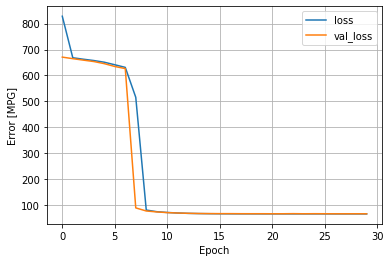

In [7]:
plot_loss(history)

In [8]:
X_test = scaler.transform(X_test)
hist = model.evaluate(X_test, y_test, callbacks=[CustomCallback()])

Start testing; got log keys: []
...Evaluating: start of batch 0; got log keys: []
...Evaluating: end of batch 0; got log keys: ['loss', 'mean_squared_error']
  1/661 [..............................] - ETA: 0s - loss: 78.2712 - mean_squared_error: 78.2712...Evaluating: start of batch 1; got log keys: []
...Evaluating: end of batch 1; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 2; got log keys: []
...Evaluating: end of batch 2; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 3; got log keys: []
...Evaluating: end of batch 3; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 4; got log keys: []
...Evaluating: end of batch 4; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 5; got log keys: []
...Evaluating: end of batch 5; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 6; got log keys: []
...Evaluating: end of batch 6; got log keys: ['loss', 'mean_square

 63/661 [=>............................] - ETA: 0s - loss: 63.8363 - mean_squared_error: 63.8363...Evaluating: start of batch 63; got log keys: []
...Evaluating: end of batch 63; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 64; got log keys: []
...Evaluating: end of batch 64; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 65; got log keys: []
...Evaluating: end of batch 65; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 66; got log keys: []
...Evaluating: end of batch 66; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 67; got log keys: []
...Evaluating: end of batch 67; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 68; got log keys: []
...Evaluating: end of batch 68; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 69; got log keys: []
...Evaluating: end of batch 69; got log keys: ['loss', 'mean_squared_error']
...Evalu

...Evaluating: end of batch 127; got log keys: ['loss', 'mean_squared_error']
128/661 [====>.........................] - ETA: 0s - loss: 65.4563 - mean_squared_error: 65.4563...Evaluating: start of batch 128; got log keys: []
...Evaluating: end of batch 128; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 129; got log keys: []
...Evaluating: end of batch 129; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 130; got log keys: []
...Evaluating: end of batch 130; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 131; got log keys: []
...Evaluating: end of batch 131; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 132; got log keys: []
...Evaluating: end of batch 132; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 133; got log keys: []
...Evaluating: end of batch 133; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 134; got log key

...Evaluating: end of batch 202; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 203; got log keys: []
...Evaluating: end of batch 203; got log keys: ['loss', 'mean_squared_error']
204/661 [========>.....................] - ETA: 0s - loss: 64.8914 - mean_squared_error: 64.8914...Evaluating: start of batch 204; got log keys: []
...Evaluating: end of batch 204; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 205; got log keys: []
...Evaluating: end of batch 205; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 206; got log keys: []
...Evaluating: end of batch 206; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 207; got log keys: []
...Evaluating: end of batch 207; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 208; got log keys: []
...Evaluating: end of batch 208; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 209; got log key

...Evaluating: end of batch 281; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 282; got log keys: []
...Evaluating: end of batch 282; got log keys: ['loss', 'mean_squared_error']
283/661 [===========>..................] - ETA: 0s - loss: 66.3194 - mean_squared_error: 66.3194...Evaluating: start of batch 283; got log keys: []
...Evaluating: end of batch 283; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 284; got log keys: []
...Evaluating: end of batch 284; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 285; got log keys: []
...Evaluating: end of batch 285; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 286; got log keys: []
...Evaluating: end of batch 286; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 287; got log keys: []
...Evaluating: end of batch 287; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 288; got log key

...Evaluating: start of batch 360; got log keys: []
...Evaluating: end of batch 360; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 361; got log keys: []
...Evaluating: end of batch 361; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 362; got log keys: []
...Evaluating: end of batch 362; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 363; got log keys: []
...Evaluating: end of batch 363; got log keys: ['loss', 'mean_squared_error']
364/661 [===============>..............] - ETA: 0s - loss: 66.6506 - mean_squared_error: 66.6506...Evaluating: start of batch 364; got log keys: []
...Evaluating: end of batch 364; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 365; got log keys: []
...Evaluating: end of batch 365; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 366; got log keys: []
...Evaluating: end of batch 366; got log keys: ['loss', 'mean_squared_er

...Evaluating: start of batch 424; got log keys: []
...Evaluating: end of batch 424; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 425; got log keys: []
...Evaluating: end of batch 425; got log keys: ['loss', 'mean_squared_error']
426/661 [==================>...........] - ETA: 0s - loss: 66.0021 - mean_squared_error: 66.0021...Evaluating: start of batch 426; got log keys: []
...Evaluating: end of batch 426; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 427; got log keys: []
...Evaluating: end of batch 427; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 428; got log keys: []
...Evaluating: end of batch 428; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 429; got log keys: []
...Evaluating: end of batch 429; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 430; got log keys: []
...Evaluating: end of batch 430; got log keys: ['loss', 'mean_squared_er

...Evaluating: end of batch 490; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 491; got log keys: []
...Evaluating: end of batch 491; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 492; got log keys: []
...Evaluating: end of batch 492; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 493; got log keys: []
...Evaluating: end of batch 493; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 494; got log keys: []
...Evaluating: end of batch 494; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 495; got log keys: []
...Evaluating: end of batch 495; got log keys: ['loss', 'mean_squared_error']
496/661 [=====================>........] - ETA: 0s - loss: 65.8346 - mean_squared_error: 65.8346...Evaluating: start of batch 496; got log keys: []
...Evaluating: end of batch 496; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 497; got log key

...Evaluating: end of batch 551; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 552; got log keys: []
...Evaluating: end of batch 552; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 553; got log keys: []
...Evaluating: end of batch 553; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 554; got log keys: []
...Evaluating: end of batch 554; got log keys: ['loss', 'mean_squared_error']
555/661 [========================>.....] - ETA: 0s - loss: 66.0121 - mean_squared_error: 66.0121...Evaluating: start of batch 555; got log keys: []
...Evaluating: end of batch 555; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 556; got log keys: []
...Evaluating: end of batch 556; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 557; got log keys: []
...Evaluating: end of batch 557; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 558; got log key

...Evaluating: end of batch 617; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 618; got log keys: []
...Evaluating: end of batch 618; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 619; got log keys: []
...Evaluating: end of batch 619; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 620; got log keys: []
...Evaluating: end of batch 620; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 621; got log keys: []
...Evaluating: end of batch 621; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 622; got log keys: []
...Evaluating: end of batch 622; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 623; got log keys: []
...Evaluating: end of batch 623; got log keys: ['loss', 'mean_squared_error']
...Evaluating: start of batch 624; got log keys: []
...Evaluating: end of batch 624; got log keys: ['loss', 'mean_squared_error']
...Evaluatin

In [9]:
X_test

array([[0.01528525, 0.02151738],
       [0.01502272, 0.02679087],
       [0.00739141, 0.01786058],
       ...,
       [0.00959571, 0.01813003],
       [0.02916282, 0.01870742],
       [0.02385349, 0.01227915]])

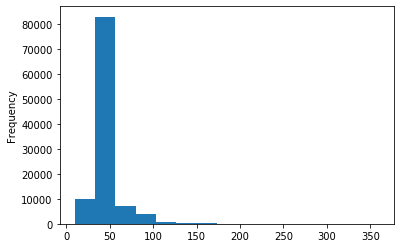

In [10]:
data['Length'].plot.hist(bins=15)

In [11]:
predictions = model.predict([[0.01502272, 0.02679087]])
predictions[0][0]

1.1899729

In [12]:
#model.to_json()

In [13]:
#model.compile(optimizer='adam', loss='mse',
#              metrics=[tf.keras.metrics.MeanSquaredError()])
#history = model.fit(X_train, y_train, 
#                    epochs=100, batch_size=512, validation_split=0.15, callbacks=[CustomCallback()]);
#print(model.summary())

In [14]:
#plot_loss(history)

In [15]:
model.save('model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets


In [16]:
import pickle

scaler_path = "scaler.pkl"
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)